### For the practical work, we will be using the Pump Sensor  dataset that can be downloaded here:https://www.kaggle.com/datasets/nphantawee/pump-sensor-data

This data consists of 51 numerical features and a categorical label. 51 numerical features contain raw sensor readings from 51 different sensors that are used to do condition monitoring of the pump.The label contains string values that represent normal, broken and recovering operational conditions of the pump. The data set represents 219,521 readings from 51 sensors.

we will detecting anomalies with the given labels for Broken and Recovering 
Solution Approach:
we will first build a  model using MAD(mean absolute deviation)technique, we will import the model from Pyod Library and then we will implement two more unsupervised learning algorithms to compare their resulting performances and accuracies, For doing so, we will follow the following steps:

-Data sourcing loading

-Data wrangling

-Exploratory Data Analysis (EDA)

-Pre-Processing

-Feature Selection  
For feature selection we classified the data using a Random Forest Desciscion Tree and got best performing sensors out of it 

-Modeling  & Model Evaluation
#### Techniques Used 
-MAD(mean absolute deviation)
-Naive approach using global mean and standard deviation
-VAR 




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
from matplotlib import dates as mpl_dates
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from pyod.models.mad import MAD
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from statsmodels.tsa.stattools import acf, pacf

## DATA LOADING 

In [10]:
time_col= 'time'
data_file='sensor.csv'
date_col = 'timestamp'
col_dict = {date_col: time_col}

In [11]:
df=pd.read_csv(data_file,parse_dates=[date_col])
df= df.rename(columns=col_dict)
df=df.set_index(time_col, drop=True)

In [13]:
df.head(10)

Unnamed: 0  sensor_00  sensor_01  sensor_02  sensor_03  \
time                                                                          
2018-04-01 00:00:00           0   2.465394   47.09201    53.2118  46.310760   
2018-04-01 00:01:00           1   2.465394   47.09201    53.2118  46.310760   
2018-04-01 00:02:00           2   2.444734   47.35243    53.2118  46.397570   
2018-04-01 00:03:00           3   2.460474   47.09201    53.1684  46.397568   
2018-04-01 00:04:00           4   2.445718   47.13541    53.2118  46.397568   
2018-04-01 00:05:00           5   2.453588   47.09201    53.1684  46.397568   
2018-04-01 00:06:00           6   2.455556   47.04861    53.1684  46.397568   
2018-04-01 00:07:00           7   2.449653   47.13541    53.1684  46.397568   
2018-04-01 00:08:00           8   2.463426   47.09201    53.1684  46.397568   
2018-04-01 00:09:00           9   2.445718   47.17882    53.1684  46.397568   

                     sensor_04  sensor_05  sensor_06  sensor_07  sensor_08  \
time                                                                         
2018-04-01 00:00:00   634.3750   76.45975   13.41146   16.13136   15.56713   
2018-04-01 00:01:00   634.3750   76.45975   13.41146   16.13136   15.56713   
2018-04-01 00:02:00   638.8889   73.54598   13.32465   16.03733   15.61777   
2018-04-01 00:03:00   628.1250   76.98898   13.31742   16.24711   15.69734   
2018-04-01 00:04:00   636.4583   76.58897   13.35359   16.21094   15.69734   
2018-04-01 00:05:00   637.6157   78.18568   13.41146   16.16753   15.89265   
2018-04-01 00:06:00   633.3333   75.81614   13.43316   16.13136   15.65393   
2018-04-01 00:07:00   630.6713   75.77331   13.25231   16.12413   16.19647   
2018-04-01 00:08:00   631.9444   74.58916   13.28848   16.13136   15.47309   
2018-04-01 00:09:00   641.7823   74.57428   13.38252   16.24711   15.61777   

                     ...  sensor_43  sensor_44  sensor_45  sensor_46  \
time                 ...                                               
2018-04-01 00:00:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:01:00  ...   41.92708  39.641200   65.68287   50.92593   
2018-04-01 00:02:00  ...   41.66666  39.351852   65.39352   51.21528   
2018-04-01 00:03:00  ...   40.88541  39.062500   64.81481   51.21528   
2018-04-01 00:04:00  ...   41.40625  38.773150   65.10416   51.79398   
2018-04-01 00:05:00  ...   42.70833  38.773150   63.65741   51.79398   
2018-04-01 00:06:00  ...   43.22916  38.194440   61.92130   51.79398   
2018-04-01 00:07:00  ...   42.96875  38.194443   59.60648   50.92593   
2018-04-01 00:08:00  ...   42.18750  38.194440   57.87037   50.63657   
2018-04-01 00:09:00  ...   41.66666  39.062500   56.42361   50.63657   

                     sensor_47  sensor_48  sensor_49  sensor_50  sensor_51  \
time                                                                         
2018-04-01 00:00:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:01:00  38.194440   157.9861   67.70834   243.0556   201.3889   
2018-04-01 00:02:00  38.194443   155.9606   67.12963   241.3194   203.7037   
2018-04-01 00:03:00  38.194440   155.9606   66.84028   240.4514   203.1250   
2018-04-01 00:04:00  38.773150   158.2755   66.55093   242.1875   201.3889   
2018-04-01 00:05:00  38.773150   164.6412   66.55093   241.6088   201.6782   
2018-04-01 00:06:00  39.062500   171.8750   67.70834   240.1620   200.2315   
2018-04-01 00:07:00  39.351850   178.5301   68.57639   241.3194   201.0995   
2018-04-01 00:08:00  39.351850   182.0023   69.44444   243.0556   201.6782   
2018-04-01 00:09:00  39.062500   186.6319   69.73380   246.5278   200.8102   

                     machine_status  
time                                 
2018-04-01 00:00:00          NORMAL  
2018-04-01 00:01:00          NORMAL  
2018-04-01 00:02:00          NORMAL  
2018-04-01 00:03:00          NORMAL  
2018-04-01 00:04:00          NORMAL  
2018-04-01 00:05:00          NORMAL  
2018-04-01 00:06:00          

## EDA AND PREPROCESSING

In [14]:
df.describe(include='object')

machine_status
count          220320
unique              3
top            NORMAL
freq           205836

In [15]:
df['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

### checking for null values

In [16]:
df.isna().sum()

Unnamed: 0             0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
sensor_38             27


#### Dropping the sensors with highest null values

In [17]:
df = df.drop(['Unnamed: 0','sensor_15','sensor_50'],axis=1)

#### Handling the rest of NAN 

In [18]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [19]:
missing_data(df)

Total   Percent
sensor_51       15383  6.982117
sensor_00       10208  4.633261
sensor_07        5451  2.474129
sensor_08        5107  2.317992
sensor_06        4798  2.177741
sensor_09        4595  2.085603
sensor_01         369  0.167484
sensor_30         261  0.118464
sensor_29          72  0.032680
sensor_32          68  0.030864
sensor_17          46  0.020879
sensor_18          46  0.020879
sensor_22          41  0.018609
sensor_25          36  0.016340
sensor_16          31  0.014070
sensor_47          27  0.012255
sensor_40          27  0.012255
sensor_49          27  0.012255
sensor_38          27  0.012255
sensor_39          27  0.012255
sensor_42          27  0.012255
sensor_41          27  0.012255
sensor_48          27  0.012255
sensor_43          27  0.012255
sensor_44          27  0.012255
sensor_45          27  0.012255
sensor_46          27  0.012255
sensor_14          21  0.009532
sensor_26          20  0.009078
sensor_02          19  0.008624
sensor_03          19  0.008624
sensor_04          19  0.008624
sensor_05          19  0.008624
sensor_10          19  0.008624
sensor_11          19  0.008624
sensor_12          19  0.008624
sensor_13          19  0.008624
sensor_28          16  0.007262
sensor_31          16  0.007262
sensor_19          16  0.007262
sensor_20          16  0.007262
sensor_21          16  0.007262
sensor_23          16  0.007262
sensor_24          16  0.007262
sensor_37          16  0.007262
sensor_36          16  0.007262
sensor_35          16  0.007262
sensor_34          16  0.007262
sensor_33          16  0.007262
sensor_27          16  0.007262
machine_status      0  0.000000

In [20]:
df.columns

Index(['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_51',
       'machine_status'],
      dtype='object')

In [21]:
#df.drop(['machine_status'], axis=1)

sensors=df.drop(['machine_status'], axis=1)
for col in sensors:
    df[col] = df[col].fillna(df[col].mean())

In [22]:
missing_data(df)

Total  Percent
sensor_00           0      0.0
sensor_39           0      0.0
sensor_29           0      0.0
sensor_30           0      0.0
sensor_31           0      0.0
sensor_32           0      0.0
sensor_33           0      0.0
sensor_34           0      0.0
sensor_35           0      0.0
sensor_36           0      0.0
sensor_37           0      0.0
sensor_38           0      0.0
sensor_40           0      0.0
sensor_27           0      0.0
sensor_41           0      0.0
sensor_42           0      0.0
sensor_43           0      0.0
sensor_44           0      0.0
sensor_45           0      0.0
sensor_46           0      0.0
sensor_47           0      0.0
sensor_48           0      0.0
sensor_49           0      0.0
sensor_51           0      0.0
sensor_28           0      0.0
sensor_26           0      0.0
sensor_01           0      0.0
sensor_12           0      0.0
sensor_02           0      0.0
sensor_03           0      0.0
sensor_04           0      0.0
sensor_05           0      0.0
sensor_06           0      0.0
sensor_07           0      0.0
sensor_08           0      0.0
sensor_09           0      0.0
sensor_10           0      0.0
sensor_11           0      0.0
sensor_13           0      0.0
sensor_25           0      0.0
sensor_14           0      0.0
sensor_16           0      0.0
sensor_17           0      0.0
sensor_18           0      0.0
sensor_19           0      0.0
sensor_20           0      0.0
sensor_21           0      0.0
sensor_22           0      0.0
sensor_23           0      0.0
sensor_24           0      0.0
machine_status      0      0.0

### Preproccesed Data

In [23]:
df.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
time                                                                         
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
time                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_42  sensor_43  sensor_44  sensor_45  \
time                 ...                                               
2018-04-01 00:00:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:01:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:02:00  ...  31.770830   41.66666  39.351852   65.39352   
2018-04-01 00:03:00  ...  31.510420   40.88541  39.062500   64.81481   
2018-04-01 00:04:00  ...  31.510420   41.40625  38.773150   65.10416   

                     sensor_46  sensor_47  sensor_48  sensor_49  sensor_51  \
time                                                                         
2018-04-01 00:00:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:01:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:02:00   51.21528  38.194443   155.9606   67.12963   203.7037   
2018-04-01 00:03:00   51.21528  38.194440   155.9606   66.84028   203.1250   
2018-04-01 00:04:00   51.79398  38.773150   158.2755   66.55093   201.3889   

                     machine_status  
time                                 
2018-04-01 00:00:00          NORMAL  
2018-04-01 00:01:00          NORMAL  
2018-04-01 00:02:00          NORMAL  
2018-04-01 00:03:00          NORMAL  
2018-04-01 00:04:00          NORMAL  

[5 rows x 51 columns]

### visualisation of all the sensors


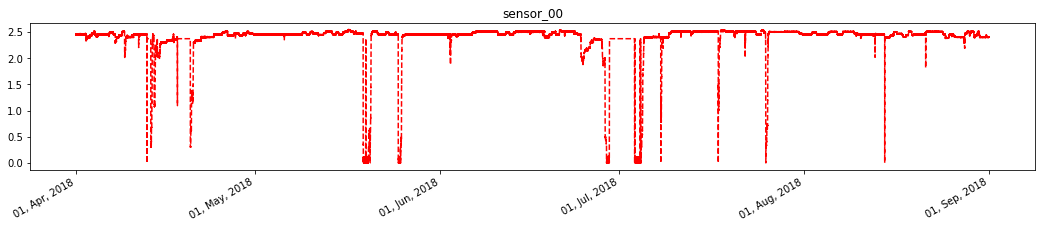

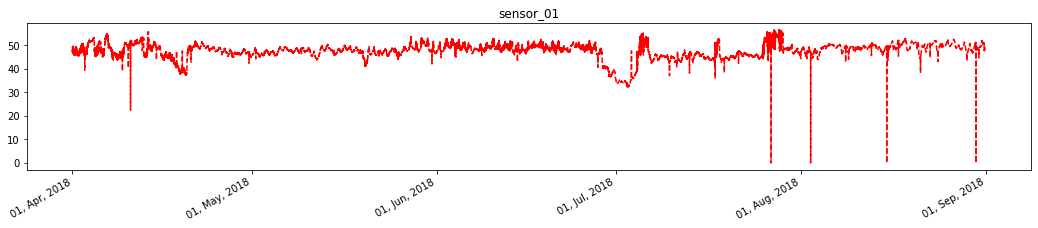

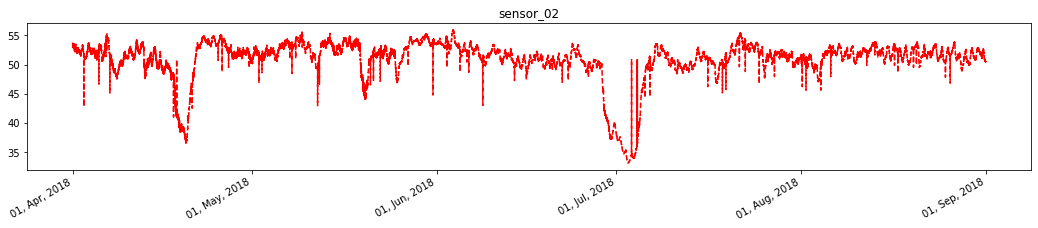

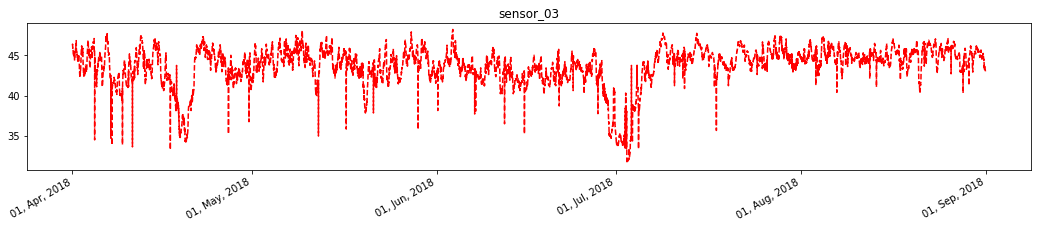

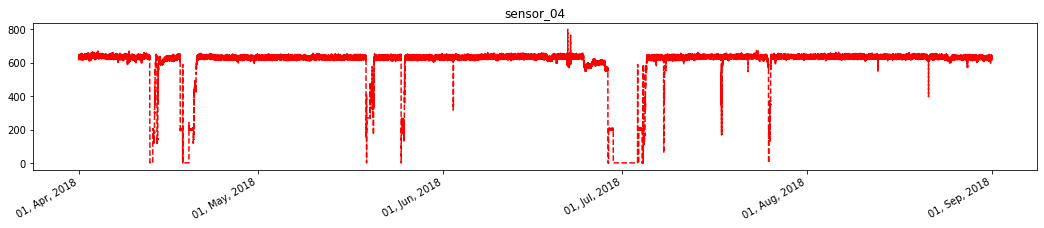

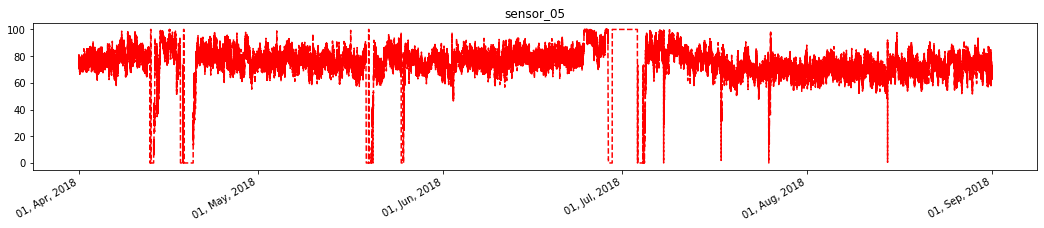

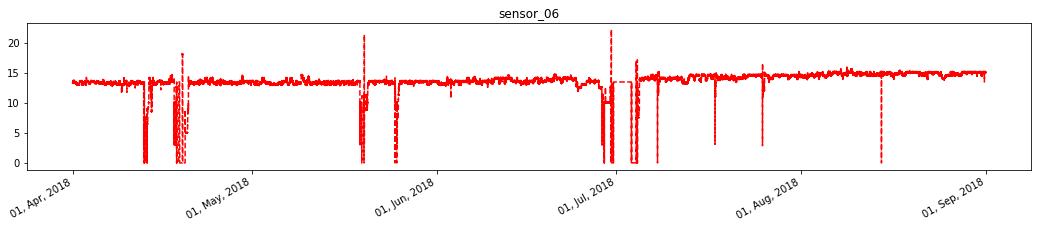

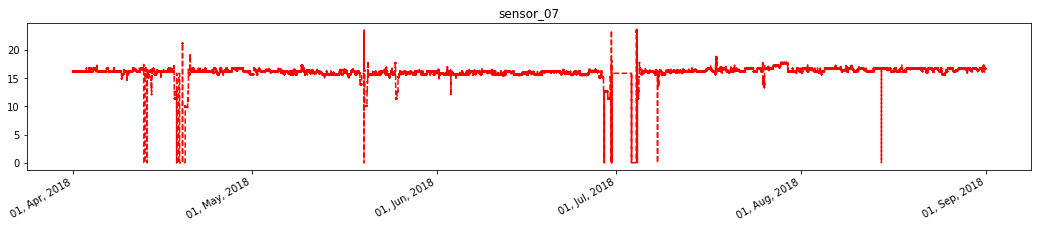

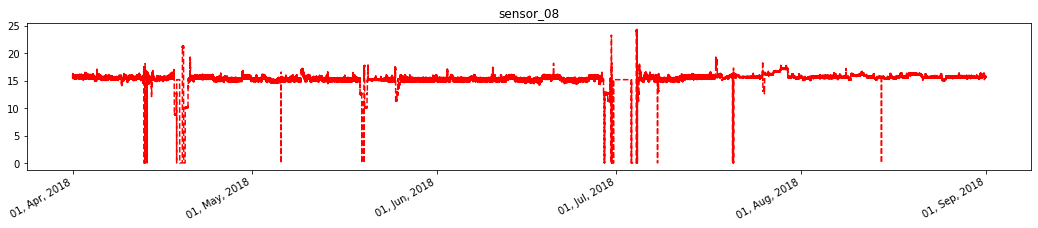

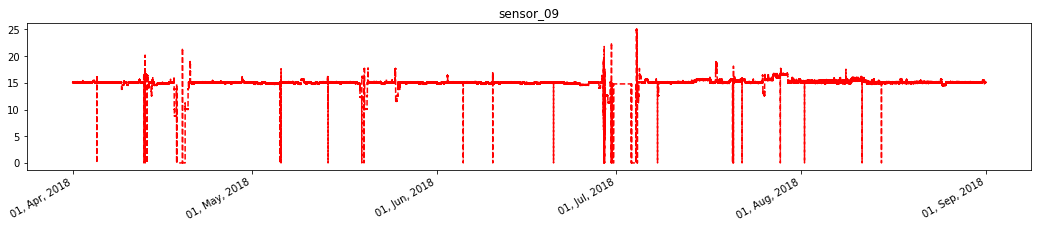

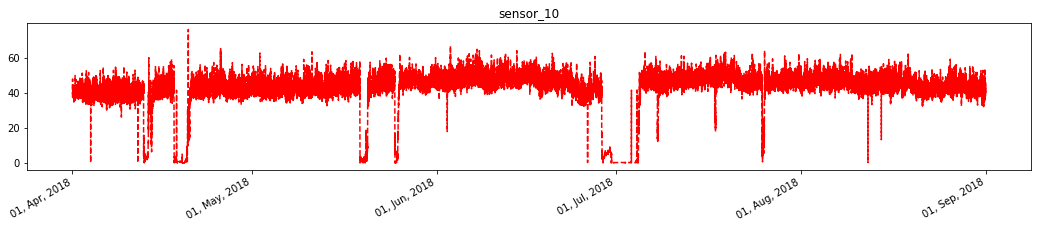

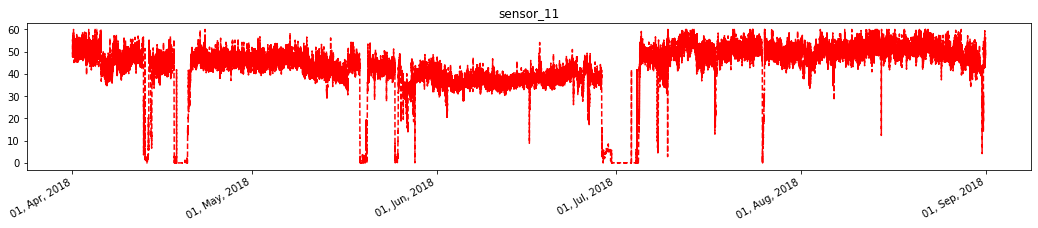

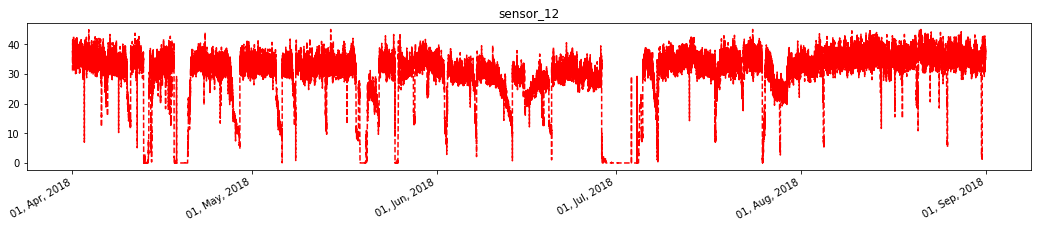

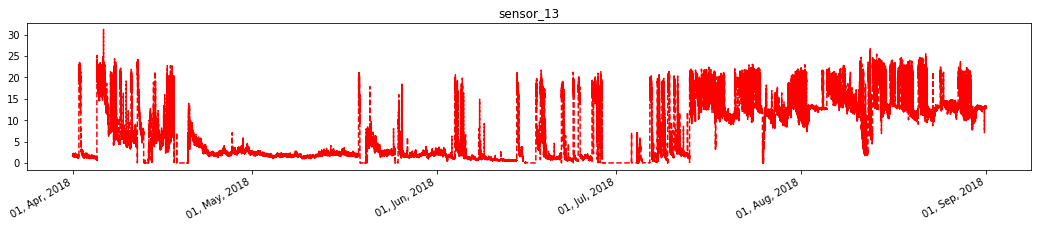

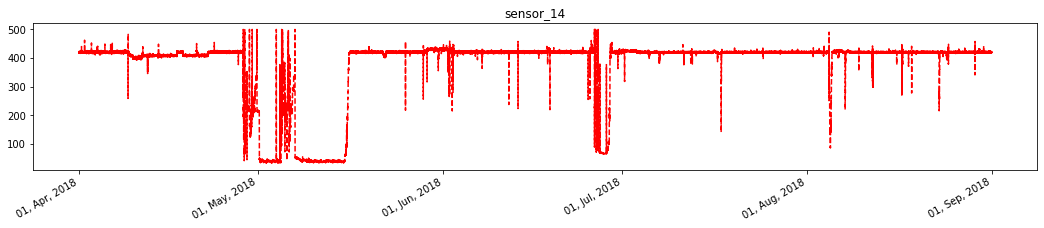

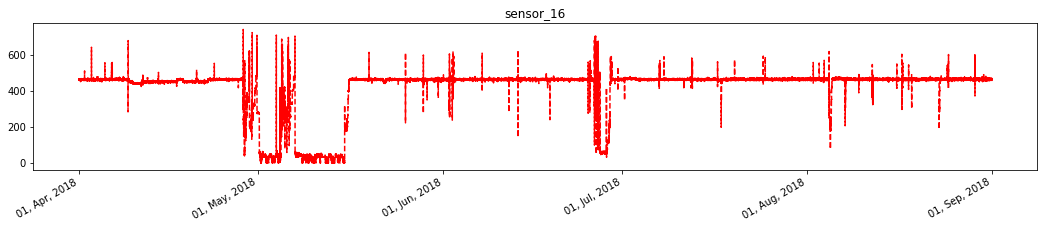

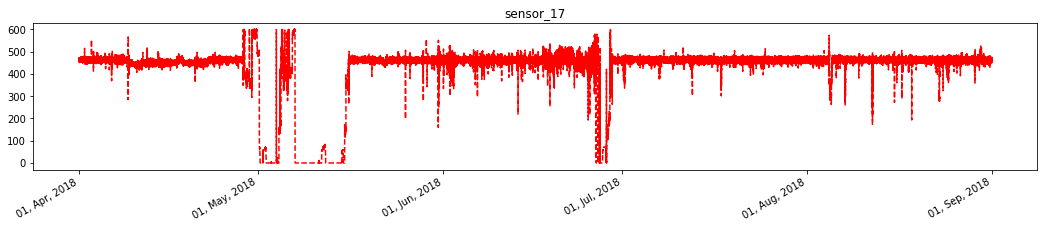

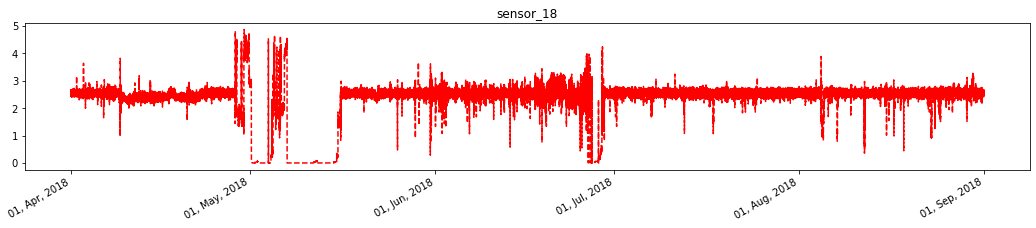

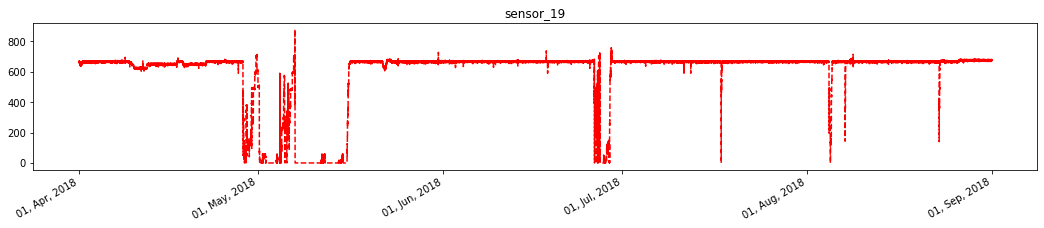

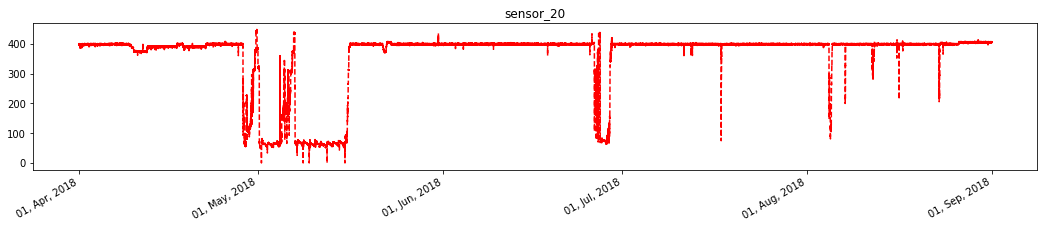

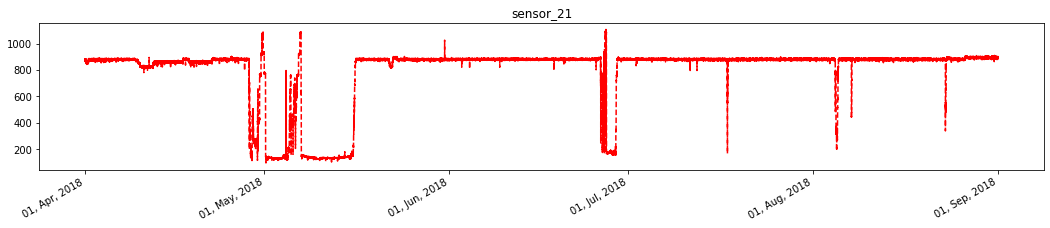

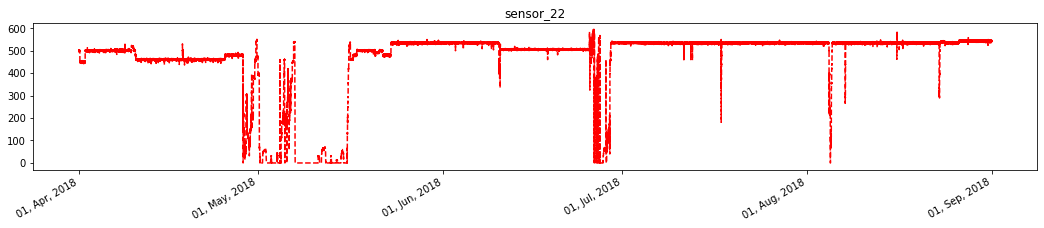

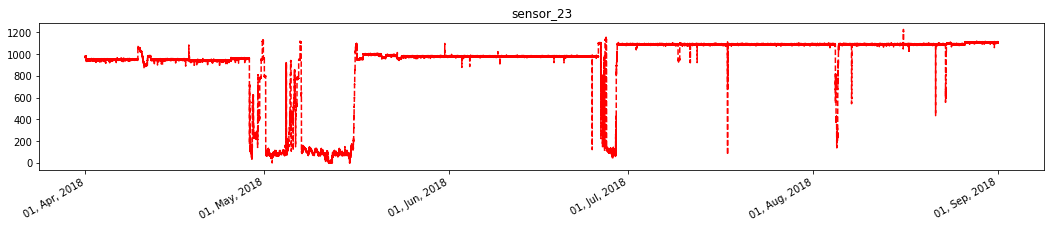

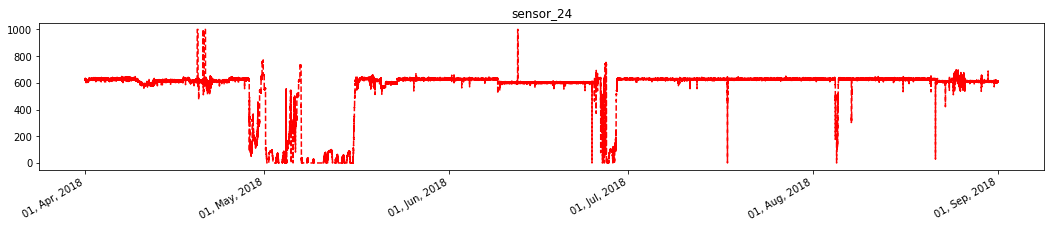

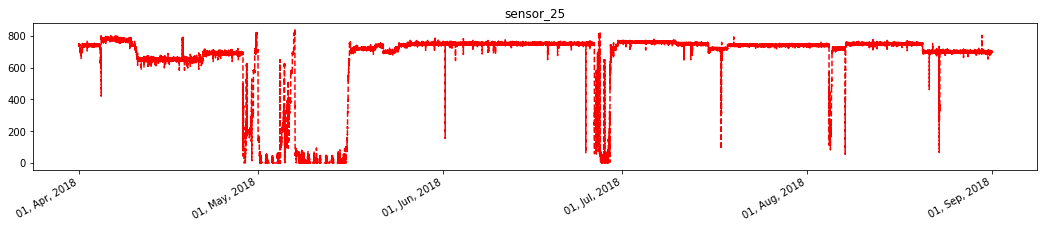

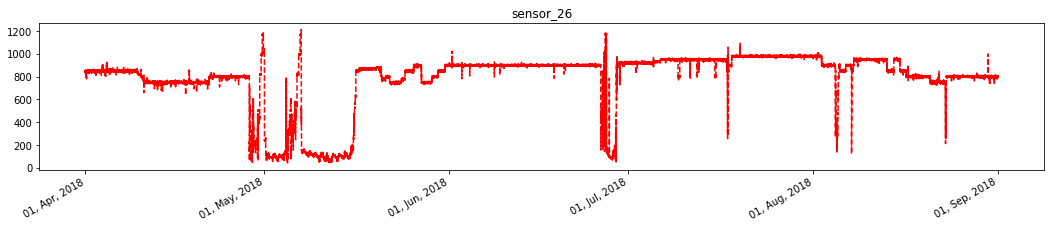

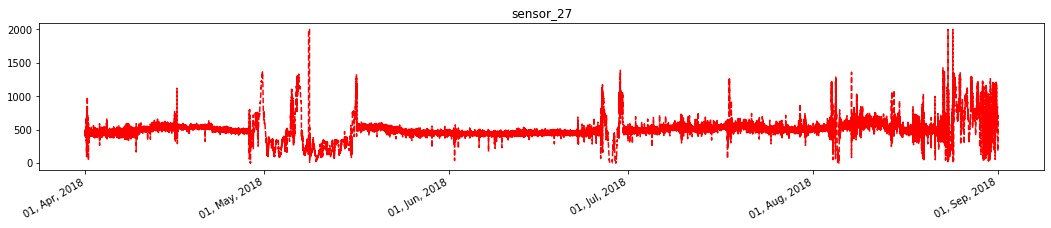

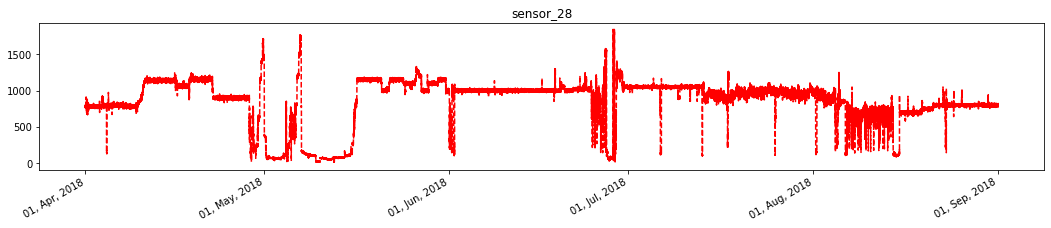

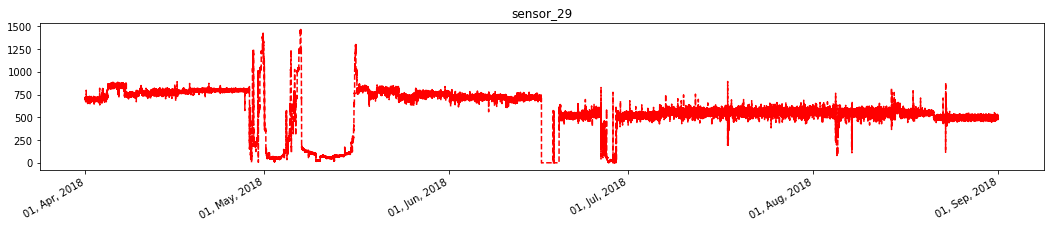

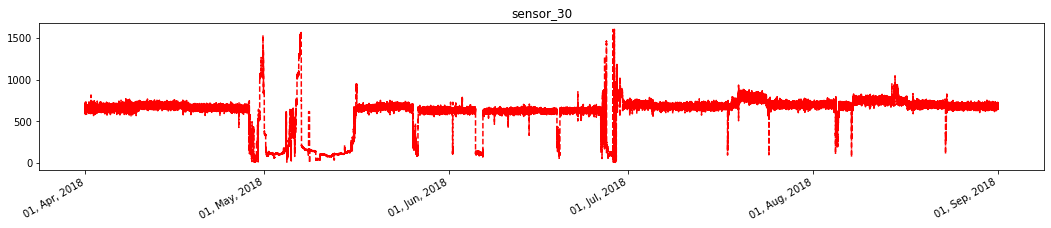

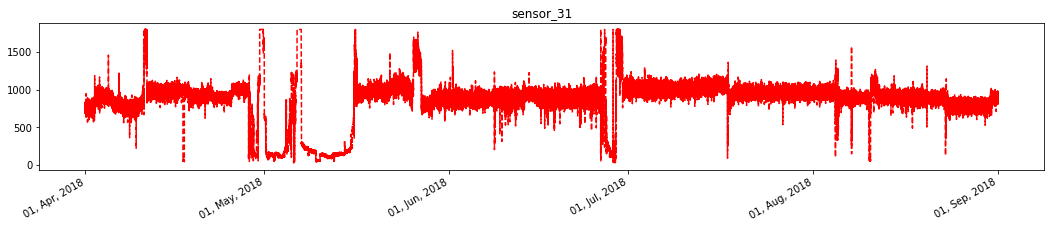

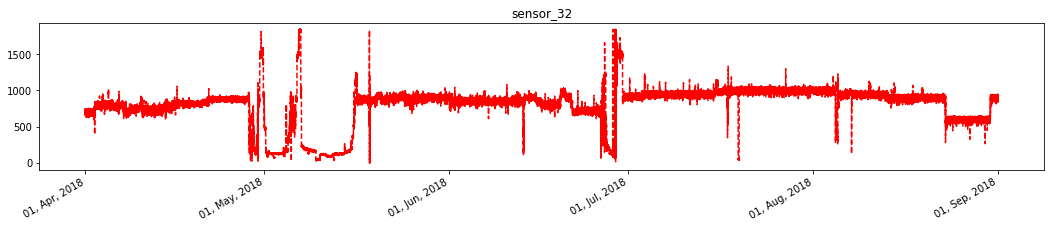

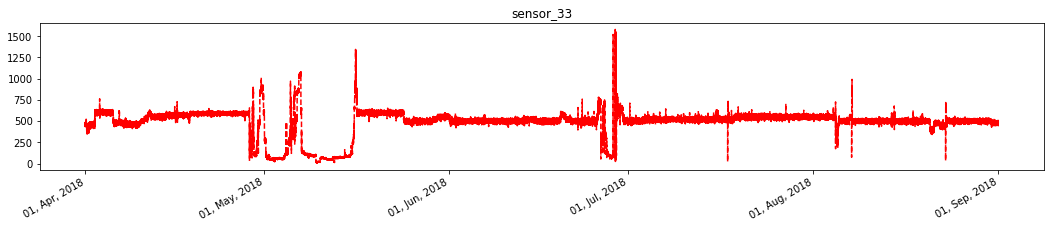

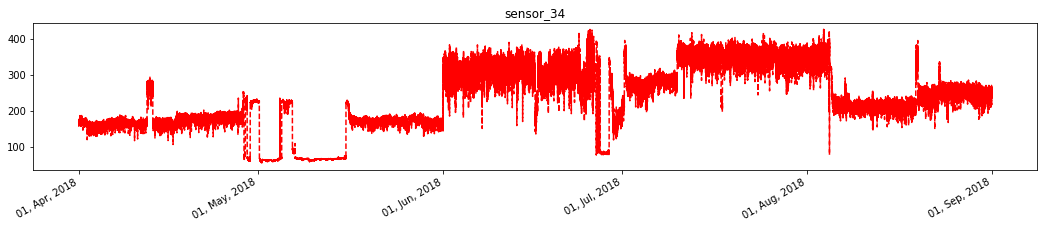

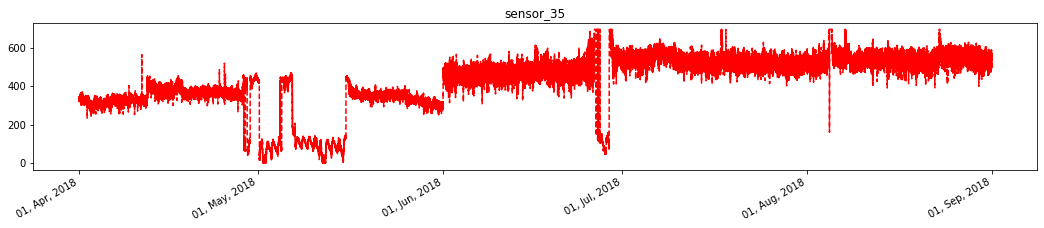

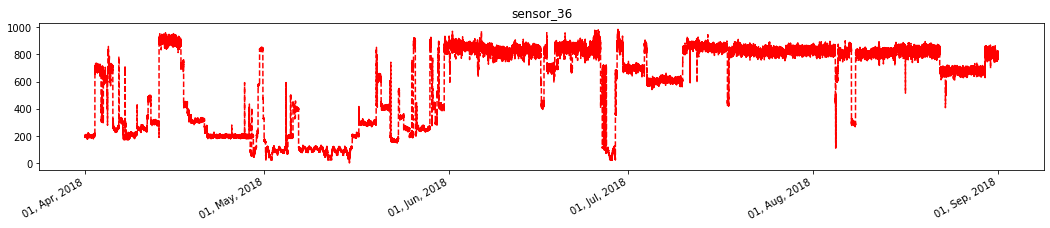

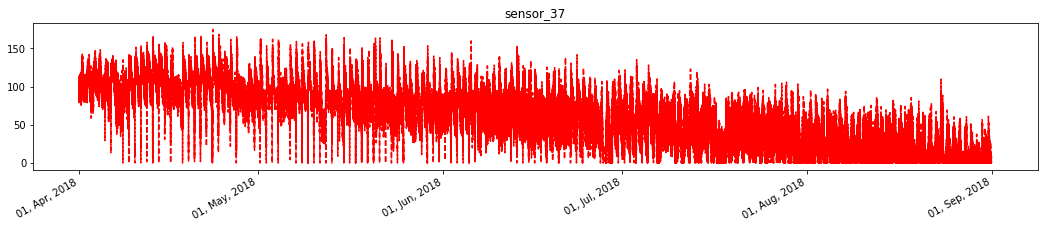

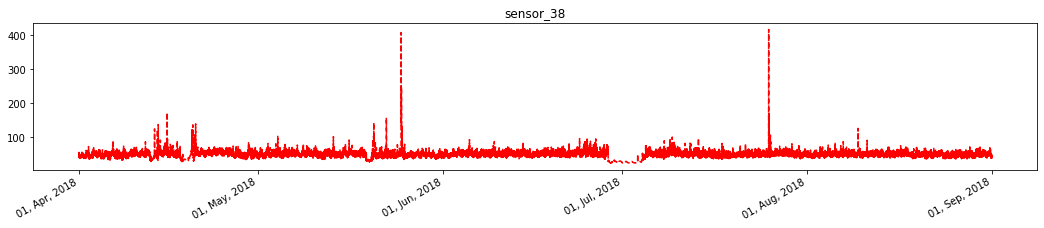

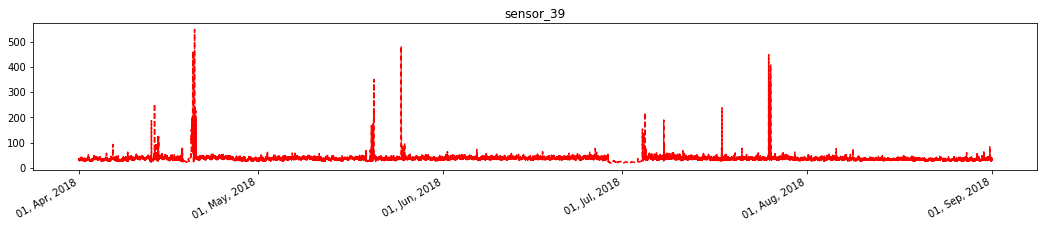

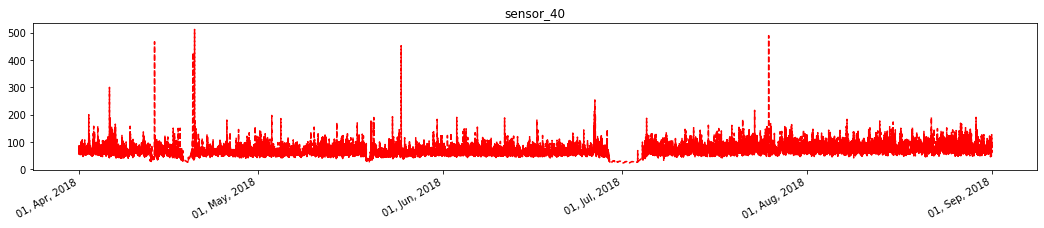

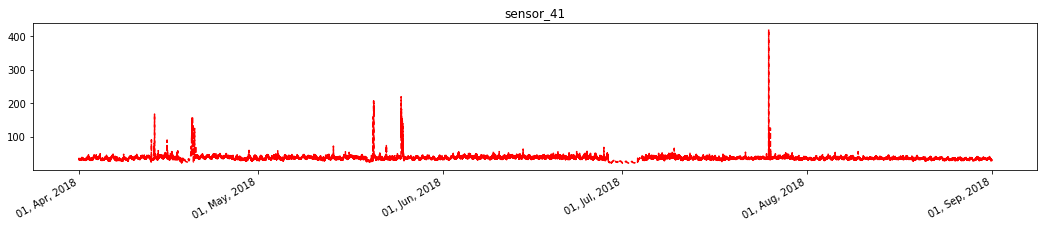

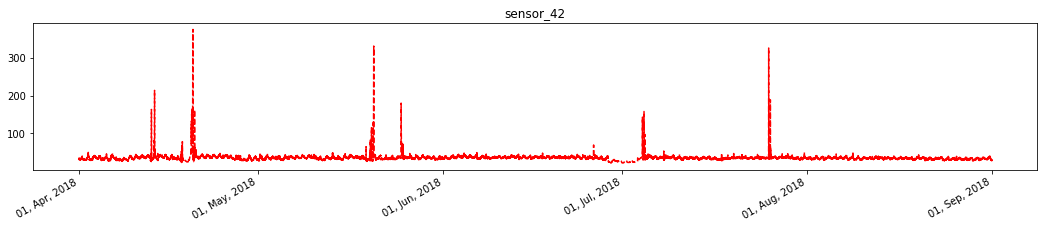

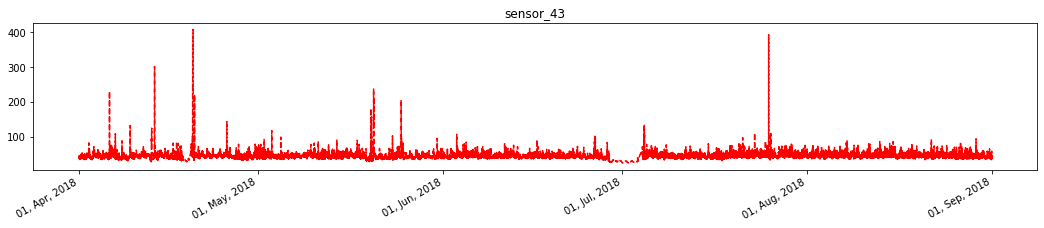

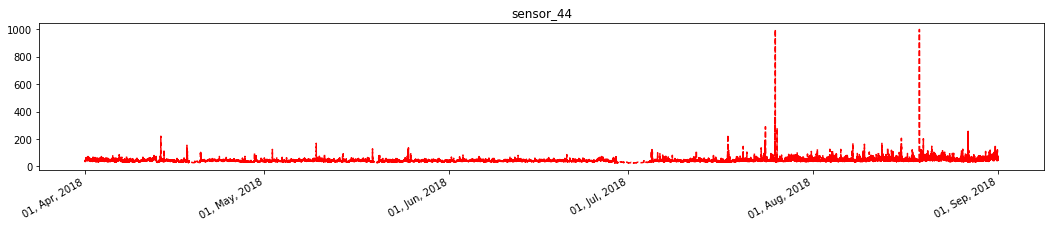

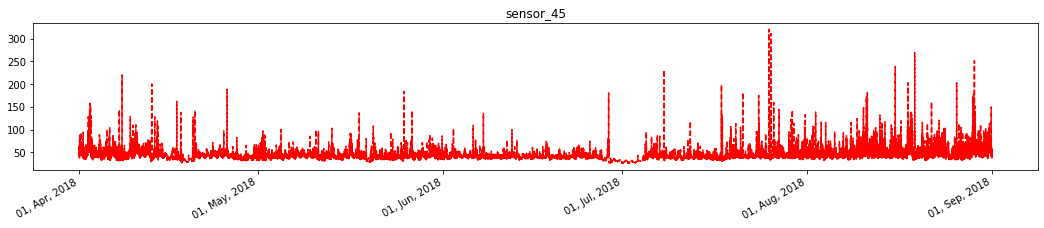

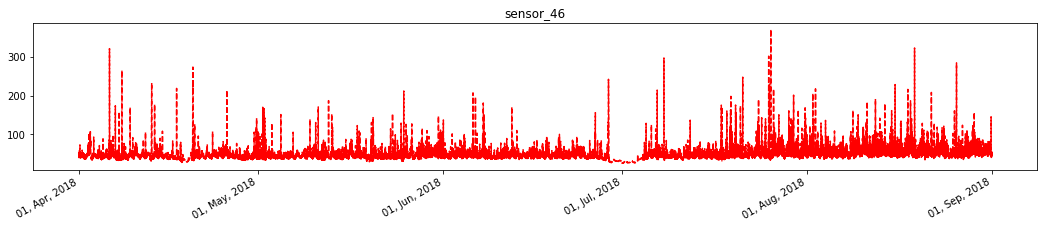

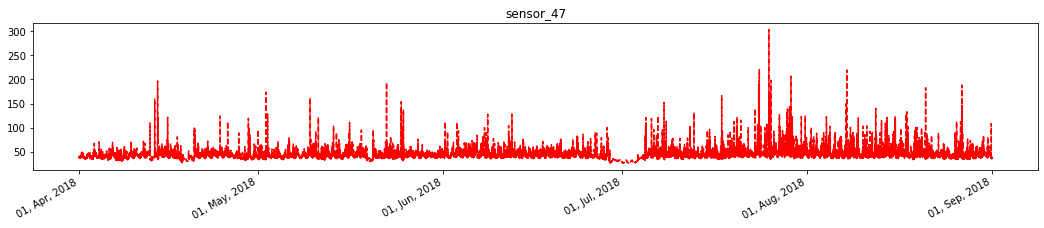

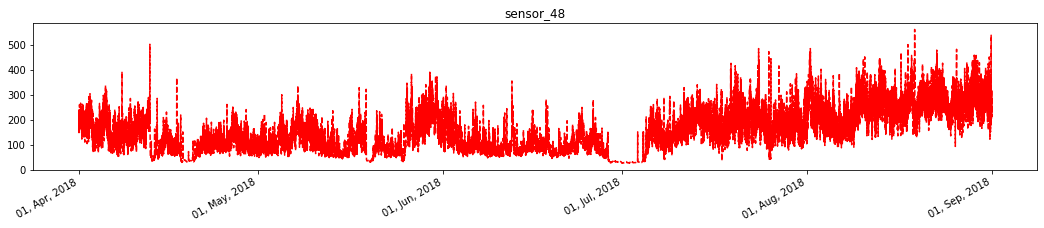

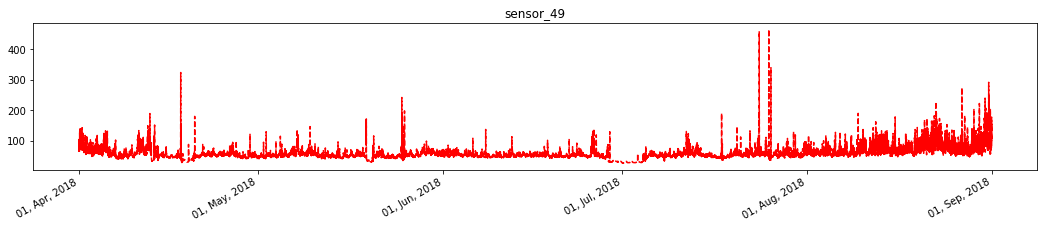

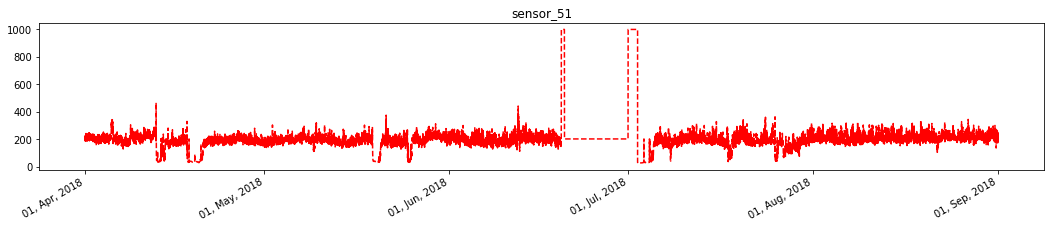

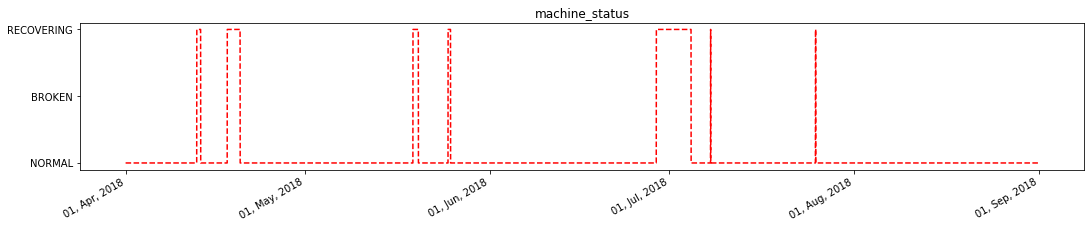

In [24]:
# specify columns to plot


dfmachine = df.drop(['machine_status'], axis=1)
sensors=df.columns
for sensor in sensors:
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='red',linestyle='--')
    plt.title(sensor)
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.show()

### Further EDA

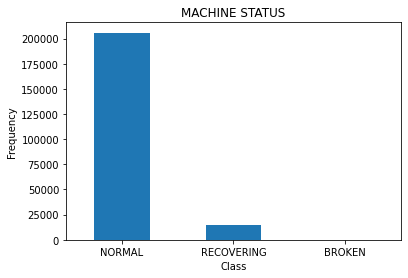

In [25]:
count_classes = pd.value_counts(df['machine_status'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("MACHINE STATUS")
plt.xticks(range(3))
plt.xlabel("Class")
plt.ylabel("Frequency");

In [26]:
df['machine_status'].unique()
df['machine_status'].value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [27]:
le = LabelEncoder()
df['machine_status']= le.fit_transform(df['machine_status'])


In [28]:
df['machine_status'].unique()
df['machine_status'].value_counts()

1    205836
2     14477
0         7
Name: machine_status, dtype: int64

### Data with Machine status encoded where 
Broken = [machine status=0], 
Recovering = [machine status=2]
Normal=[machine status=1]

In [29]:
df.head()


sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
time                                                                         
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
time                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_42  sensor_43  sensor_44  sensor_45  \
time                 ...                                               
2018-04-01 00:00:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:01:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:02:00  ...  31.770830   41.66666  39.351852   65.39352   
2018-04-01 00:03:00  ...  31.510420   40.88541  39.062500   64.81481   
2018-04-01 00:04:00  ...  31.510420   41.40625  38.773150   65.10416   

                     sensor_46  sensor_47  sensor_48  sensor_49  sensor_51  \
time                                                                         
2018-04-01 00:00:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:01:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:02:00   51.21528  38.194443   155.9606   67.12963   203.7037   
2018-04-01 00:03:00   51.21528  38.194440   155.9606   66.84028   203.1250   
2018-04-01 00:04:00   51.79398  38.773150   158.2755   66.55093   201.3889   

                     machine_status  
time                                 
2018-04-01 00:00:00               1  
2018-04-01 00:01:00               1  
2018-04-01 00:02:00               1  
2018-04-01 00:03:00               1  
2018-04-01 00:04:00               1  

[5 rows x 51 columns]

### Plotting anomalies for Broken

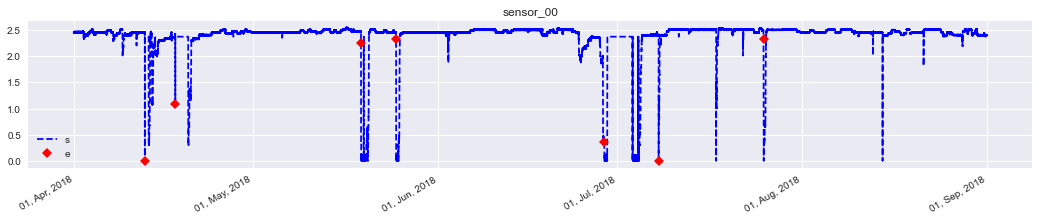

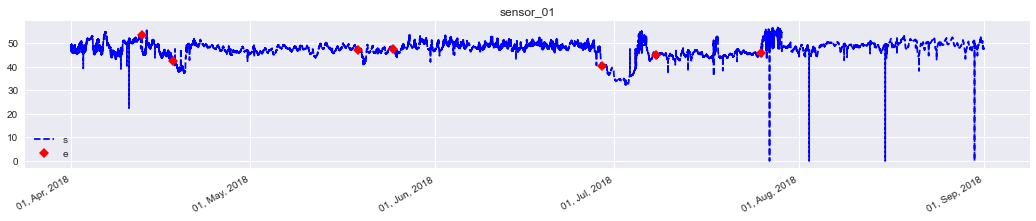

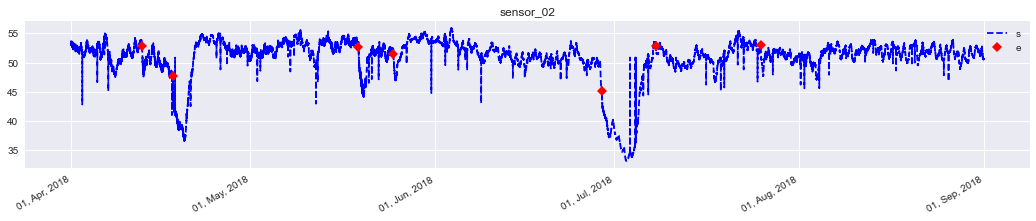

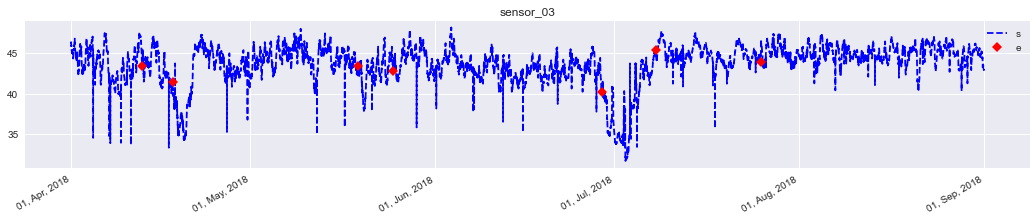

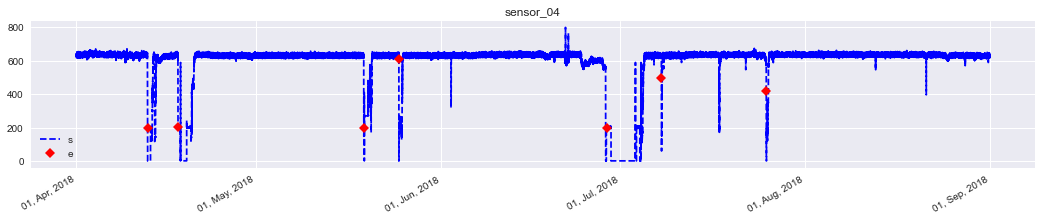

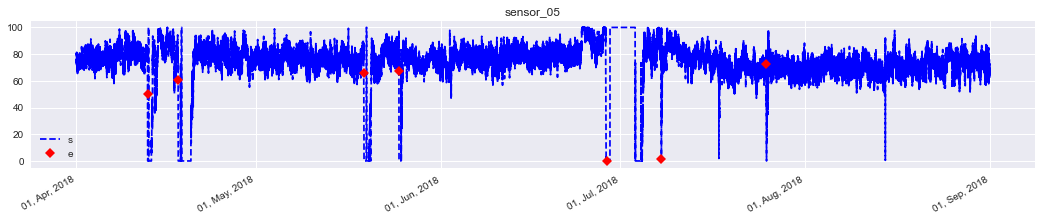

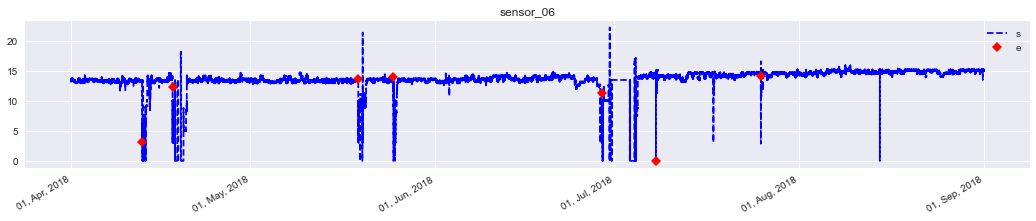

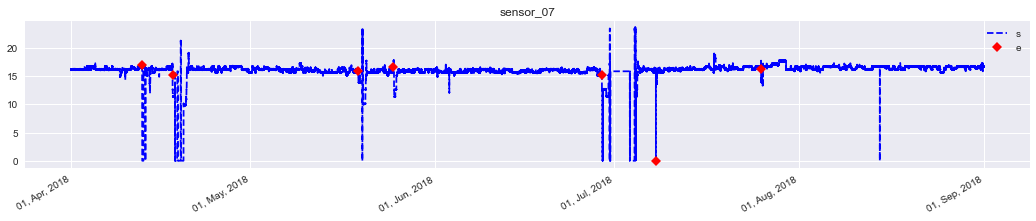

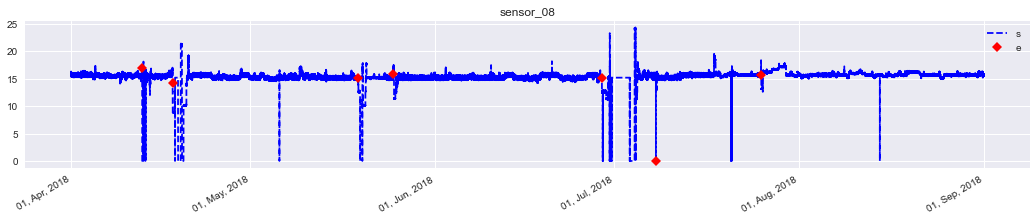

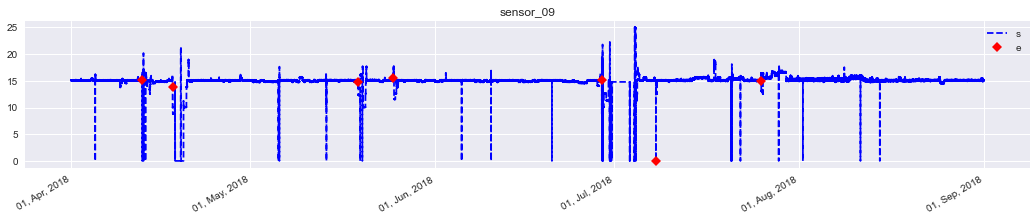

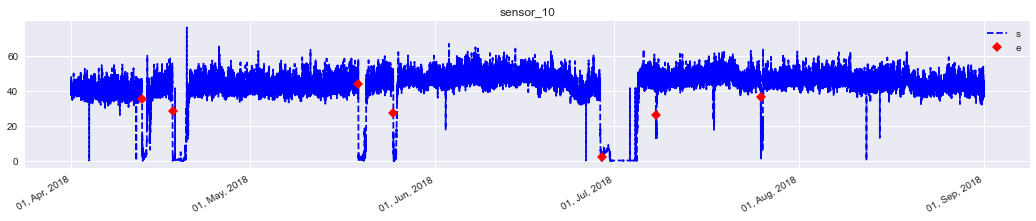

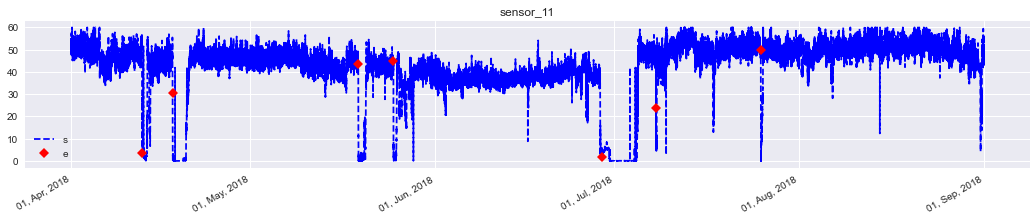

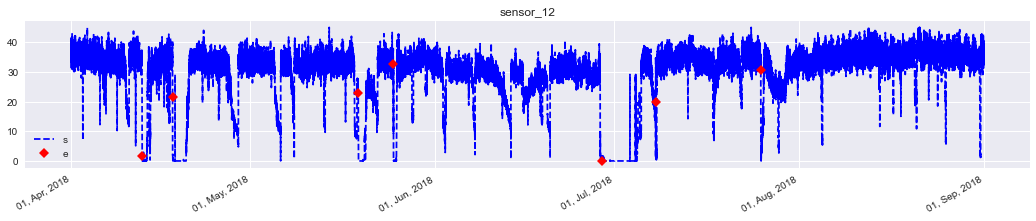

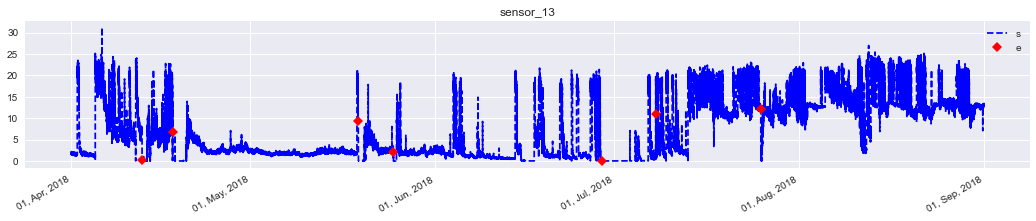

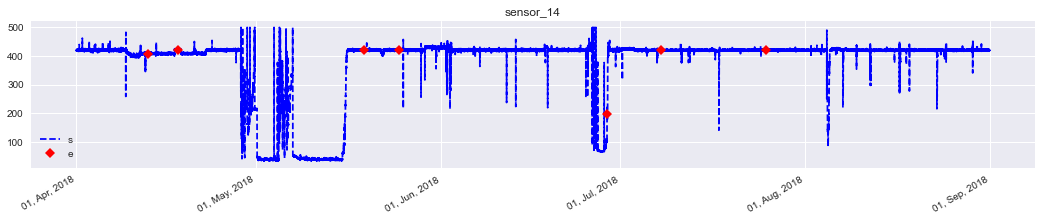

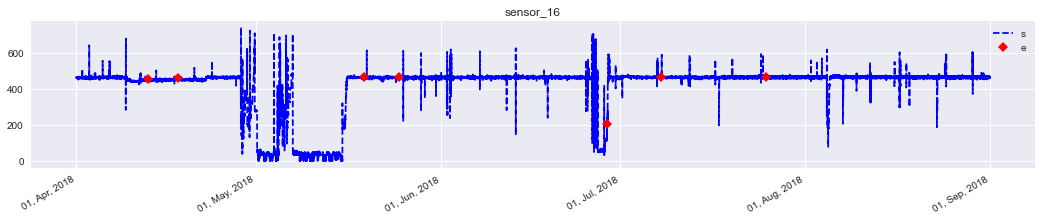

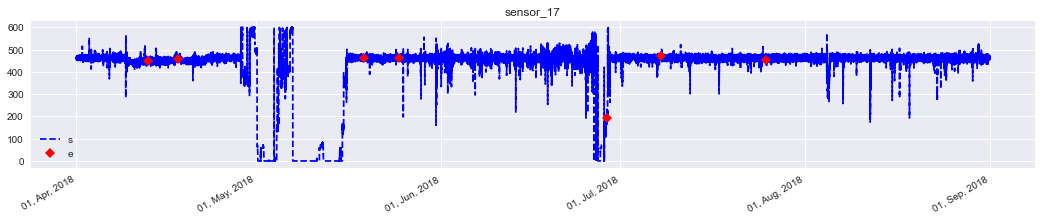

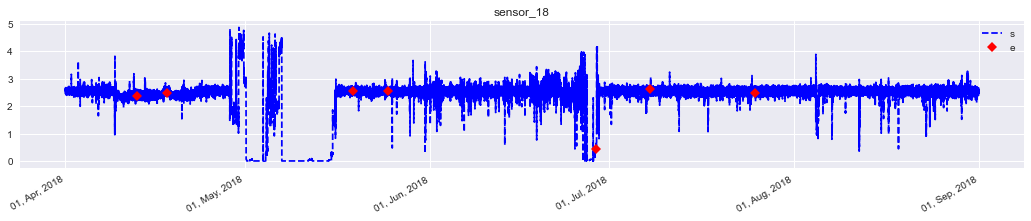

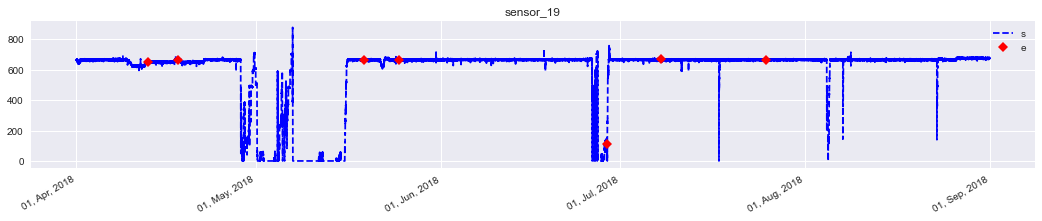

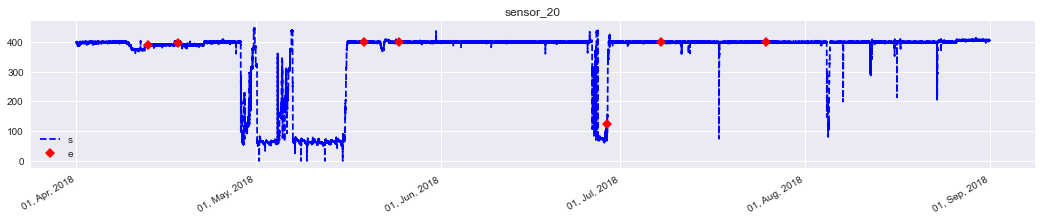

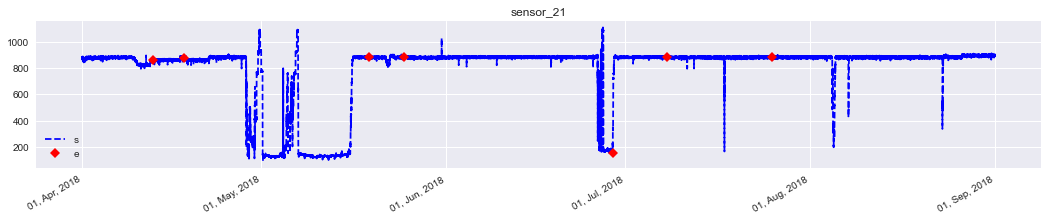

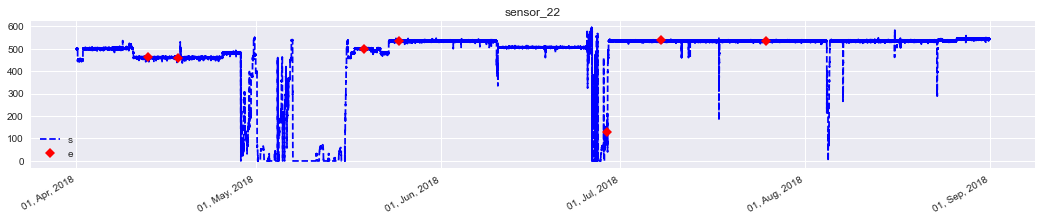

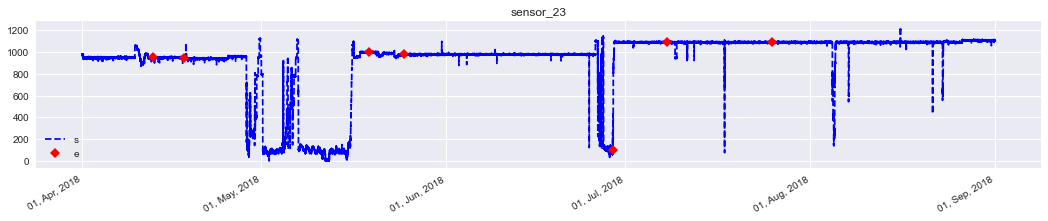

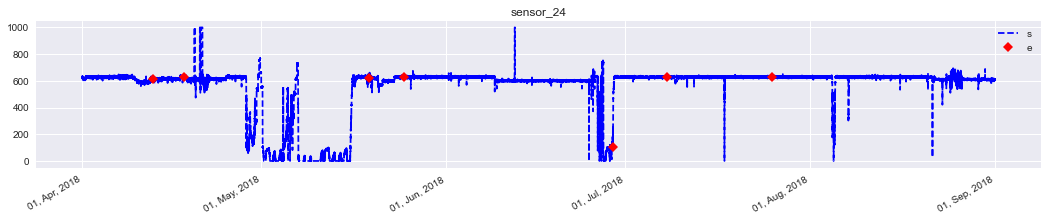

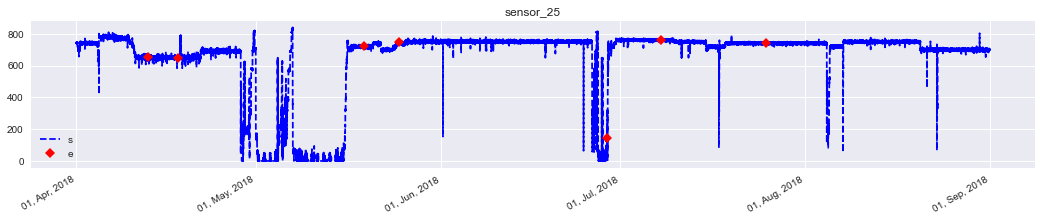

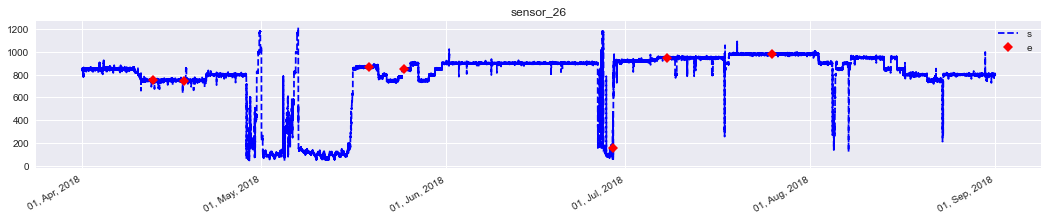

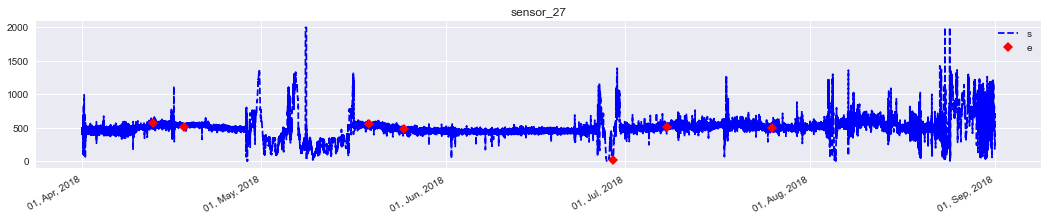

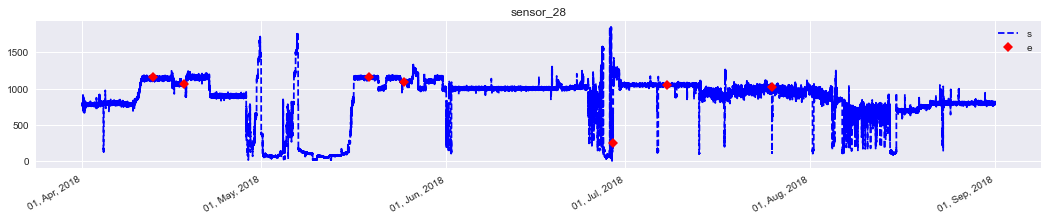

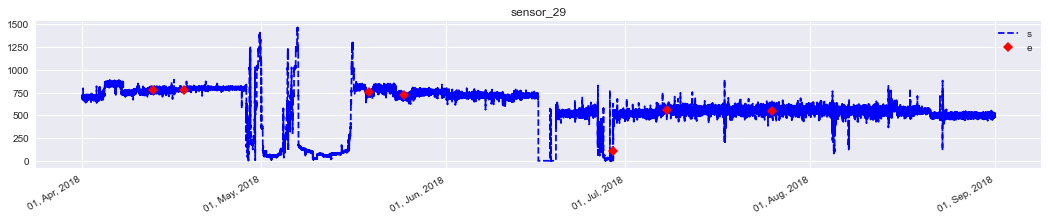

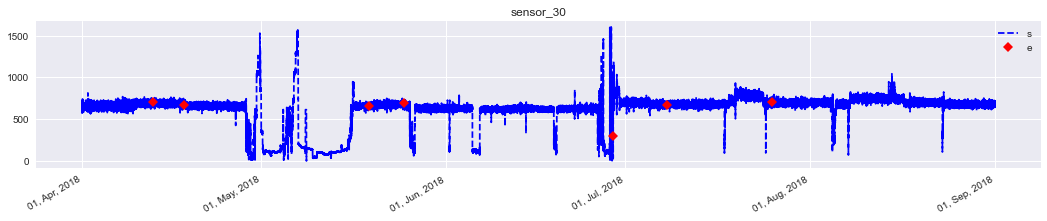

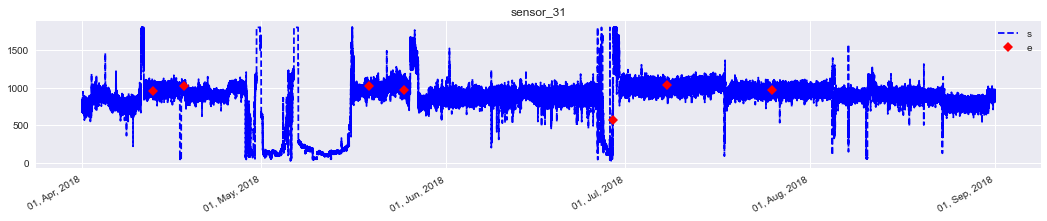

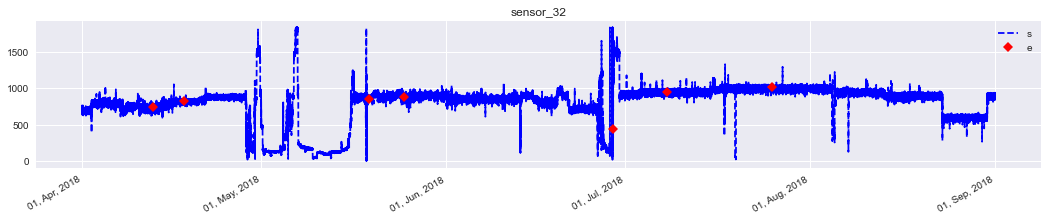

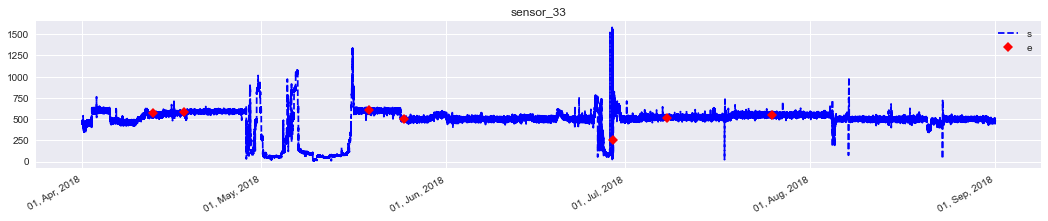

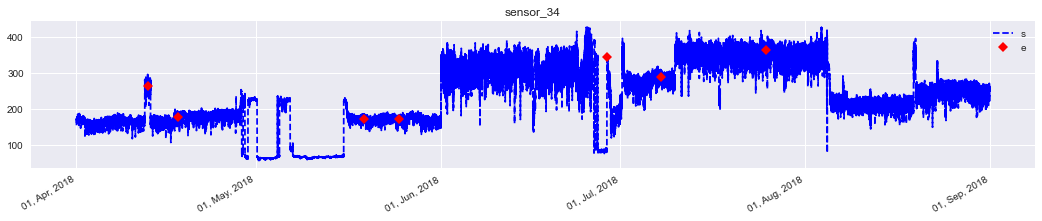

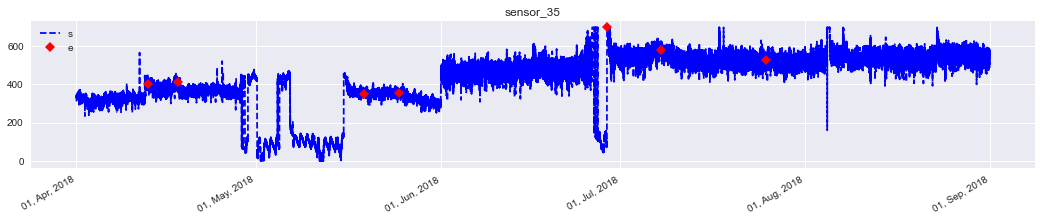

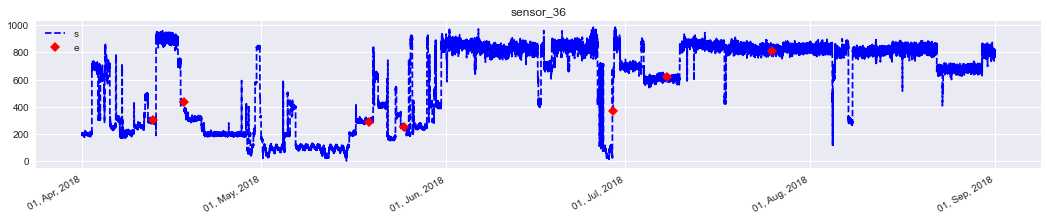

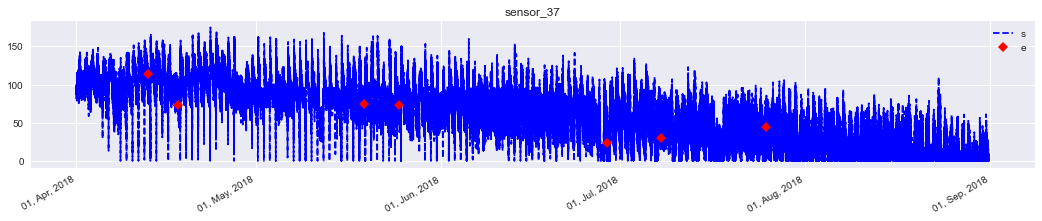

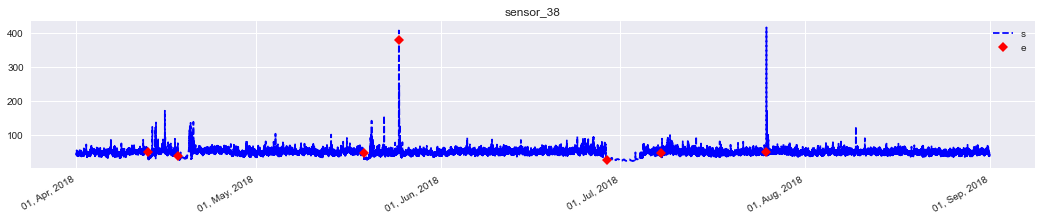

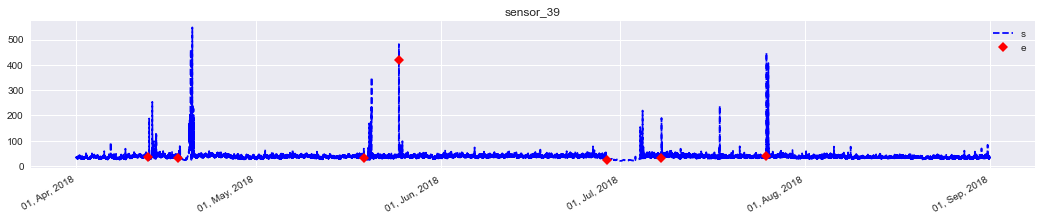

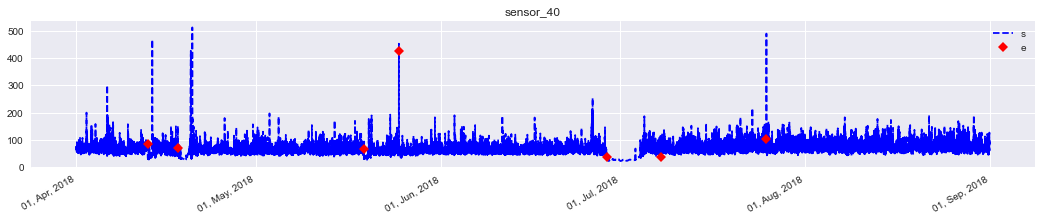

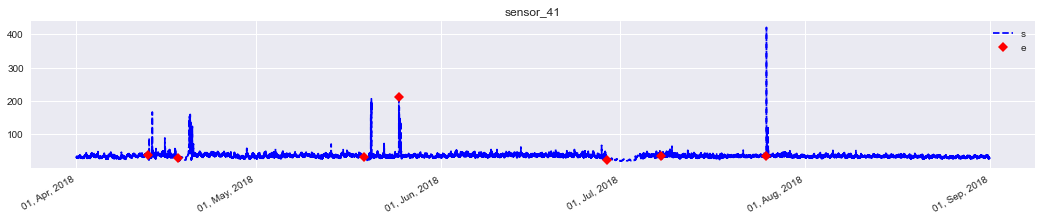

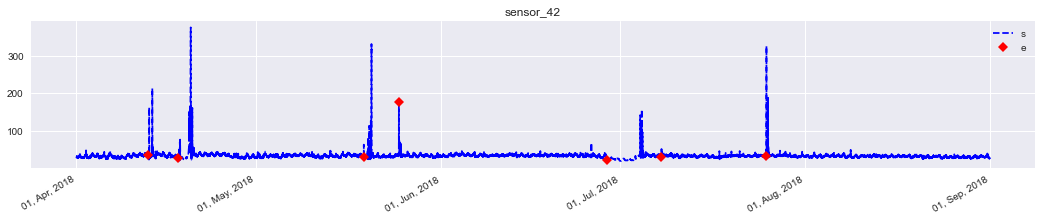

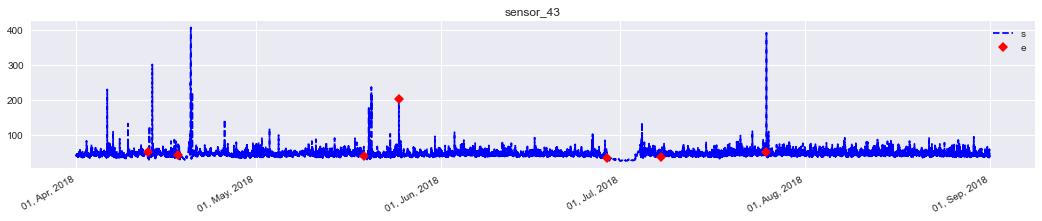

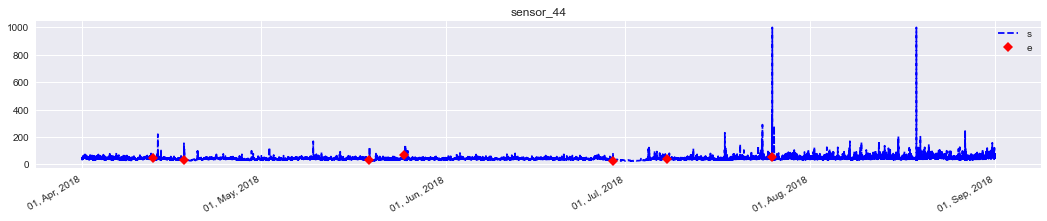

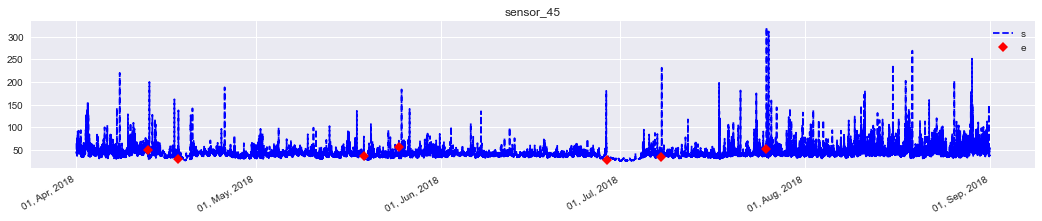

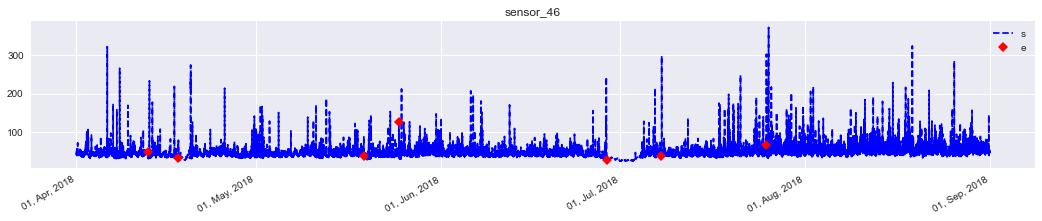

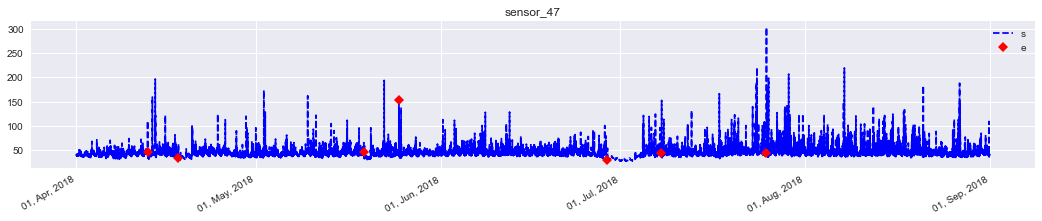

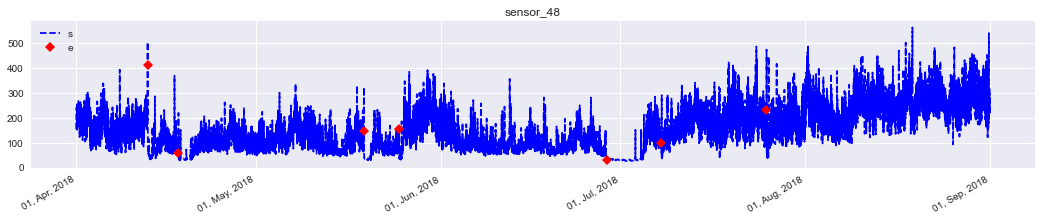

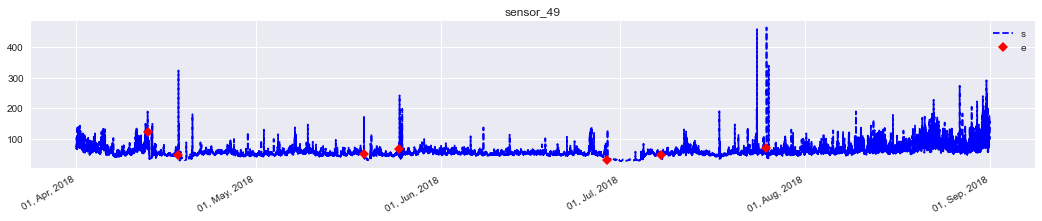

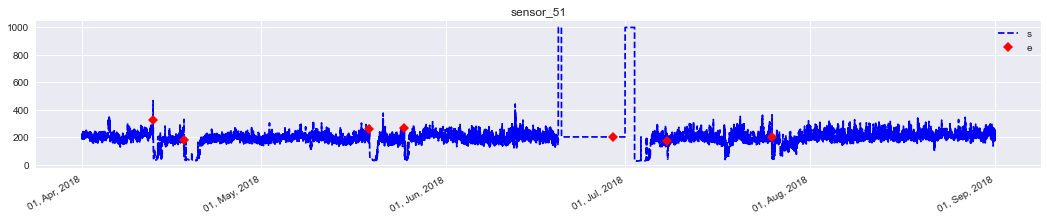

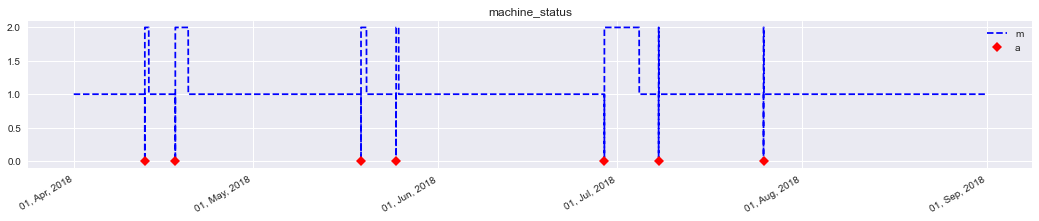

In [30]:
Broken = df[df['machine_status']==0]


df_Sensors = df.drop(['machine_status'], axis=1)
sensors=df.columns
for sensor in sensors:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='blue',linestyle='--', zorder=1)
    plt.plot(Broken[sensor], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.title(sensor)
    plt.legend(sensor)
    plt.show()

### Plotting anomalies for Recovering 

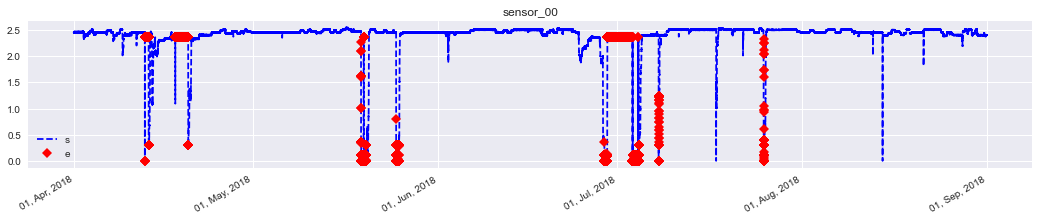

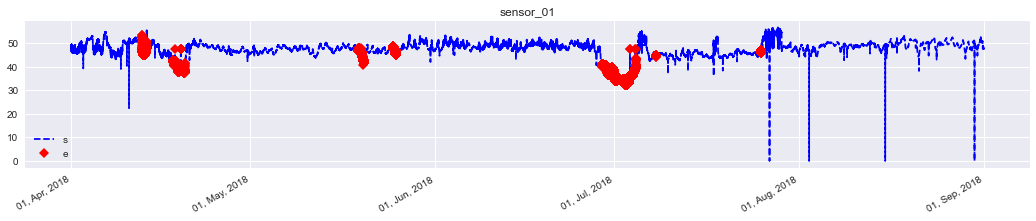

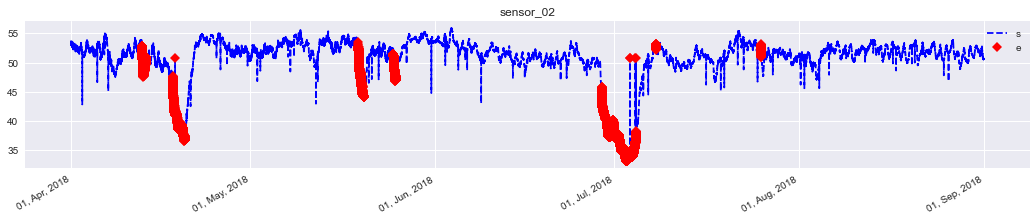

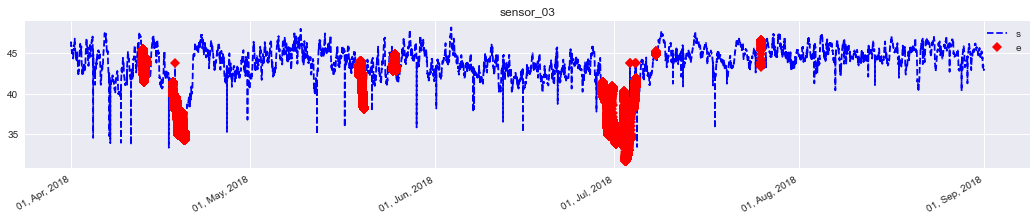

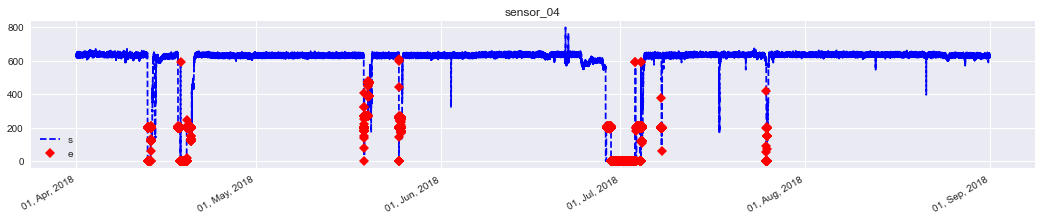

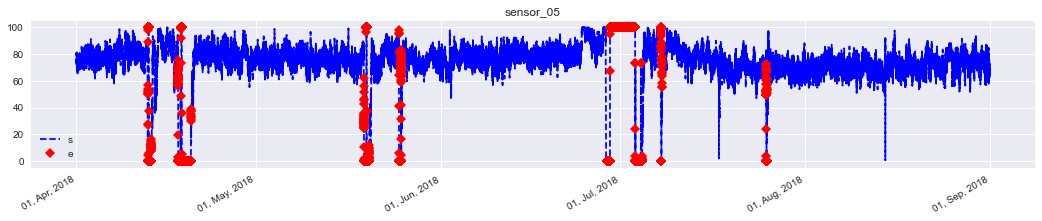

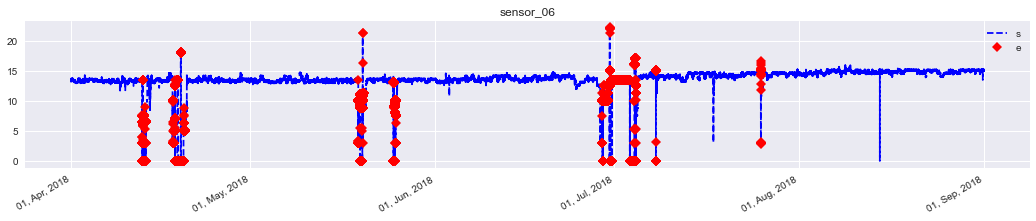

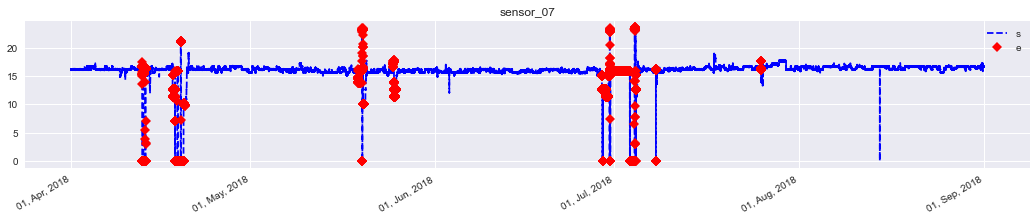

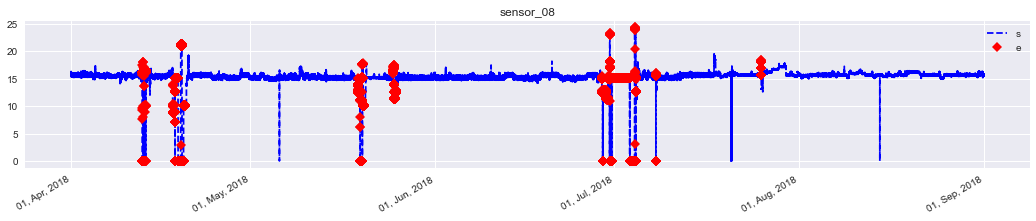

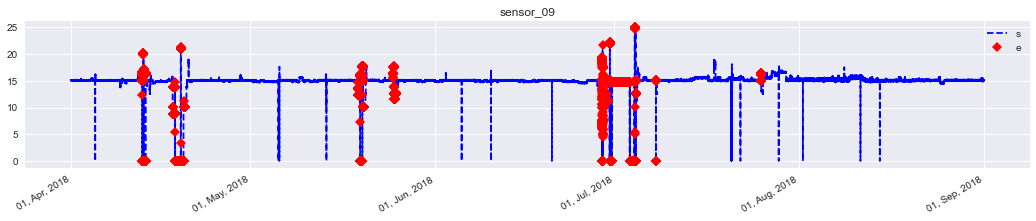

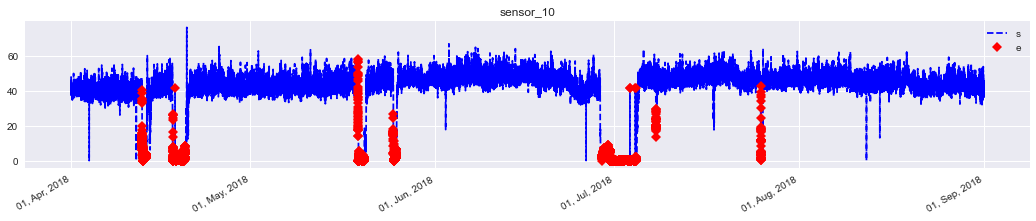

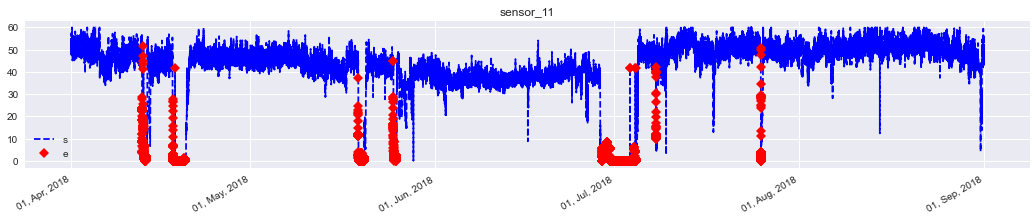

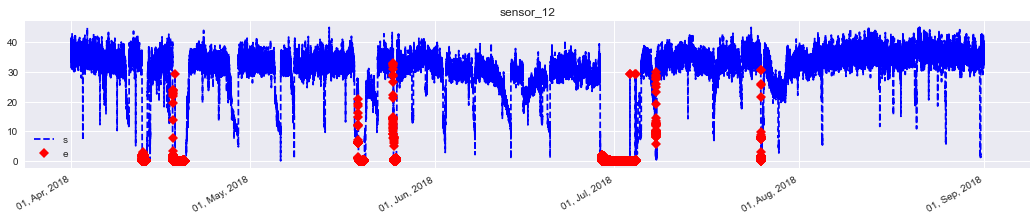

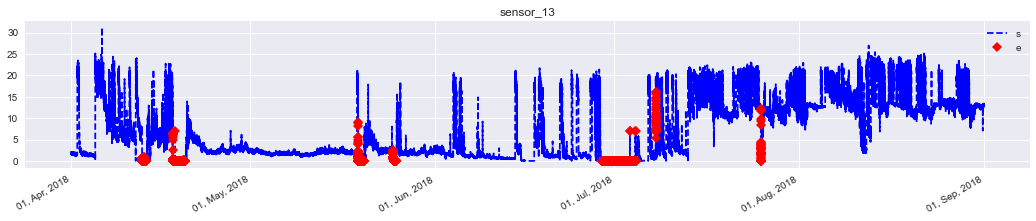

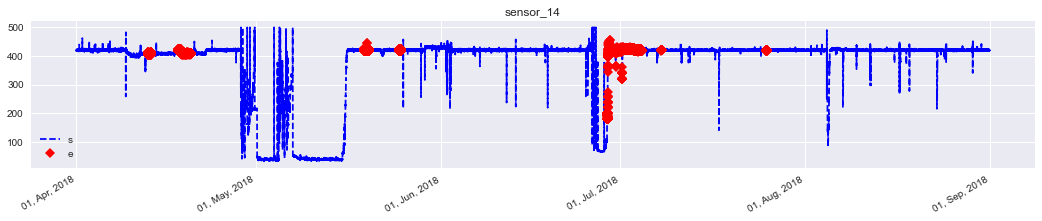

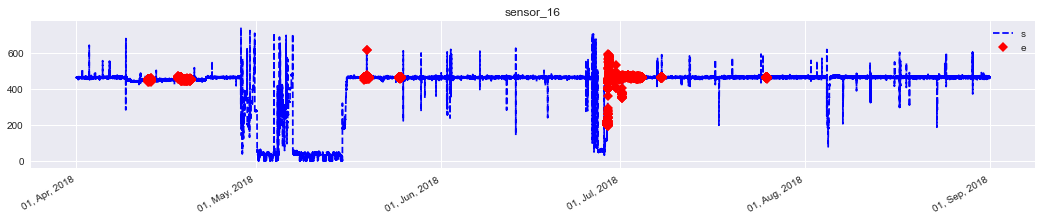

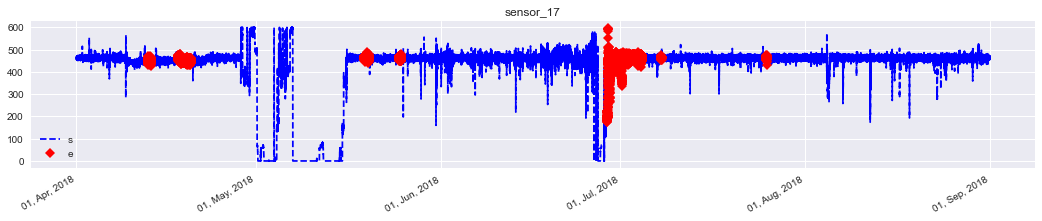

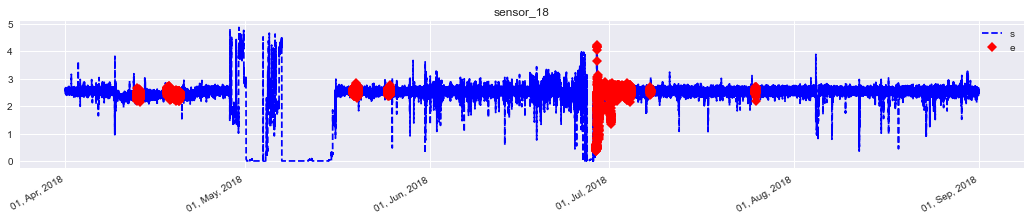

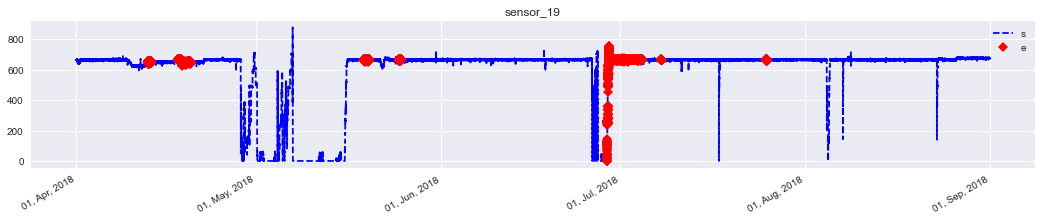

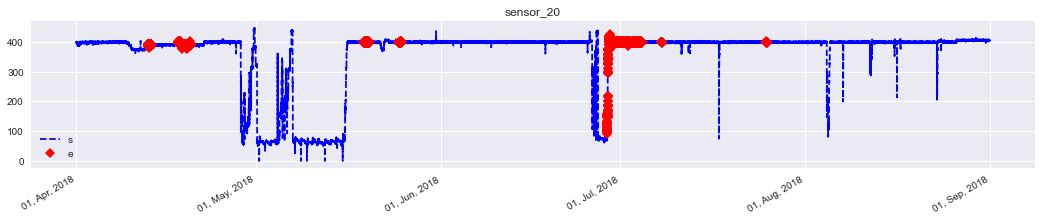

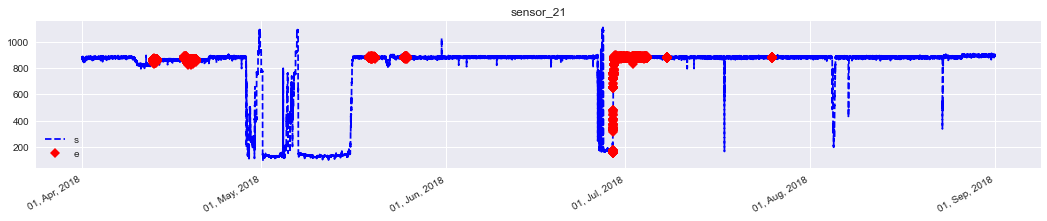

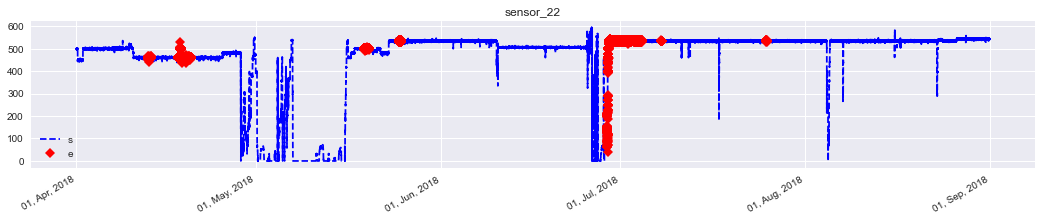

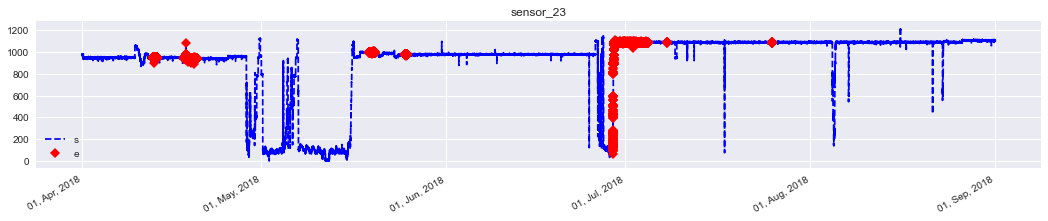

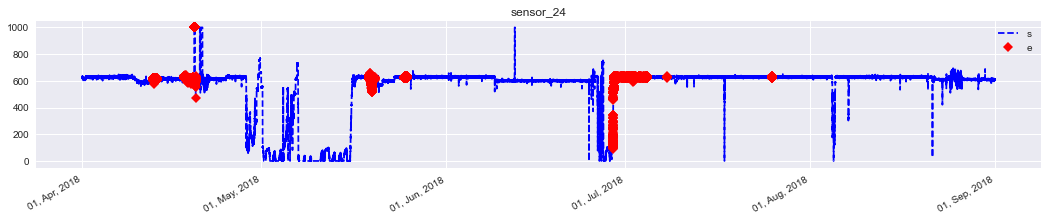

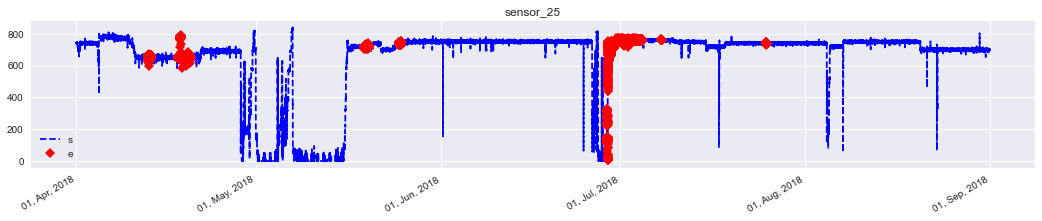

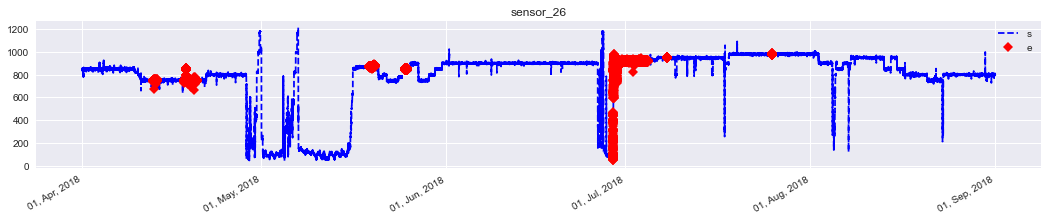

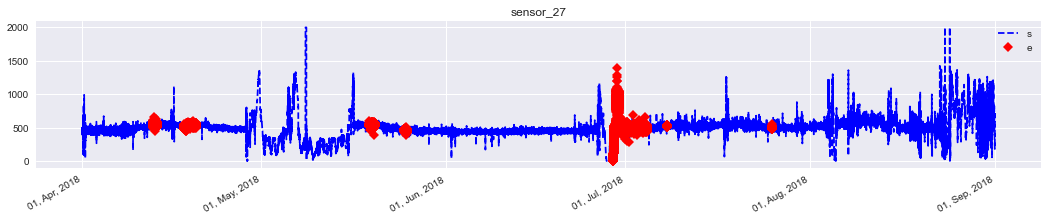

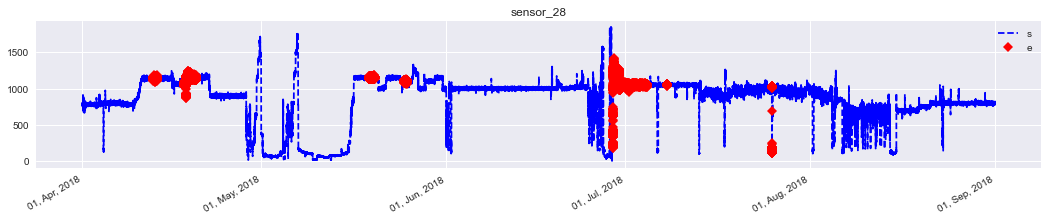

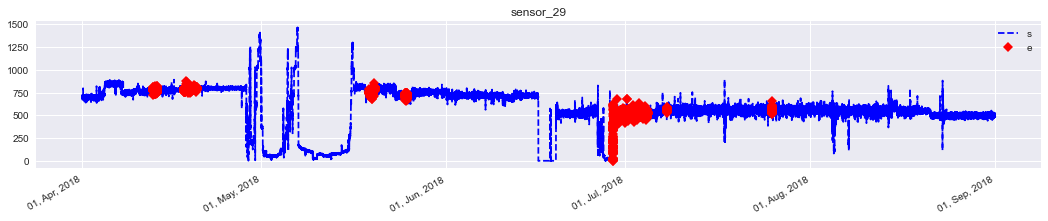

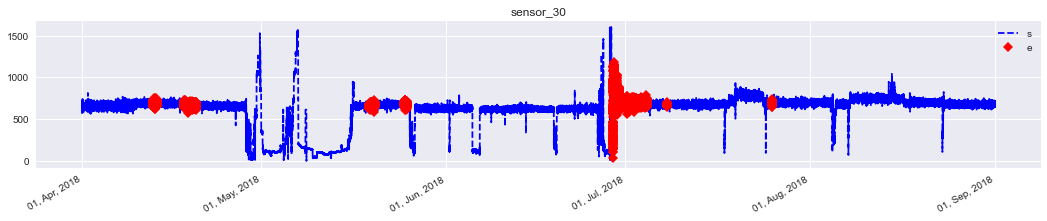

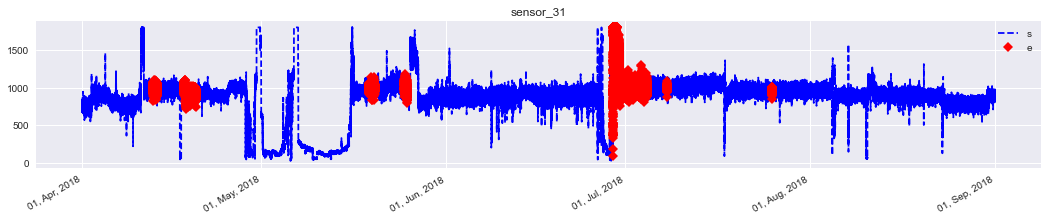

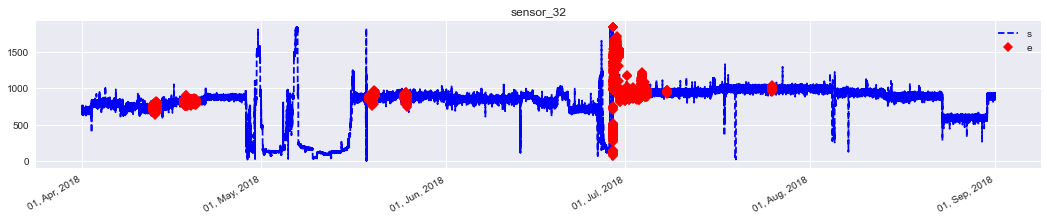

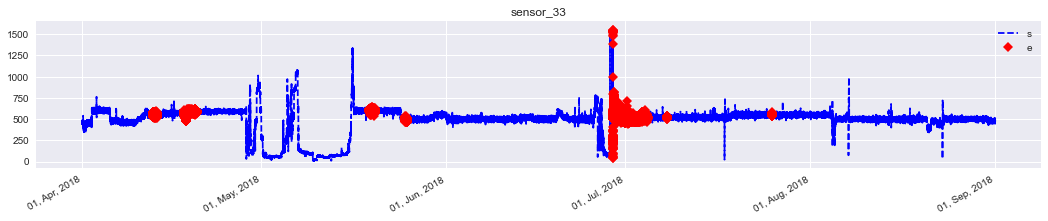

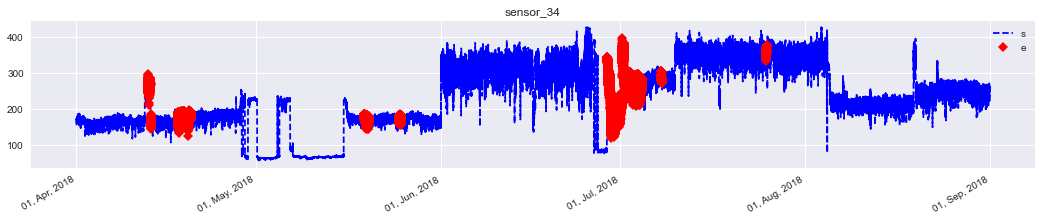

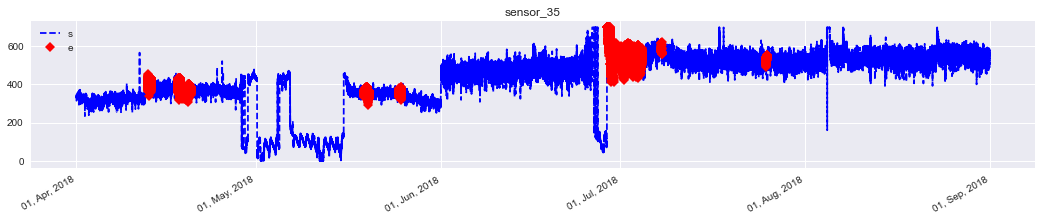

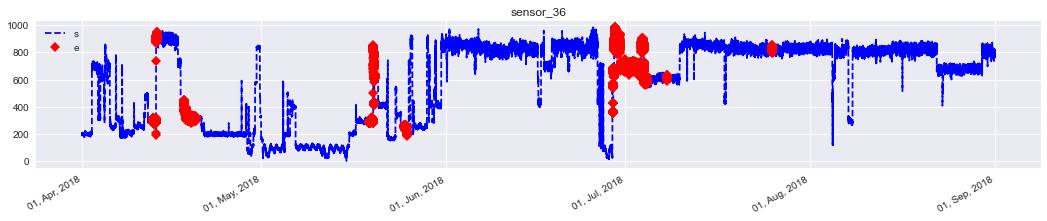

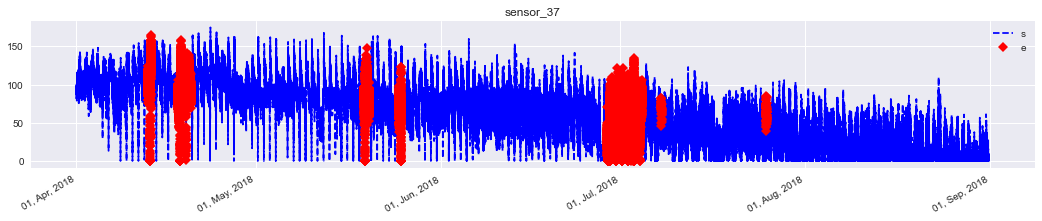

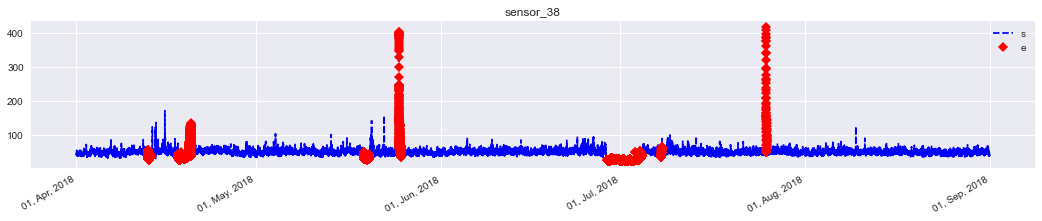

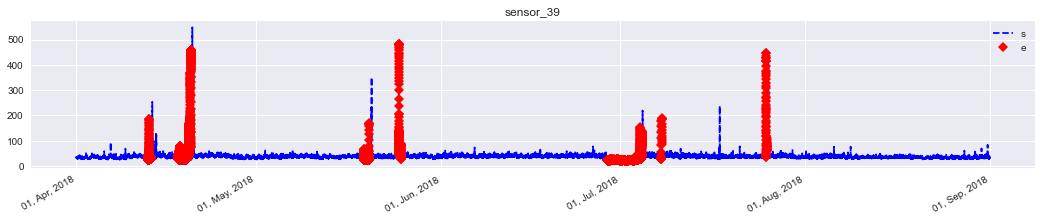

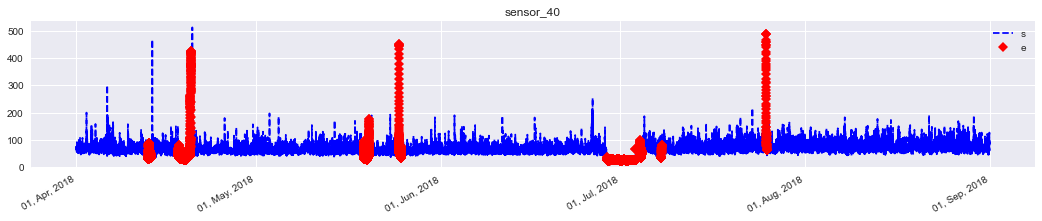

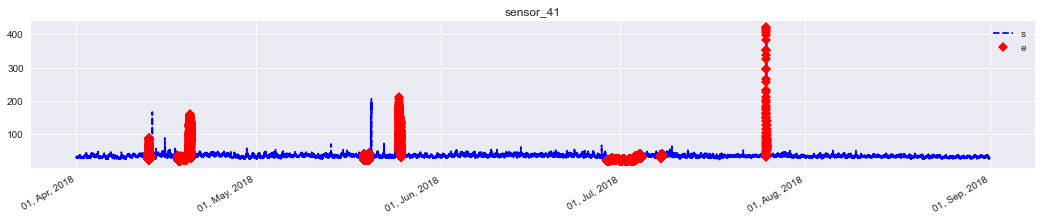

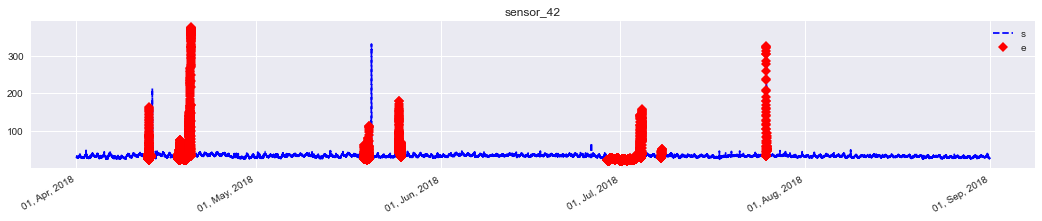

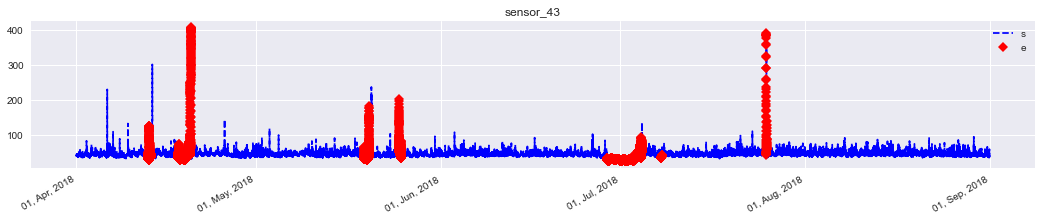

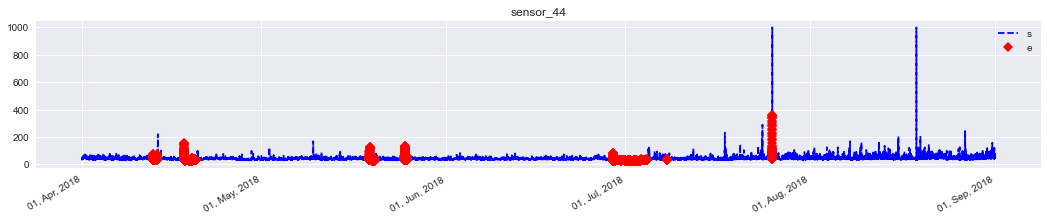

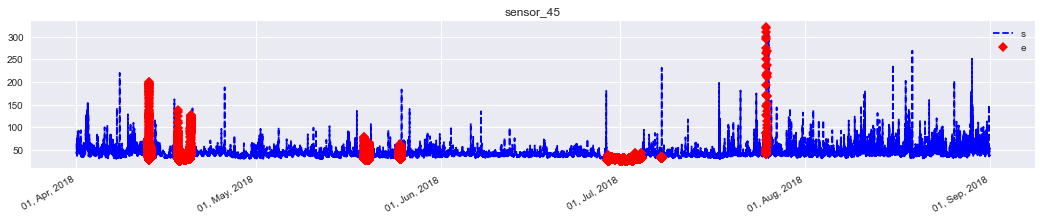

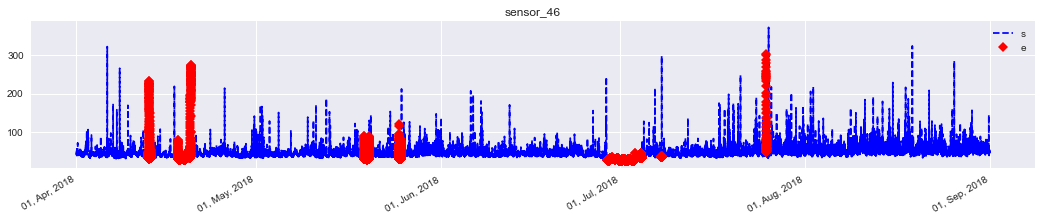

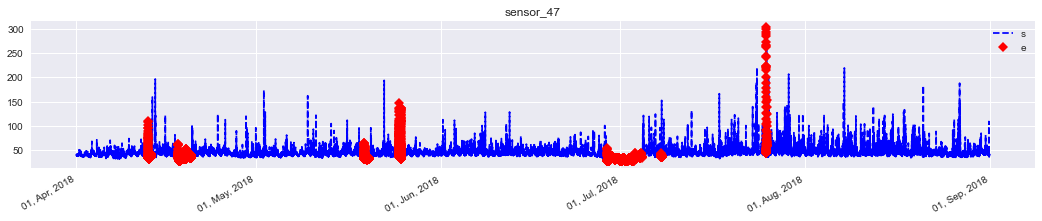

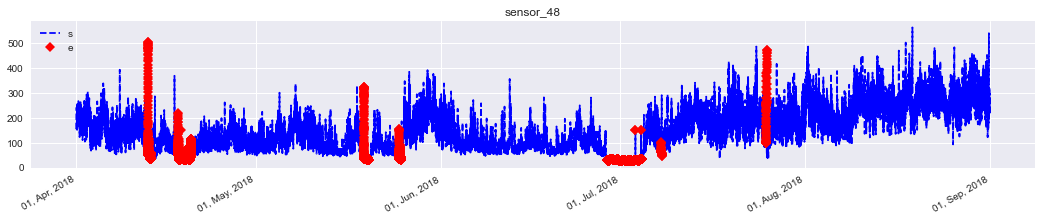

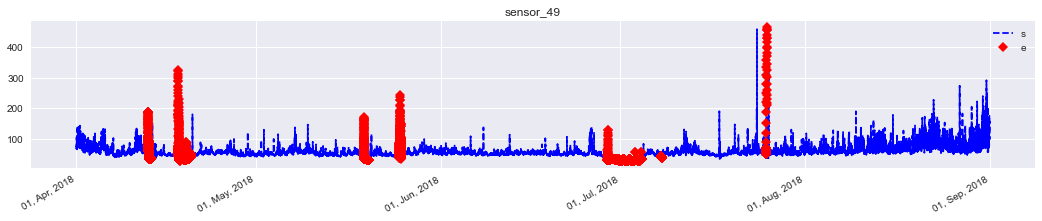

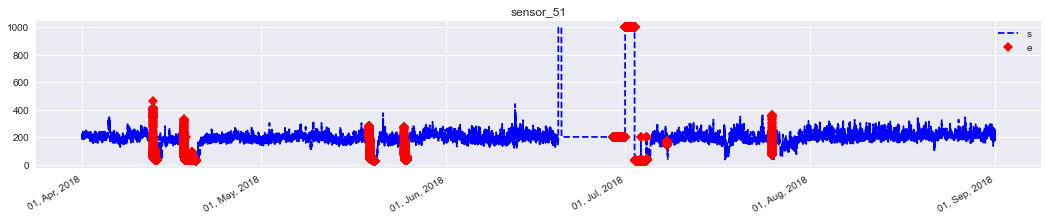

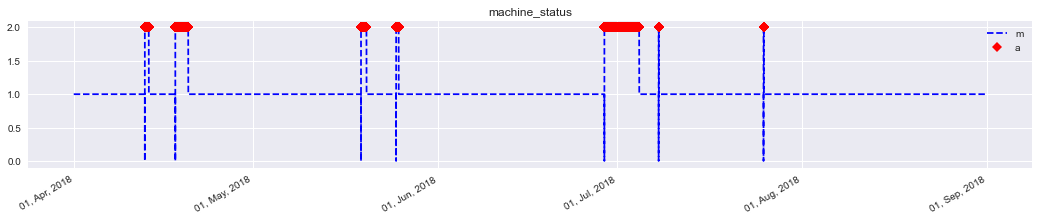

In [31]:
Recovering = df[df['machine_status']==2]
for sensor in sensors:
    plt.style.use('seaborn')
    plt.figure(figsize=(18,3))
    plt.plot(df[sensor], color='blue',linestyle='--', zorder=1)
    plt.plot(Recovering[sensor], linestyle='none', marker='D', color='red',zorder=2)
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.title(sensor)
    plt.legend(sensor)
    plt.show()

In [32]:
from statsmodels.tsa.stattools import acf, pacf
from matplotlib import dates as mpl_dates

### count of actual anomalies to predict

In [33]:
print("number of samples :", df.shape[0])
print("number of anomalies1 : ", Broken.shape[0])
print("number of anomalies2 : ", Recovering.shape[0])

number of samples : 220320
number of anomalies1 :  7
number of anomalies2 :  14477


In [34]:
df[df['machine_status']==0]['sensor_00'].value_counts()

0.000000    1
1.093982    1
2.258796    1
2.321759    1
0.364005    1
0.001968    1
2.318808    1
Name: sensor_00, dtype: int64

In [35]:
df[df['machine_status']==2]['sensor_00'].value_counts()

2.372221    10194
0.001968     1618
0.001968      636
0.003935      405
0.003935      387
            ...  
1.604572        1
0.643403        1
0.752604        1
0.744734        1
0.019676        1
Name: sensor_00, Length: 115, dtype: int64

### Feature selection of Best performing sensors using RandomForest Classifier 

In [36]:
data1 = df.copy()
data1.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
time                                                                         
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
time                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_42  sensor_43  sensor_44  sensor_45  \
time                 ...                                               
2018-04-01 00:00:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:01:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:02:00  ...  31.770830   41.66666  39.351852   65.39352   
2018-04-01 00:03:00  ...  31.510420   40.88541  39.062500   64.81481   
2018-04-01 00:04:00  ...  31.510420   41.40625  38.773150   65.10416   

                     sensor_46  sensor_47  sensor_48  sensor_49  sensor_51  \
time                                                                         
2018-04-01 00:00:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:01:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:02:00   51.21528  38.194443   155.9606   67.12963   203.7037   
2018-04-01 00:03:00   51.21528  38.194440   155.9606   66.84028   203.1250   
2018-04-01 00:04:00   51.79398  38.773150   158.2755   66.55093   201.3889   

                     machine_status  
time                                 
2018-04-01 00:00:00               1  
2018-04-01 00:01:00               1  
2018-04-01 00:02:00               1  
2018-04-01 00:03:00               1  
2018-04-01 00:04:00               1  

[5 rows x 51 columns]

In [37]:
data1.reset_index(inplace=True)

In [38]:
data1=data1.drop('time',axis=1)

In [39]:
data1.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  sensor_05  \
0   2.465394   47.09201    53.2118  46.310760   634.3750   76.45975   
1   2.465394   47.09201    53.2118  46.310760   634.3750   76.45975   
2   2.444734   47.35243    53.2118  46.397570   638.8889   73.54598   
3   2.460474   47.09201    53.1684  46.397568   628.1250   76.98898   
4   2.445718   47.13541    53.2118  46.397568   636.4583   76.58897   

   sensor_06  sensor_07  sensor_08  sensor_09  ...  sensor_42  sensor_43  \
0   13.41146   16.13136   15.56713   15.05353  ...  31.770832   41.92708   
1   13.41146   16.13136   15.56713   15.05353  ...  31.770832   41.92708   
2   13.32465   16.03733   15.61777   15.01013  ...  31.770830   41.66666   
3   13.31742   16.24711   15.69734   15.08247  ...  31.510420   40.88541   
4   13.35359   16.21094   15.69734   15.08247  ...  31.510420   41.40625   

   sensor_44  sensor_45  sensor_46  sensor_47  sensor_48  sensor_49  \
0  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
1  39.641200   65.68287   50.92593  38.194440   157.9861   67.70834   
2  39.351852   65.39352   51.21528  38.194443   155.9606   67.12963   
3  39.062500   64.81481   51.21528  38.194440   155.9606   66.84028   
4  38.773150   65.10416   51.79398  38.773150   158.2755   66.55093   

   sensor_51  machine_status  
0   201.3889               1  
1   201.3889               1  
2   203.7037               1  
3   203.1250               1  
4   201.3889               1  

[5 rows x 51 columns]

In [40]:
x= data1.drop(['machine_status'], axis=1)
y=data1['machine_status']

print(x.shape)
print(y.shape)

(220320, 50)
(220320,)


In [41]:
scaler2= MinMaxScaler()
x = scaler2.fit_transform(x)
x, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)

In [42]:

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
# clf = RandomForestClassifier(random_state=0)
# clf.fit(X_train, y_train)
# print(clf.predict(y_test))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(670, 4)
(670,)
(330, 4)
(330,)


In [43]:
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(clf.predict(X_test))


[0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1
 1 1 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0
 1 1 0 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0 0
 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 0 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 0 1 1 1 0 1 1 1
 1 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0]


In [44]:
 print("ACCURACY OF THE MODEL: ",accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.9424242424242424


In [45]:
feat_labels = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03', 'sensor_04',
       'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08', 'sensor_09',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20',
       'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24', 'sensor_25',
       'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29', 'sensor_30',
       'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34', 'sensor_35',
       'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39', 'sensor_40',
       'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44', 'sensor_45',
       'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49', 'sensor_51']

In [46]:
for feature in zip(feat_labels, clf.feature_importances_):
    print(feature)

('sensor_00', 0.07549443787405556)
('sensor_01', 0.8504668883055808)
('sensor_02', 0.030796922645023025)
('sensor_03', 0.04324175117534071)


### Checking the stationarity for selected sensors

In [47]:
data2 = df.copy()

In [48]:
data2

sensor_00  sensor_01  sensor_02  sensor_03   sensor_04  \
time                                                                          
2018-04-01 00:00:00   2.465394   47.09201  53.211800  46.310760  634.375000   
2018-04-01 00:01:00   2.465394   47.09201  53.211800  46.310760  634.375000   
2018-04-01 00:02:00   2.444734   47.35243  53.211800  46.397570  638.888900   
2018-04-01 00:03:00   2.460474   47.09201  53.168400  46.397568  628.125000   
2018-04-01 00:04:00   2.445718   47.13541  53.211800  46.397568  636.458300   
...                        ...        ...        ...        ...         ...   
2018-08-31 23:55:00   2.407350   47.69965  50.520830  43.142361  634.722229   
2018-08-31 23:56:00   2.400463   47.69965  50.564240  43.142361  630.902771   
2018-08-31 23:57:00   2.396528   47.69965  50.520830  43.142361  625.925903   
2018-08-31 23:58:00   2.406366   47.69965  50.520832  43.142361  635.648100   
2018-08-31 23:59:00   2.396528   47.69965  50.520832  43.142361  639.814800   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
time                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00   64.59095   15.11863   16.65220   15.65393   15.16204   
2018-08-31 23:56:00   65.83363   15.15480   16.70284   15.65393   15.11863   
2018-08-31 23:57:00   67.29445   15.08970   16.70284   15.69734   15.11863   
2018-08-31 23:58:00   65.09175   15.11863   16.56539   15.74074   15.11863   
2018-08-31 23:59:00   65.45634   15.11863   16.65220   15.65393   15.01013   

                     ...  sensor_42  sensor_43  sensor_44  sensor_45  \
time                 ...                                               
2018-04-01 00:00:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:01:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:02:00  ...  31.770830   41.66666  39.351852   65.39352   
2018-04-01 00:03:00  ...  31.510420   40.88541  39.062500   64.81481   
2018-04-01 00:04:00  ...  31.510420   41.40625  38.773150   65.10416   
...                  ...        ...        ...        ...        ...   
2018-08-31 23:55:00  ...  30.208330   38.28125  68.287030   52.37268   
2018-08-31 23:56:00  ...  29.947920   38.28125  66.840280   50.63657   
2018-08-31 23:57:00  ...  30.208330   39.06250  65.393520   48.90046   
2018-08-31 23:58:00  ...  30.208332   40.62500  64.236110   47.74306   
2018-08-31 23:59:00  ...  30.208332   41.40625  62.789350   46.29630   

                     sensor_46  sensor_47  sensor_48  sensor_49  sensor_51  \
time                                                                         
2018-04-01 00:00:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:01:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:02:00   51.21528  38.194443   155.9606   67.12963   203.7037   
2018-04-01 00:03:00   51.21528  38.194440   155.9606   66.84028   203.1250   
2018-04-01 00:04:00   51.79398  38.773150   158.2755   66.55093   201.3889   
...                        ...        ...        ...        ...        ...   
2018-08-31 23:55:00   48.32176  41.087960   212.3843  153.64580   231.1921   
2018-08-31 23:56:00   48.03241  40.798610   213.8310  156.25000   231.1921   
2018-08-31 23:57:00   48.03241  40.798610   217.3032  155.38190   232.0602   
2018-08-31 23:58:00   48.32176  40.509258   222.5116  153.93520   234.0856   
2018-08-31 23:59:00   48.90046  40.219910   227.4306  150.46300   234.0856   

                     machi

In [49]:
data2 = data2[['sensor_00','sensor_01', 'sensor_02', 'sensor_03', 'machine_status']].copy()

In [50]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(df,column='', signif=0.05, series=False):
    if series:
        adf_test = adfuller(df, autolag='AIC')
    else:
        adf_test = adfuller(df[column], autolag='AIC')
    p_value = adf_test[1]
    if p_value <= signif:
        test_result = "Stationary"
    else:
        test_result = "Non-Stationary"
    return test_result

In [51]:
print(test_stationarity(data2))

KeyError: ''

### checking the mean and standard deviation for the selected sensors

In [52]:
def check_mean_std(ts, name):

    rolmean = ts.rolling(window=192).mean()
    rolstd = ts.rolling(window=192).std()
    plt.figure(figsize=(12,8))   
    print(name)
    
    plt.style.use('seaborn')
    plt.figure(figsize=(12,8))
    plt.plot(ts, color='red',label='Original')
    plt.plot(rolmean, color='black', label='Rolling Mean')
    plt.plot(rolstd, color='green', label = 'Rolling Std')
    plt.gcf().autofmt_xdate()
    date_format = mpl_dates.DateFormatter('%d, %b, %Y')
    plt.gca().xaxis.set_major_formatter(date_format)
    plt.tight_layout()
    plt.xlabel("Date")
    plt.ylabel("MACHINE")
    plt.title('Log Scale Differeced MACHINE Rolling Mean & Standard Deviation')
    plt.legend()
    plt.show()



SENSOR_0


<Figure size 864x576 with 0 Axes>

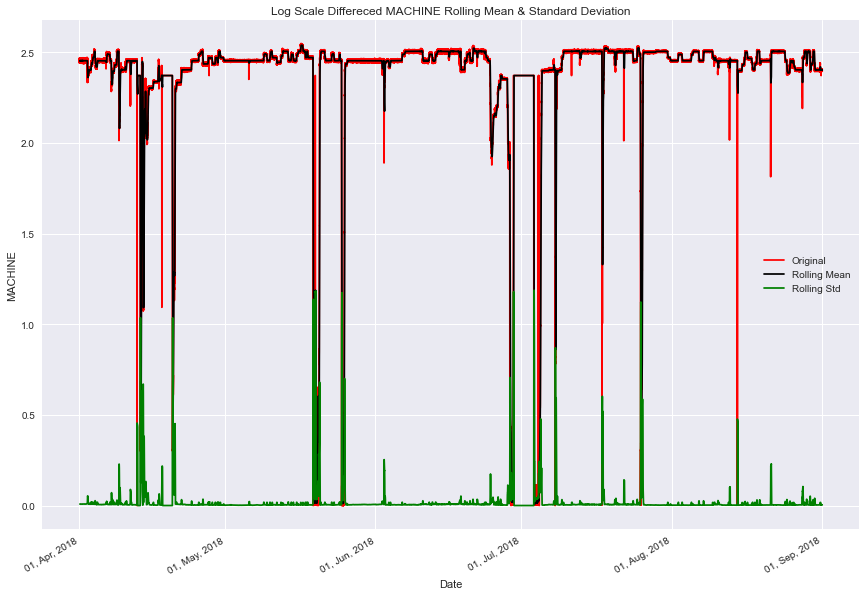



SENSOR_1


<Figure size 864x576 with 0 Axes>

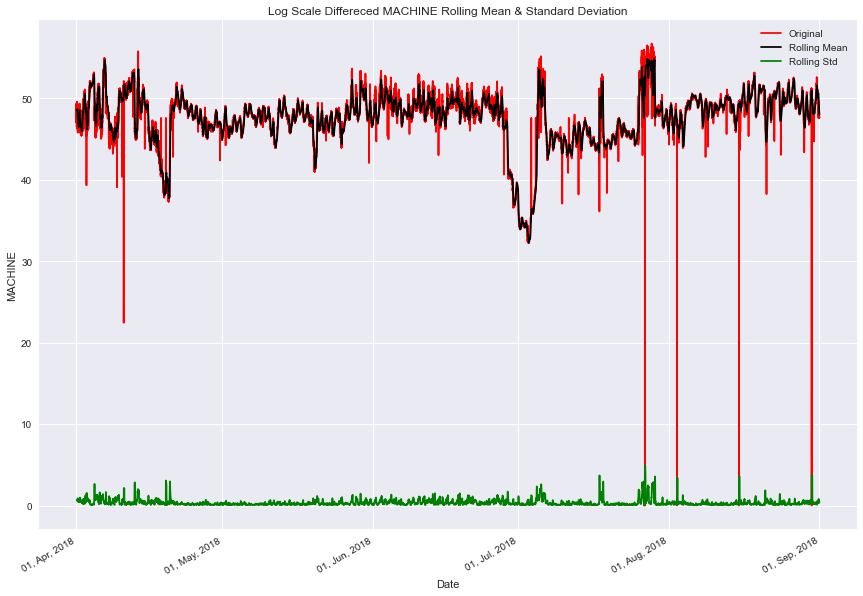



SENSOR_2


<Figure size 864x576 with 0 Axes>

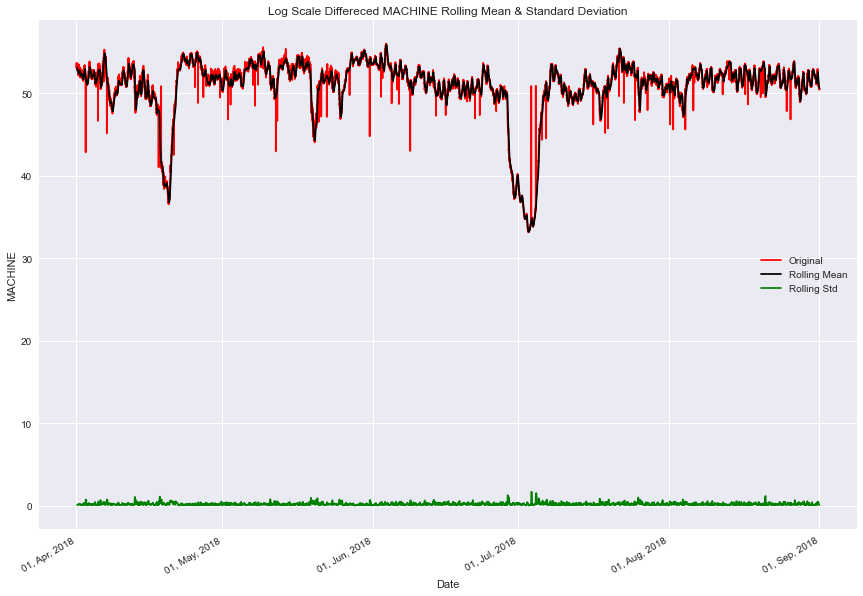



SENSOR_3


<Figure size 864x576 with 0 Axes>

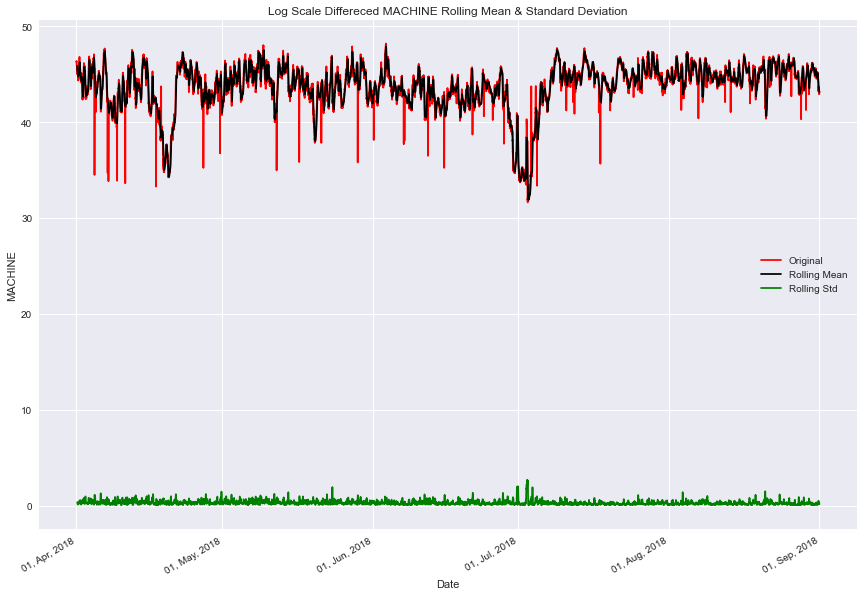

In [53]:
check_mean_std(df['sensor_00'],'\n\nSENSOR_0')
check_mean_std(df['sensor_01'],'\n\nSENSOR_1')
check_mean_std(df['sensor_02'],'\n\nSENSOR_2')
check_mean_std(df['sensor_03'],'\n\nSENSOR_3')

## MAD

In [54]:
df.head()

sensor_00  sensor_01  sensor_02  sensor_03  sensor_04  \
time                                                                         
2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   634.3750   
2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   638.8889   
2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   628.1250   
2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   636.4583   

                     sensor_05  sensor_06  sensor_07  sensor_08  sensor_09  \
time                                                                         
2018-04-01 00:00:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:01:00   76.45975   13.41146   16.13136   15.56713   15.05353   
2018-04-01 00:02:00   73.54598   13.32465   16.03733   15.61777   15.01013   
2018-04-01 00:03:00   76.98898   13.31742   16.24711   15.69734   15.08247   
2018-04-01 00:04:00   76.58897   13.35359   16.21094   15.69734   15.08247   

                     ...  sensor_42  sensor_43  sensor_44  sensor_45  \
time                 ...                                               
2018-04-01 00:00:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:01:00  ...  31.770832   41.92708  39.641200   65.68287   
2018-04-01 00:02:00  ...  31.770830   41.66666  39.351852   65.39352   
2018-04-01 00:03:00  ...  31.510420   40.88541  39.062500   64.81481   
2018-04-01 00:04:00  ...  31.510420   41.40625  38.773150   65.10416   

                     sensor_46  sensor_47  sensor_48  sensor_49  sensor_51  \
time                                                                         
2018-04-01 00:00:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:01:00   50.92593  38.194440   157.9861   67.70834   201.3889   
2018-04-01 00:02:00   51.21528  38.194443   155.9606   67.12963   203.7037   
2018-04-01 00:03:00   51.21528  38.194440   155.9606   66.84028   203.1250   
2018-04-01 00:04:00   51.79398  38.773150   158.2755   66.55093   201.3889   

                     machine_status  
time                                 
2018-04-01 00:00:00               1  
2018-04-01 00:01:00               1  
2018-04-01 00:02:00               1  
2018-04-01 00:03:00               1  
2018-04-01 00:04:00               1  

[5 rows x 51 columns]

In [55]:
df.reset_index(inplace=True)

In [56]:
df1 = df[['time', 'sensor_00','machine_status']]
df2 = df[['time', 'sensor_01','machine_status']]
df3= df[['time', 'sensor_02','machine_status']]
df4 = df[['time', 'sensor_03','machine_status']]


## For Sensor00

In [57]:
df1

time  sensor_00  machine_status
0      2018-04-01 00:00:00   2.465394               1
1      2018-04-01 00:01:00   2.465394               1
2      2018-04-01 00:02:00   2.444734               1
3      2018-04-01 00:03:00   2.460474               1
4      2018-04-01 00:04:00   2.445718               1
...                    ...        ...             ...
220315 2018-08-31 23:55:00   2.407350               1
220316 2018-08-31 23:56:00   2.400463               1
220317 2018-08-31 23:57:00   2.396528               1
220318 2018-08-31 23:58:00   2.406366               1
220319 2018-08-31 23:59:00   2.396528               1

[220320 rows x 3 columns]

In [58]:
missing_data(df1)

Total  Percent
time                0      0.0
sensor_00           0      0.0
machine_status      0      0.0

In [59]:
def fit_model(model, data, column='sensor_00'):
    # fit the model and predict it
    mad_df = df1.copy()
    data_to_predict = data[column].to_numpy().reshape(-1, 1)
    predictions = model.fit_predict(data_to_predict)
    mad_df['Predictions'] = predictions
    
    return mad_df


In [60]:
mad_model = MAD()
mad_df1 = fit_model(mad_model,df1)


C:\Users\Anand\.conda\envs\newproject\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [61]:
missing_data(mad_df1)

Total  Percent
time                0      0.0
sensor_00           0      0.0
machine_status      0      0.0
Predictions         0      0.0

In [62]:
mad_df1

time  sensor_00  machine_status  Predictions
0      2018-04-01 00:00:00   2.465394               1            0
1      2018-04-01 00:01:00   2.465394               1            0
2      2018-04-01 00:02:00   2.444734               1            0
3      2018-04-01 00:03:00   2.460474               1            0
4      2018-04-01 00:04:00   2.445718               1            0
...                    ...        ...             ...          ...
220315 2018-08-31 23:55:00   2.407350               1            0
220316 2018-08-31 23:56:00   2.400463               1            0
220317 2018-08-31 23:57:00   2.396528               1            0
220318 2018-08-31 23:58:00   2.406366               1            0
220319 2018-08-31 23:59:00   2.396528               1            0

[220320 rows x 4 columns]

In [63]:
mad_df1['Predictions'].unique()
mad_df1[mad_df1['Predictions']==1]['machine_status'].value_counts()

1    8802
2    4279
0       4
Name: machine_status, dtype: int64

In [69]:
y_true=mad_df1['machine_status'].values
y_pred=mad_df1['Predictions'].values



In [70]:
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1.006


In [71]:
f1_score(y_true, y_pred, average='weighted')

0.07512618799190007

In [72]:
mad_df1=mad_df1.set_index('time', drop=True)

KeyError: "None of ['time'] are in the columns"

In [74]:
mad_df1

sensor_00  machine_status  Predictions
time                                                       
2018-04-01 00:00:00   2.465394               1            0
2018-04-01 00:01:00   2.465394               1            0
2018-04-01 00:02:00   2.444734               1            0
2018-04-01 00:03:00   2.460474               1            0
2018-04-01 00:04:00   2.445718               1            0
...                        ...             ...          ...
2018-08-31 23:55:00   2.407350               1            0
2018-08-31 23:56:00   2.400463               1            0
2018-08-31 23:57:00   2.396528               1            0
2018-08-31 23:58:00   2.406366               1            0
2018-08-31 23:59:00   2.396528               1            0

[220320 rows x 3 columns]

In [75]:
mad_df1['Predictions'].unique()
mad_df1['Predictions'].value_counts()

0    207235
1     13085
Name: Predictions, dtype: int64

In [76]:
mad_df1[mad_df1['Predictions']==1]['machine_status'].value_counts()

1    8802
2    4279
0       4
Name: machine_status, dtype: int64

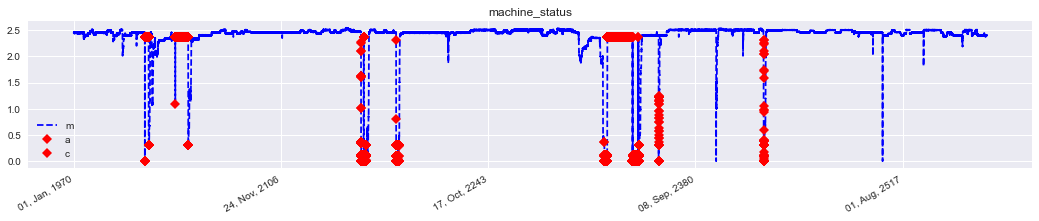

In [77]:
Broken = df1[df1['machine_status']==0]
Recovering=df1[df1['machine_status']==2]



plt.style.use('seaborn')
plt.figure(figsize=(18,3))
plt.plot(df1['sensor_00'], color='blue',linestyle='--', zorder=1)
plt.plot(Broken['sensor_00'], linestyle='none', marker='D', color='red',zorder=2)
plt.plot(Recovering['sensor_00'], linestyle='none', marker='D', color='r',zorder=2)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d, %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title(sensor)
plt.legend(sensor)
plt.show()

C:\Users\Anand\AppData\Local\Temp\ipykernel_26584\2911178827.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anomaly1 =mad_df1[mad_df1['Predictions']==1][mad_df1['machine_status']==0]
C:\Users\Anand\AppData\Local\Temp\ipykernel_26584\2911178827.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anomaly2=mad_df1[mad_df1['Predictions']==1][mad_df1['machine_status']==2]


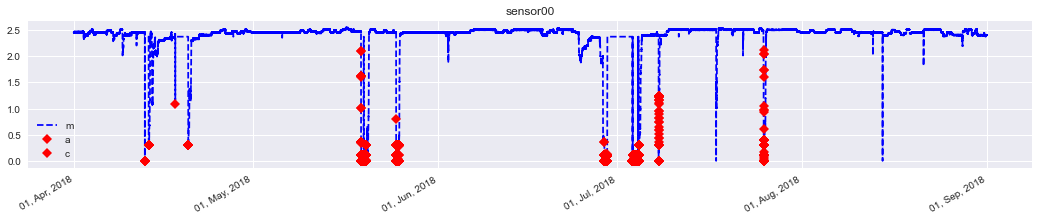

In [80]:
anomaly1 =mad_df1[mad_df1['Predictions']==1][mad_df1['machine_status']==0]
anomaly2=mad_df1[mad_df1['Predictions']==1][mad_df1['machine_status']==2]


plt.style.use('seaborn')
plt.figure(figsize=(18,3))
plt.plot(mad_df1['sensor_00'], color='blue',linestyle='--', zorder=2)
plt.plot(anomaly1['sensor_00'], linestyle='none', marker='D', color='red',zorder=2)
plt.plot(anomaly2['sensor_00'], linestyle='none', marker='D', color='red',zorder=2)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d, %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title('sensor00')
plt.legend(sensor)
plt.show()

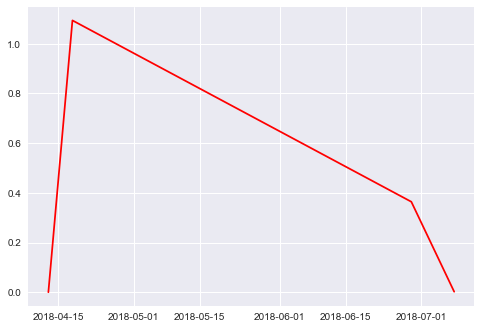

In [82]:
plt.plot(anomaly1['sensor_00'], color='red',zorder=1)

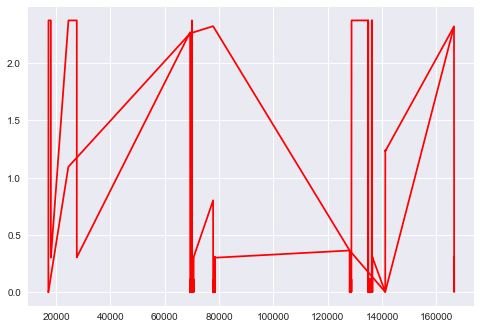

In [84]:
plt.plot(Broken['sensor_00'] , color='r',zorder=2)
plt.plot(Recovering['sensor_00'], color='r',zorder=2)

In [87]:
Anomaly_index1=pd.DataFrame(list(anomaly1.index))
Anomaly_index1

0
0 2018-04-12 21:55:00
1 2018-04-18 00:30:00
2 2018-06-28 22:00:00
3 2018-07-08 00:11:00

In [89]:
Anomaly_index2=pd.DataFrame(list(anomaly2.index))
Anomaly_index2

0
0    2018-04-12 21:56:00
1    2018-04-12 21:57:00
2    2018-04-12 21:58:00
3    2018-04-12 21:59:00
4    2018-04-13 13:16:00
...                  ...
4274 2018-07-25 15:11:00
4275 2018-07-25 15:12:00
4276 2018-07-25 15:13:00
4277 2018-07-25 15:14:00
4278 2018-07-25 15:15:00

[4279 rows x 1 columns]

In [98]:
print("number of anomalies1 : ", anomaly1.shape[0])
print("number of anomalies2 : ", anomaly2.shape[0])

number of anomalies1 :  4
number of anomalies2 :  4279


In [99]:
print("number of anomalies1 : ", Broken.shape[0])
print("number of anomalies2 : ", Recovering.shape[0])

number of anomalies1 :  7
number of anomalies2 :  14477


In [100]:
cm=confusion_matrix(y_true, y_pred)


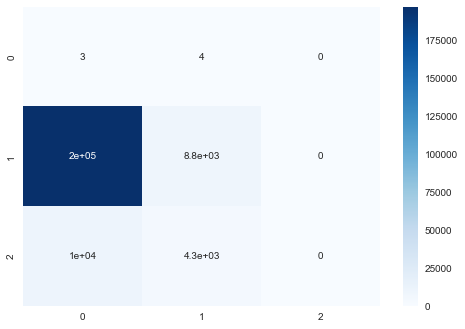

In [101]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

## FOR Sensor 01

In [119]:
df2

time  sensor_01  machine_status
0      2018-04-01 00:00:00   47.09201               1
1      2018-04-01 00:01:00   47.09201               1
2      2018-04-01 00:02:00   47.35243               1
3      2018-04-01 00:03:00   47.09201               1
4      2018-04-01 00:04:00   47.13541               1
...                    ...        ...             ...
220315 2018-08-31 23:55:00   47.69965               1
220316 2018-08-31 23:56:00   47.69965               1
220317 2018-08-31 23:57:00   47.69965               1
220318 2018-08-31 23:58:00   47.69965               1
220319 2018-08-31 23:59:00   47.69965               1

[220320 rows x 3 columns]

In [120]:
missing_data(df2)

Total  Percent
time                0      0.0
sensor_01           0      0.0
machine_status      0      0.0

In [121]:
def fit_model(model, data, column='sensor_01'):
    # fit the model and predict it
    mad_df = df2.copy()
    data_to_predict = data[column].to_numpy().reshape(-1, 1)
    predictions = model.fit_predict(data_to_predict)
    mad_df['Predictions'] = predictions
    
    return mad_df


In [122]:
mad_df2 = fit_model(mad_model,df2)


C:\Users\Anand\.conda\envs\newproject\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [123]:
mad_df2['Predictions'].unique()
mad_df2[mad_df2['Predictions']==1]['machine_status'].value_counts()

2    9242
1     104
0       1
Name: machine_status, dtype: int64

In [124]:
y_true=mad_df2['machine_status'].values
y_pred=mad_df2['Predictions'].values


In [125]:
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 1.023


In [126]:
f1_score(y_true, y_pred, average='micro')

0.0004992737835875091

In [127]:
mad_df2=mad_df2.set_index('time', drop=True)

In [128]:
mad_df1[mad_df1['Predictions']==1]['machine_status'].value_counts()

1    8802
2    4279
0       4
Name: machine_status, dtype: int64

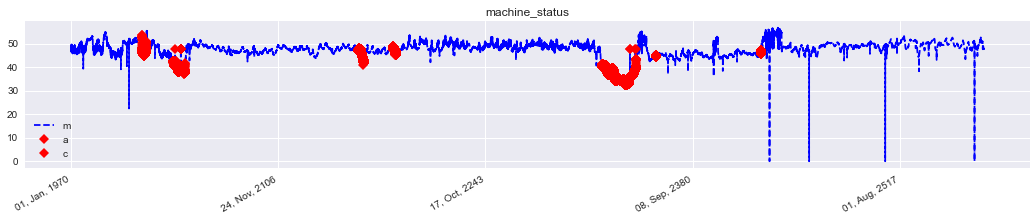

In [129]:
Broken = df2[df2['machine_status']==0]
Recovering=df2[df2['machine_status']==2]
Normal=df2[df2['machine_status']==1]



plt.style.use('seaborn')
plt.figure(figsize=(18,3))
plt.plot(df2['sensor_01'], color='blue',linestyle='--', zorder=1)
plt.plot(Broken['sensor_01'], linestyle='none', marker='D', color='red',zorder=2)
plt.plot(Recovering['sensor_01'], linestyle='none', marker='D', color='r',zorder=2)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d, %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title(sensor)
plt.legend(sensor)
plt.show()

C:\Users\Anand\AppData\Local\Temp\ipykernel_26584\3636124200.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anomaly1 =mad_df2[mad_df2['Predictions']==1][mad_df2['machine_status']==0]
C:\Users\Anand\AppData\Local\Temp\ipykernel_26584\3636124200.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anomaly2=mad_df2[mad_df2['Predictions']==1][mad_df2['machine_status']==2]


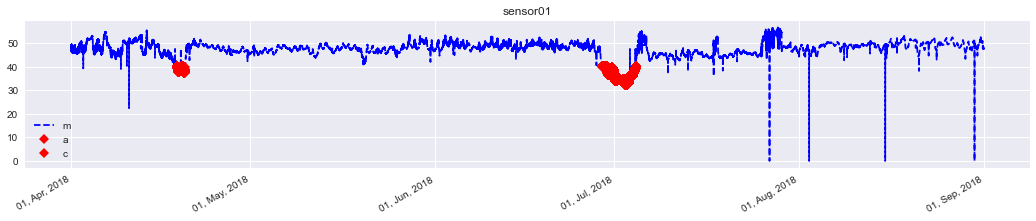

In [130]:
anomaly1 =mad_df2[mad_df2['Predictions']==1][mad_df2['machine_status']==0]
anomaly2=mad_df2[mad_df2['Predictions']==1][mad_df2['machine_status']==2]

plt.style.use('seaborn')
plt.figure(figsize=(18,3))
plt.plot(mad_df2['sensor_01'], color='blue',linestyle='--', zorder=2)
plt.plot(anomaly1['sensor_01'], linestyle='none', marker='D', color='red',zorder=2)
plt.plot(anomaly2['sensor_01'], linestyle='none', marker='D', color='red',zorder=2)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d, %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title('sensor01')
plt.legend(sensor)
plt.show()

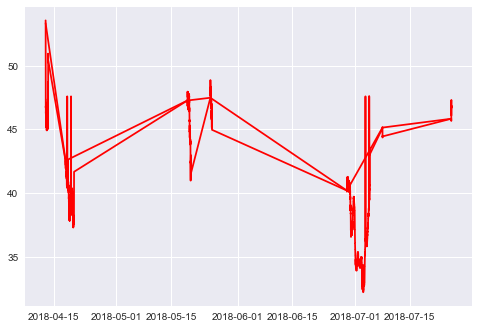

In [133]:
Broken = mad_df2[mad_df2['machine_status']==0]
Recovering=mad_df2[mad_df2['machine_status']==2]

plt.plot(anomaly1['sensor_01'], color='g',zorder=2)
plt.plot(Broken['sensor_01'] , color='r',zorder=2)
plt.plot(Recovering['sensor_01'], color='r',zorder=2)

In [134]:
print("number of anomalies1 : ", anomaly1.shape[0])
print("number of anomalies2 : ", anomaly2.shape[0])

number of anomalies1 :  1
number of anomalies2 :  9242


In [135]:
print("number of anomalies1 : ", Broken.shape[0])
print("number of anomalies2 : ", Recovering.shape[0])

number of anomalies1 :  7
number of anomalies2 :  14477


In [ ]:
print("number of anomalies1 : ", anomaly1.shape[0])
print("number of anomalies2 : ", anomaly2.shape[0])
print("number of anomalies1 : ", Broken.shape[0])
print("number of anomalies2 : ", Recovering.shape[0])

## For Sensor 2

In [157]:
df3

time  sensor_02  machine_status
0      2018-04-01 00:00:00  53.211800               1
1      2018-04-01 00:01:00  53.211800               1
2      2018-04-01 00:02:00  53.211800               1
3      2018-04-01 00:03:00  53.168400               1
4      2018-04-01 00:04:00  53.211800               1
...                    ...        ...             ...
220315 2018-08-31 23:55:00  50.520830               1
220316 2018-08-31 23:56:00  50.564240               1
220317 2018-08-31 23:57:00  50.520830               1
220318 2018-08-31 23:58:00  50.520832               1
220319 2018-08-31 23:59:00  50.520832               1

[220320 rows x 3 columns]

In [158]:
missing_data(df3)

Total  Percent
time                0      0.0
sensor_02           0      0.0
machine_status      0      0.0

In [159]:
def fit_model(model, data, column='sensor_02'):
    # fit the model and predict it
    mad_df = df3.copy()
    data_to_predict = data[column].to_numpy().reshape(-1, 1)
    predictions = model.fit_predict(data_to_predict)
    mad_df['Predictions'] = predictions
    
    return mad_df

In [160]:
mad_df3 = fit_model(mad_model,df3)

C:\Users\Anand\.conda\envs\newproject\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [161]:
mad_df3['Predictions'].unique()
mad_df3[mad_df3['Predictions']==1]['machine_status'].value_counts()

2    11792
1     2059
0        1
Name: machine_status, dtype: int64

In [162]:
y_true=mad_df3['machine_status'].values
y_pred=mad_df3['Predictions'].values


In [163]:
mae = mean_absolute_error(y_true, y_pred)
f1=f1_score(y_true, y_pred, average='micro')
print('MAE: %.3f' % mae)
print(f1)

MAE: 1.003
0.009372730573710965


In [164]:
mad_df3=mad_df3.set_index('time', drop=True)

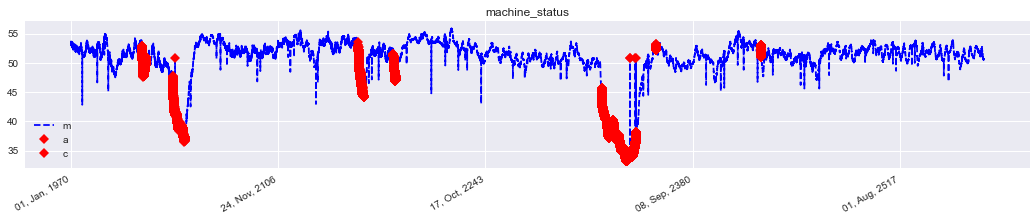

In [165]:
Broken = df3[df3['machine_status']==0]
Recovering=df3[df3['machine_status']==2]




plt.style.use('seaborn')
plt.figure(figsize=(18,3))
plt.plot(df3['sensor_02'], color='blue',linestyle='--', zorder=1)
plt.plot(Broken['sensor_02'], linestyle='none', marker='D', color='red',zorder=2)
plt.plot(Recovering['sensor_02'], linestyle='none', marker='D', color='r',zorder=2)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d, %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title(sensor)
plt.legend(sensor)
plt.show()

C:\Users\Anand\AppData\Local\Temp\ipykernel_26584\4024357956.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anomaly1 =mad_df3[mad_df3['Predictions']==1][mad_df3['machine_status']==0]
C:\Users\Anand\AppData\Local\Temp\ipykernel_26584\4024357956.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anomaly2=mad_df3[mad_df3['Predictions']==1][mad_df3['machine_status']==2]


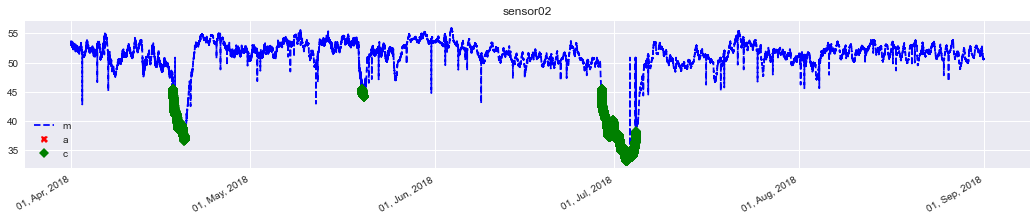

In [166]:
anomaly1 =mad_df3[mad_df3['Predictions']==1][mad_df3['machine_status']==0]
anomaly2=mad_df3[mad_df3['Predictions']==1][mad_df3['machine_status']==2]

plt.style.use('seaborn')
plt.figure(figsize=(18,3))
plt.plot(mad_df3['sensor_02'], color='blue',linestyle='--', zorder=2)
plt.plot(anomaly1['sensor_02'], linestyle='none', marker='X', color='red',zorder=2)
plt.plot(anomaly2['sensor_02'], linestyle='none', marker='D', color='g',zorder=2)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d, %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title('sensor02')
plt.legend(sensor)
plt.show()

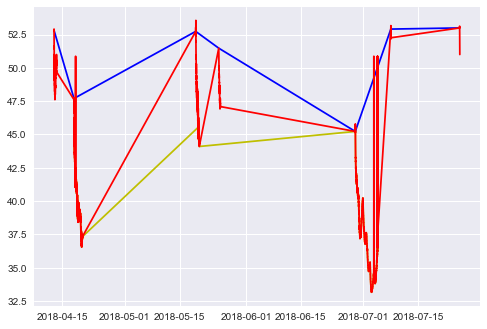

In [167]:
Broken = mad_df3[mad_df3['machine_status']==0]
Recovering=mad_df3[mad_df3['machine_status']==2]

plt.plot(anomaly1['sensor_02'], color='g',zorder=2)
plt.plot(anomaly2['sensor_02'], color='y',zorder=2)
plt.plot(Broken['sensor_02'] , color='b',zorder=2)
plt.plot(Recovering['sensor_02'], color='r',zorder=2)

In [168]:
print("number of anomalies1 : ", anomaly1.shape[0])
print("number of anomalies2 : ", anomaly2.shape[0])
print("number of anomalies1 : ", Broken.shape[0])
print("number of anomalies2 : ", Recovering.shape[0])

number of anomalies1 :  1
number of anomalies2 :  11792
number of anomalies1 :  7
number of anomalies2 :  14477


## sensor 3

In [169]:
df4

time  sensor_03  machine_status
0      2018-04-01 00:00:00  46.310760               1
1      2018-04-01 00:01:00  46.310760               1
2      2018-04-01 00:02:00  46.397570               1
3      2018-04-01 00:03:00  46.397568               1
4      2018-04-01 00:04:00  46.397568               1
...                    ...        ...             ...
220315 2018-08-31 23:55:00  43.142361               1
220316 2018-08-31 23:56:00  43.142361               1
220317 2018-08-31 23:57:00  43.142361               1
220318 2018-08-31 23:58:00  43.142361               1
220319 2018-08-31 23:59:00  43.142361               1

[220320 rows x 3 columns]

In [170]:
def fit_model(model, data, column='sensor_03'):
    # fit the model and predict it
    mad_df = df4.copy()
    data_to_predict = data[column].to_numpy().reshape(-1, 1)
    predictions = model.fit_predict(data_to_predict)
    mad_df['Predictions'] = predictions
    
    return mad_df

In [171]:
mad_df4 = fit_model(mad_model,df4)

C:\Users\Anand\.conda\envs\newproject\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function fit_predict is deprecated
  warnings.warn(msg, category=FutureWarning)


In [172]:
mad_df4['Predictions'].unique()
mad_df4[mad_df4['Predictions']==1]['machine_status'].value_counts()

2    7386
1     514
Name: machine_status, dtype: int64

In [173]:
mad_df4[mad_df4['Predictions']==1][mad_df4['machine_status']==2].value_counts()

C:\Users\Anand\AppData\Local\Temp\ipykernel_26584\1268774462.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  mad_df4[mad_df4['Predictions']==1][mad_df4['machine_status']==2].value_counts()


time                 sensor_03  machine_status  Predictions
2018-04-18 08:03:00  38.064240  2               1              1
2018-07-02 01:03:00  34.157986  2               1              1
2018-07-02 01:01:00  34.157986  2               1              1
2018-07-02 01:00:00  34.157986  2               1              1
2018-07-02 00:59:00  34.157990  2               1              1
                                                              ..
2018-06-30 02:19:00  35.026039  2               1              1
2018-06-30 02:18:00  35.026039  2               1              1
2018-06-30 02:17:00  35.026039  2               1              1
2018-06-30 02:16:00  35.026039  2               1              1
2018-07-04 04:33:00  38.064240  2               1              1
Length: 7386, dtype: int64

In [174]:
y_true=mad_df4['machine_status'].values
y_pred=mad_df4['Predictions'].values


In [175]:
mae = mean_absolute_error(y_true, y_pred)
f1=f1_score(y_true, y_pred, average='micro')
print('MAE: %.3f' % mae)
print(f1)

MAE: 1.030
0.0023647421931735657


In [176]:
mad_df4=mad_df4.set_index('time', drop=True)

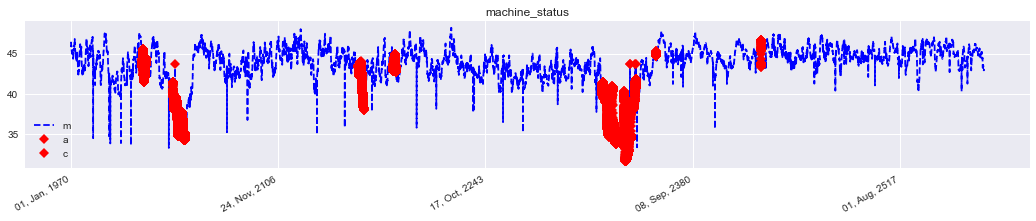

In [177]:
Broken = df4[df4['machine_status']==0]
Recovering=df4[df4['machine_status']==2]




plt.style.use('seaborn')
plt.figure(figsize=(18,3))
plt.plot(df4['sensor_03'], color='blue',linestyle='--', zorder=1)
plt.plot(Broken['sensor_03'], linestyle='none', marker='D', color='red',zorder=2)
plt.plot(Recovering['sensor_03'], linestyle='none', marker='D', color='r',zorder=2)

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d, %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title(sensor)
plt.legend(sensor)
plt.show()

C:\Users\Anand\AppData\Local\Temp\ipykernel_26584\237022804.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anomaly1 =mad_df4[mad_df4['Predictions']==1][mad_df4['machine_status']==0]
C:\Users\Anand\AppData\Local\Temp\ipykernel_26584\237022804.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  anomaly2=mad_df4[mad_df4['Predictions']==1][mad_df4['machine_status']==2]


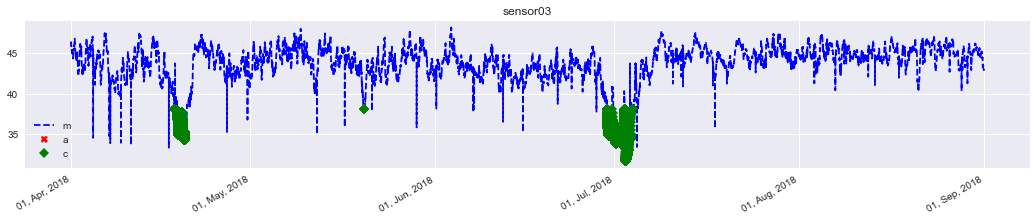

In [178]:
anomaly1 =mad_df4[mad_df4['Predictions']==1][mad_df4['machine_status']==0]
anomaly2=mad_df4[mad_df4['Predictions']==1][mad_df4['machine_status']==2]

plt.style.use('seaborn')
plt.figure(figsize=(18,3))
plt.plot(mad_df4['sensor_03'], color='blue',linestyle='--', zorder=2)
plt.plot(anomaly1['sensor_03'], linestyle='none', marker='X', color='red',zorder=2)
plt.plot(anomaly2['sensor_03'], linestyle='none', marker='D', color='g',zorder=2)
plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d, %b, %Y')
plt.gca().xaxis.set_major_formatter(date_format)
plt.title('sensor03')
plt.legend(sensor)
plt.show()

In [179]:
print("number of anomalies1 : ", anomaly1.shape[0])
print("number of anomalies2 : ", anomaly2.shape[0])
print("number of anomalies1 : ", Broken.shape[0])
print("number of anomalies2 : ", Recovering.shape[0])

number of anomalies1 :  0
number of anomalies2 :  7386
number of anomalies1 :  7
number of anomalies2 :  14477


In [180]:
def plot_data_anomalies(original_dataframe: pd.DataFrame, anomaly_array: list, ) -> None:
    plt.plot_date(original_dataframe.index, original_dataframe[value_col], linestyle='--', zorder=1)
    plt.scatter(original_dataframe.index, anomaly_array * original_dataframe[value_col],
                color='r', marker='D', zorder=2)


def get_anomaly_array_using_cutoff_point(input_dataframe: pd.DataFrame, cutoff_point: float) -> np.ndarray:
    anomaly_array = np.array(input_dataframe[value_col] > cutoff_point)
    anomaly_array = np.where(anomaly_array == 0, np.nan, anomaly_array)
    return anomaly_array


def get_anomaly_array_from_anomaly_index_list(input_dataframe: pd.DataFrame, anomaly_index_list: list) -> np.ndarray:
    anomaly_array = np.ones((len(input_dataframe, )))
    anomaly_array = np.where(input_dataframe.index.isin(anomaly_index_list), anomaly_array, np.nan)
    return anomaly_array


def detect_anomalies_using_mean_std_method(
        input_dataframe: pd.DataFrame, threshold: float = 3, plot_cutoff: bool = False) -> np.ndarray:
    input_dataframe[value_col] = input_dataframe[value_col].abs()
    mean = input_dataframe[value_col].mean()
    std = input_dataframe[value_col].std()
    cutoff_value = mean + threshold * std
    print(f"Mean value = {mean:.2f}, Standard deviation value = {std:.2f}, Cutoff value = {cutoff_value:.2f}")

    if plot_cutoff:
        plot_the_impact_of_cutoff_value(input_dataframe, cutoff_value)

    anomaly_array = get_anomaly_array_using_cutoff_point(input_dataframe, cutoff_value)
    return anomaly_array


def plot_the_impact_of_cutoff_value(input_dataframe: pd.DataFrame, cutoff_value: float) -> None:
    plt.plot(input_dataframe[value_col])
    plt.fill_between(
        input_dataframe.index, y1=0, y2=cutoff_value, alpha=0.2, color='green', linestyle='--', linewidth=2)

In [181]:
data2 = df.copy()

In [182]:
data2 = data2[['time', 'sensor_00','sensor_01', 'sensor_02', 'sensor_03', 'machine_status']].copy()

In [183]:

data2.head()

time  sensor_00  sensor_01  sensor_02  sensor_03  \
0 2018-04-01 00:00:00   2.465394   47.09201    53.2118  46.310760   
1 2018-04-01 00:01:00   2.465394   47.09201    53.2118  46.310760   
2 2018-04-01 00:02:00   2.444734   47.35243    53.2118  46.397570   
3 2018-04-01 00:03:00   2.460474   47.09201    53.1684  46.397568   
4 2018-04-01 00:04:00   2.445718   47.13541    53.2118  46.397568   

   machine_status  
0               1  
1               1  
2               1  
3               1  
4               1

# NAIVE APPROACH

## sensor 00

In [184]:
df1 = data2[['time','sensor_00']]

In [185]:
time_col= 'time'
value_col ='sensor_00'
date_col = 'timestamp'
col_dict = {date_col: time_col}

In [186]:
df1 = df1.rename(columns=col_dict)
df1.set_index(time_col,inplace=True)

In [187]:
df1.head()

sensor_00
time                          
2018-04-01 00:00:00   2.465394
2018-04-01 00:01:00   2.465394
2018-04-01 00:02:00   2.444734
2018-04-01 00:03:00   2.460474
2018-04-01 00:04:00   2.445718

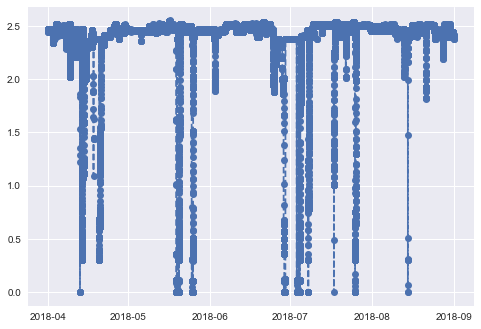

In [188]:
plt.plot_date(df1.index, df1[value_col], linestyle='--')

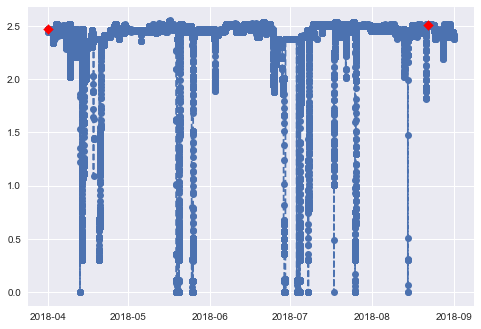

In [189]:
anomaly_index_list = ['2018-04-01', '2018-08-22']

anomaly_array = get_anomaly_array_from_anomaly_index_list(df1, anomaly_index_list)
plot_data_anomalies(df1, anomaly_array)

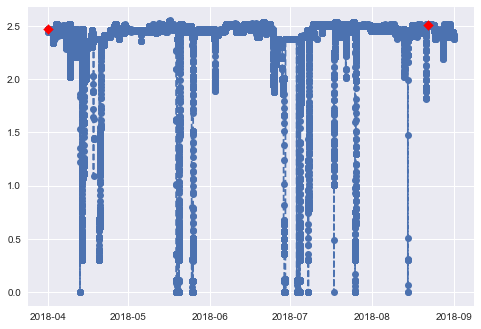

In [190]:
def plot_correct_anomalies():
    anomaly_array = get_anomaly_array_from_anomaly_index_list(df1, anomaly_index_list)
    plot_data_anomalies(df1, anomaly_array)

plot_correct_anomalies()

<AxesSubplot:title={'center':'Original time series with anomaly'}, xlabel='time'>

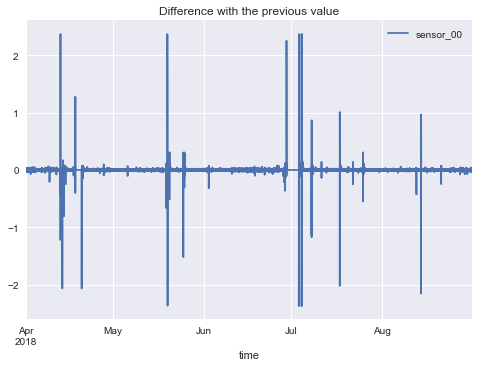

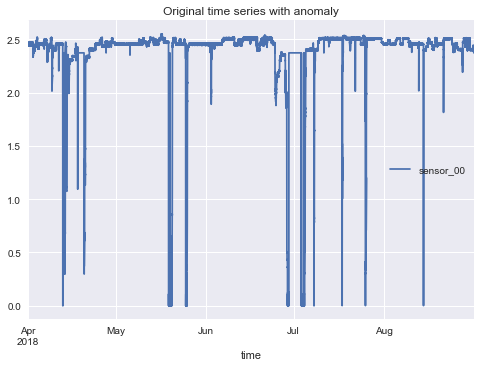

In [191]:
# Compute the difference with the previous value

df_shift = df1 - df1.shift(1)
df_shift.plot(title="Difference with the previous value")
df1.plot(title="Original time series with anomaly")

<AxesSubplot:title={'center':'Absolute value of the differentiated time series'}, xlabel='time'>

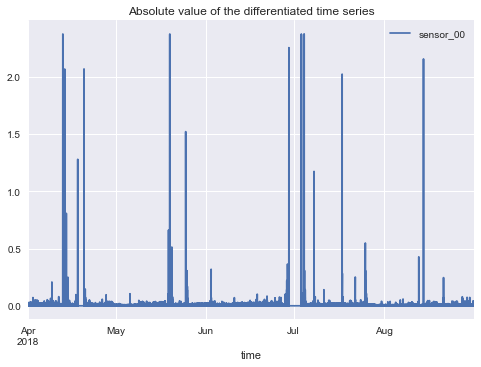

In [192]:
df_shift = np.abs(df_shift)
df_shift.plot(title="Absolute value of the differentiated time series")

In [193]:
# Computing the mean and standard deviation of the data

mean = df_shift[value_col].mean()
std = df_shift[value_col].std()
f"mean = {mean:.2f}, standard deviation = {std:.2f}"

'mean = 0.01, standard deviation = 0.02'

In [194]:
# Computing a cutoff point 

threshold = 3
cutoff = mean + threshold * std
f"Cutoff value = {cutoff:.2f}"

'Cutoff value = 0.08'

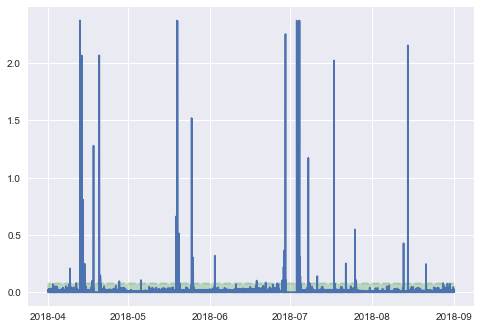

In [195]:
plt.plot(df_shift)
plt.fill_between(df_shift.index, y1=0, y2=cutoff,
                 alpha=0.2, color='green', linestyle='--', linewidth=2)

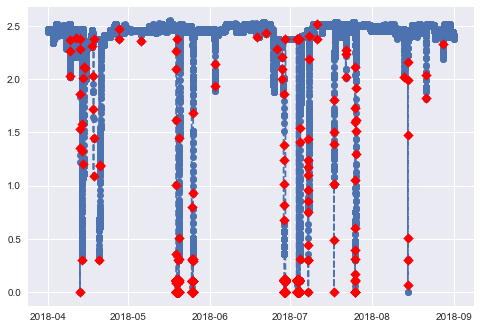

In [196]:
anomaly_array = get_anomaly_array_using_cutoff_point(df_shift, cutoff)
plot_data_anomalies(df1, anomaly_array)

Mean value = 0.01, Standard deviation value = 0.02, Cutoff value = 0.08


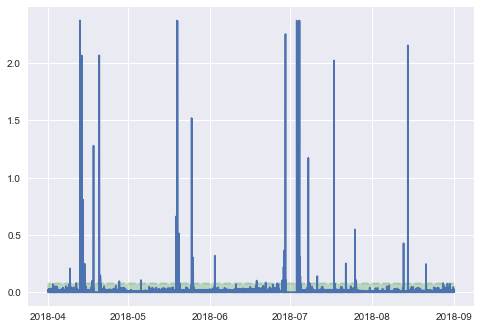

In [197]:
anomaly_array = detect_anomalies_using_mean_std_method(df_shift, plot_cutoff=True)

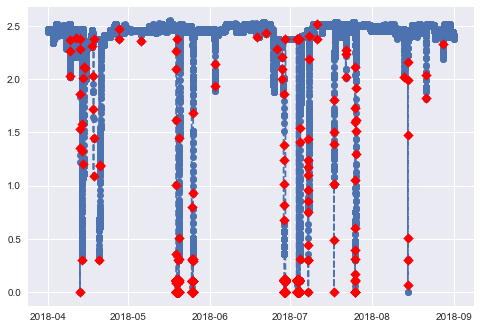

In [198]:
plot_data_anomalies(df1, anomaly_array)

In [199]:
df_shift

sensor_00
time                          
2018-04-01 00:00:00        NaN
2018-04-01 00:01:00   0.000000
2018-04-01 00:02:00   0.020660
2018-04-01 00:03:00   0.015740
2018-04-01 00:04:00   0.014756
...                        ...
2018-08-31 23:55:00   0.010822
2018-08-31 23:56:00   0.006887
2018-08-31 23:57:00   0.003935
2018-08-31 23:58:00   0.009838
2018-08-31 23:59:00   0.009838

[220320 rows x 1 columns]

In [200]:
df_shift['is_anomaly'] = ~(df_shift["sensor_00"] > cutoff)

In [201]:
df_shift['is_anomaly'].value_counts()

True     219820
False       500
Name: is_anomaly, dtype: int64

In [202]:
df_shift['is_anomaly'].replace({True : 1, False: 0}, inplace=True)

In [203]:
df1 = data2[['sensor_00', 'machine_status']]

In [204]:
y_true = df1['machine_status'].values
y_pred = df_shift['is_anomaly'].values


In [205]:
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 0.068


In [206]:
from sklearn.metrics import accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_true, y_pred))
print ('F1 score:', f1_score(y_true, y_pred, average='weighted'))


Accuracy: 0.9338870733478577
F1 score: 0.9031977205064313


## Sensor 1

In [207]:
df2 = data2[['time','sensor_01']]

In [208]:
time_col= 'time'
value_col ='sensor_01'
date_col = 'timestamp'
col_dict = {date_col: time_col}

In [209]:
df2 = df2.rename(columns=col_dict)
df2 = df2.set_index(time_col, drop=True)

In [210]:
df2.head()

sensor_01
time                          
2018-04-01 00:00:00   47.09201
2018-04-01 00:01:00   47.09201
2018-04-01 00:02:00   47.35243
2018-04-01 00:03:00   47.09201
2018-04-01 00:04:00   47.13541

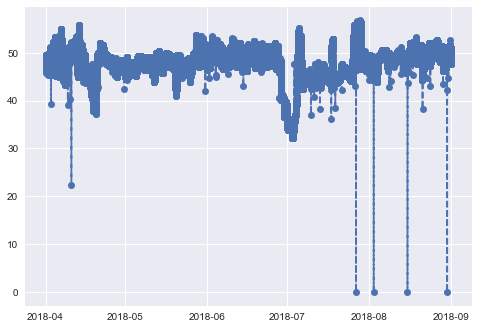

In [211]:
plt.plot_date(df2.index, df2[value_col], linestyle='--')

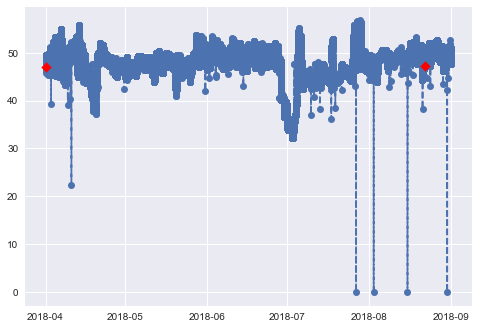

In [212]:
anomaly_index_list = ['2018-04-01', '2018-08-22']

anomaly_array = get_anomaly_array_from_anomaly_index_list(df2, anomaly_index_list)
plot_data_anomalies(df2, anomaly_array)

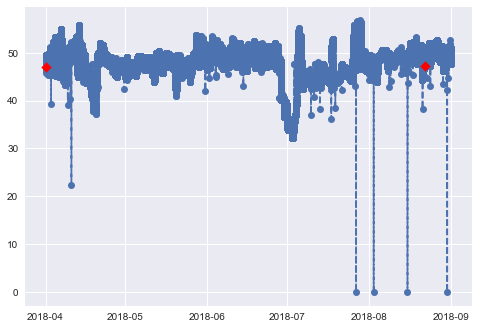

In [213]:
def plot_correct_anomalies():
    anomaly_array = get_anomaly_array_from_anomaly_index_list(df2, anomaly_index_list)
    plot_data_anomalies(df2, anomaly_array)

plot_correct_anomalies()

<AxesSubplot:title={'center':'Original time series with anomaly'}, xlabel='time'>

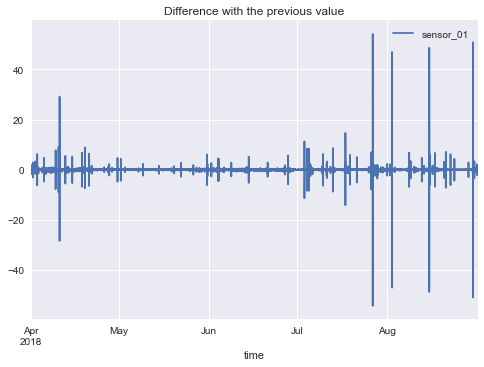

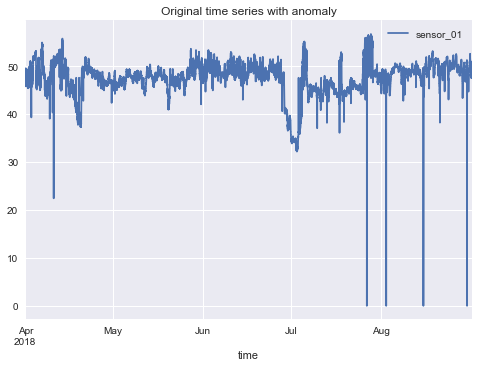

In [214]:
# Computing the difference with the previous value

df_shift = df2 - df2.shift(1)
df_shift.plot(title="Difference with the previous value")
df2.plot(title="Original time series with anomaly")

<AxesSubplot:title={'center':'Absolute value of the differentiated time series'}, xlabel='time'>

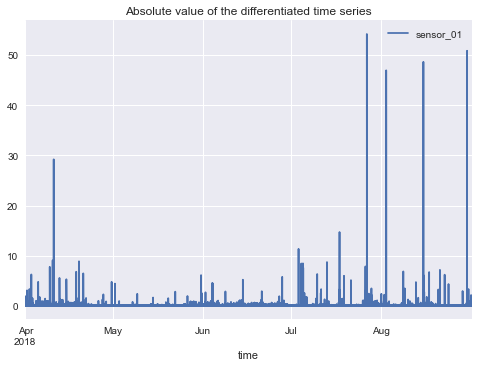

In [215]:
df_shift = np.abs(df_shift)
df_shift.plot(title="Absolute value of the differentiated time series")

In [216]:
# Computing the mean and standard deviation of the data

mean = df_shift[value_col].mean()
std = df_shift[value_col].std()
f"mean = {mean:.2f}, standard deviation = {std:.2f}"

'mean = 0.05, standard deviation = 0.36'

In [217]:
# Computing a cutoff point 

threshold = 3
cutoff = mean + threshold * std
f"Cutoff value = {cutoff:.2f}"

'Cutoff value = 1.13'

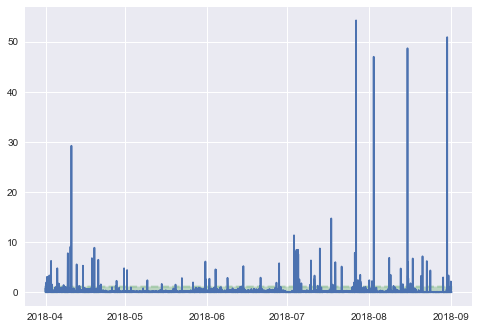

In [218]:
plt.plot(df_shift)
plt.fill_between(df_shift.index, y1=0, y2=cutoff,
                 alpha=0.2, color='green', linestyle='--', linewidth=2)

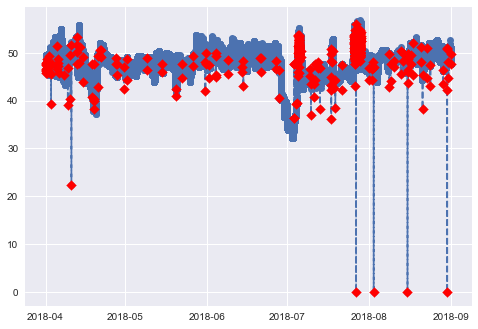

In [219]:
anomaly_array = get_anomaly_array_using_cutoff_point(df_shift, cutoff)
plot_data_anomalies(df2, anomaly_array)

Mean value = 0.05, Standard deviation value = 0.36, Cutoff value = 1.13


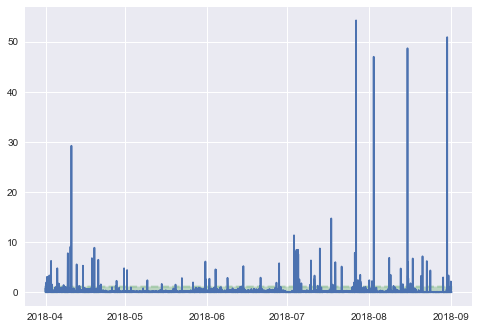

In [220]:
anomaly_array = detect_anomalies_using_mean_std_method(df_shift, plot_cutoff=True)

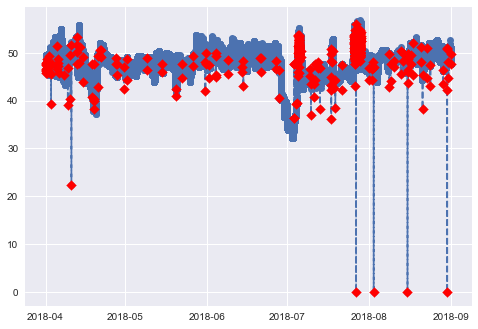

In [221]:
plot_data_anomalies(df2, anomaly_array)

In [222]:
df_shift

sensor_01
time                             
2018-04-01 00:00:00           NaN
2018-04-01 00:01:00  0.000000e+00
2018-04-01 00:02:00  2.604200e-01
2018-04-01 00:03:00  2.604200e-01
2018-04-01 00:04:00  4.340000e-02
...                           ...
2018-08-31 23:55:00  8.680000e-02
2018-08-31 23:56:00  1.892090e-07
2018-08-31 23:57:00  0.000000e+00
2018-08-31 23:58:00  0.000000e+00
2018-08-31 23:59:00  0.000000e+00

[220320 rows x 1 columns]

In [223]:
df_shift['is_anomaly'] = ~(df_shift["sensor_01"] > cutoff)

df_shift['is_anomaly'].replace({True : 1, False: 0}, inplace=True)


In [224]:
df2 = data2[['sensor_01', 'machine_status']]

In [225]:
df2

sensor_01  machine_status
0        47.09201               1
1        47.09201               1
2        47.35243               1
3        47.09201               1
4        47.13541               1
...           ...             ...
220315   47.69965               1
220316   47.69965               1
220317   47.69965               1
220318   47.69965               1
220319   47.69965               1

[220320 rows x 2 columns]

In [226]:
y_true = df2['machine_status'].values
y_pred = df_shift['is_anomaly'].values

In [227]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)


MAE: 0.068


In [228]:
from sklearn.metrics import accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_true, y_pred))
print ('F1 score:', f1_score(y_true, y_pred, average='weighted'))


Accuracy: 0.9320806100217864
F1 score: 0.9014570155991535


## Sensor 2

In [229]:
df3 = data2[['time','sensor_02']]

In [230]:
time_col= 'time'
value_col ='sensor_02'
date_col = 'timestamp'
col_dict = {date_col: time_col}

In [231]:
df3 = df3.rename(columns=col_dict)
df3 = df3.set_index(time_col, drop=True)

In [232]:
df3.head()

sensor_02
time                          
2018-04-01 00:00:00    53.2118
2018-04-01 00:01:00    53.2118
2018-04-01 00:02:00    53.2118
2018-04-01 00:03:00    53.1684
2018-04-01 00:04:00    53.2118

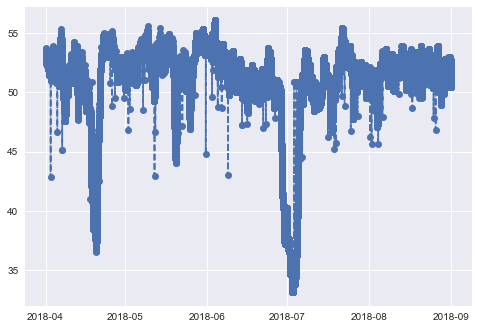

In [233]:
plt.plot_date(df3.index, df3[value_col], linestyle='--')

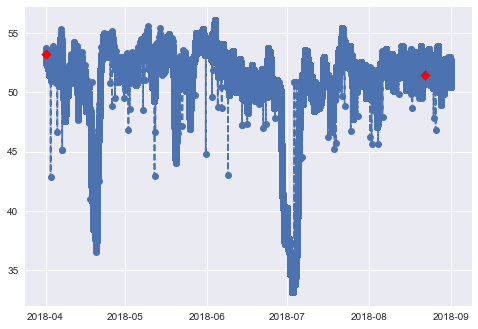

In [234]:
anomaly_index_list = ['2018-04-01', '2018-08-22']

anomaly_array = get_anomaly_array_from_anomaly_index_list(df3, anomaly_index_list)
plot_data_anomalies(df3, anomaly_array)

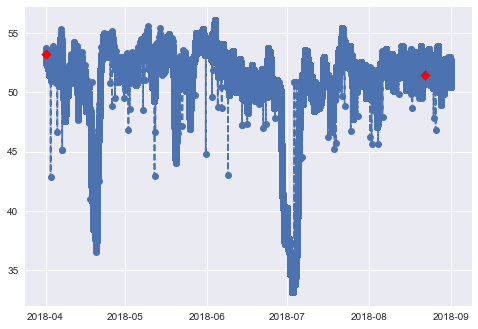

In [235]:
def plot_correct_anomalies():
    anomaly_array = get_anomaly_array_from_anomaly_index_list(df3, anomaly_index_list)
    plot_data_anomalies(df3, anomaly_array)

plot_correct_anomalies()

<AxesSubplot:title={'center':'Original time series with anomaly'}, xlabel='time'>

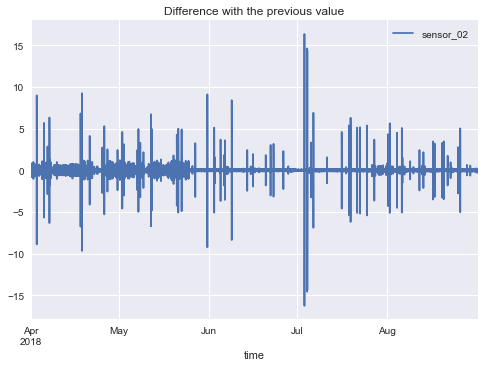

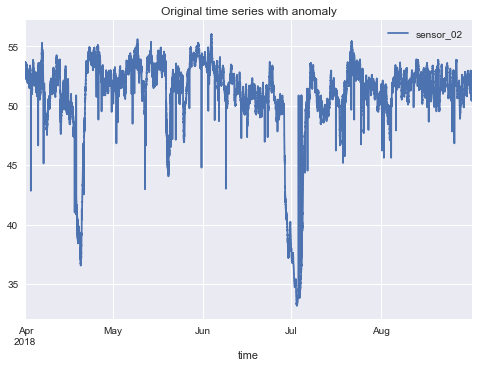

In [236]:
# Computing the difference with the previous value

df_shift = df3 - df3.shift(1)
df_shift.plot(title="Difference with the previous value")
df3.plot(title="Original time series with anomaly")

<AxesSubplot:title={'center':'Absolute value of the differentiated time series'}, xlabel='time'>

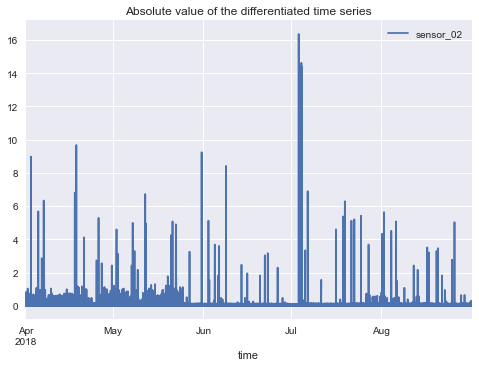

In [237]:
df_shift = np.abs(df_shift)
df_shift.plot(title="Absolute value of the differentiated time series")

In [238]:
# Computing the mean and standard deviation of the data

mean = df_shift[value_col].mean()
std = df_shift[value_col].std()
f"mean = {mean:.2f}, standard deviation = {std:.2f}"

'mean = 0.04, standard deviation = 0.15'

In [239]:
# Computing a cutoff point 

threshold = 3
cutoff = mean + threshold * std
f"Cutoff value = {cutoff:.2f}"

'Cutoff value = 0.49'

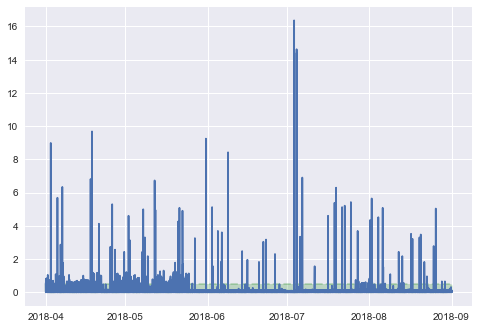

In [240]:
plt.plot(df_shift)
plt.fill_between(df_shift.index, y1=0, y2=cutoff,
                 alpha=0.2, color='green', linestyle='--', linewidth=2)

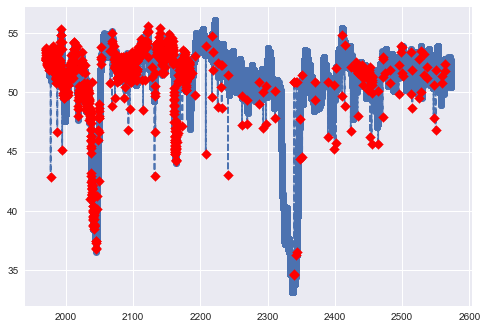

In [241]:
anomaly_array = get_anomaly_array_using_cutoff_point(df_shift, cutoff)
plot_data_anomalies(df, anomaly_array)

Mean value = 0.04, Standard deviation value = 0.15, Cutoff value = 0.49


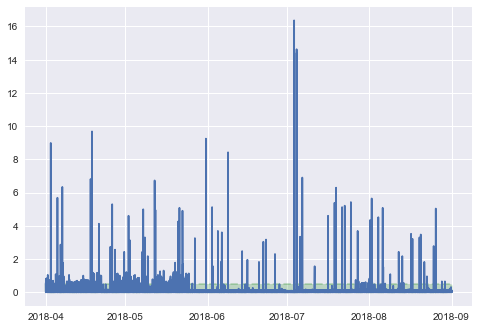

In [242]:
anomaly_array = detect_anomalies_using_mean_std_method(df_shift, plot_cutoff=True)

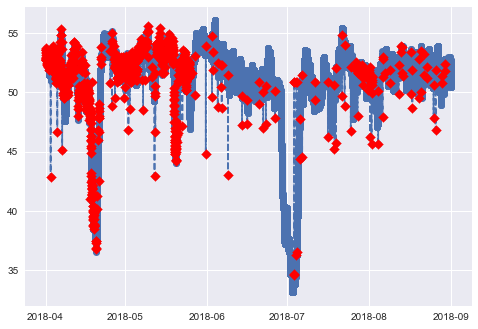

In [243]:
plot_data_anomalies(df3, anomaly_array)

In [244]:
df_shift['is_anomaly'] = ~(df_shift["sensor_02"] > cutoff)

df_shift['is_anomaly'].replace({True : 1, False: 0}, inplace=True)

In [245]:
df3 = data2[['sensor_03', 'machine_status']]

In [246]:
y_true = df3['machine_status'].values
y_pred = df_shift['is_anomaly'].values


In [247]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)


MAE: 0.070


In [248]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_true, y_pred))
print ('F1 score:', f1_score(y_true, y_pred, average='weighted'))


Accuracy: 0.930578249818446
F1 score: 0.9009035285661927


## Sensor 3

In [249]:
df4 = data2[['time','sensor_03']]

In [250]:
time_col= 'time'
value_col ='sensor_03'
date_col = 'timestamp'
col_dict = {date_col: time_col}

In [251]:
df4 = df4.rename(columns=col_dict)
df4 = df4.set_index(time_col, drop=True)

In [252]:
df4.head()

sensor_03
time                          
2018-04-01 00:00:00  46.310760
2018-04-01 00:01:00  46.310760
2018-04-01 00:02:00  46.397570
2018-04-01 00:03:00  46.397568
2018-04-01 00:04:00  46.397568

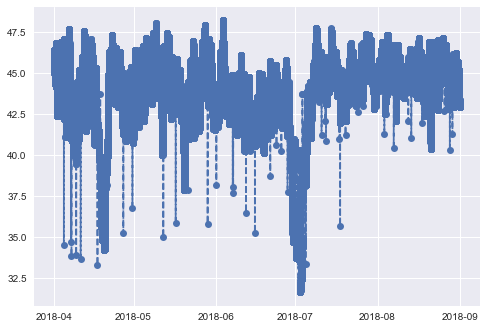

In [253]:
plt.plot_date(df4.index, df4[value_col], linestyle='--')

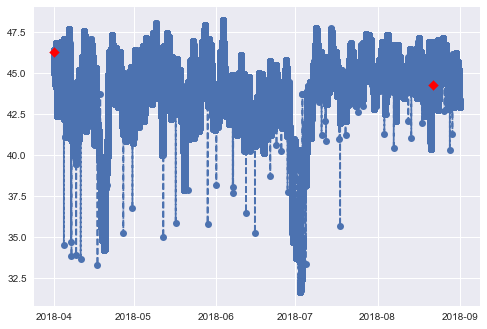

In [254]:
anomaly_index_list = ['2018-04-01', '2018-08-22']

anomaly_array = get_anomaly_array_from_anomaly_index_list(df4, anomaly_index_list)
plot_data_anomalies(df4, anomaly_array)

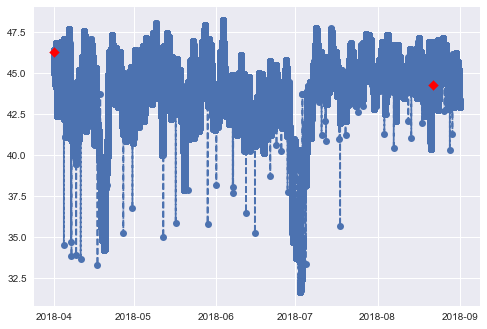

In [255]:
anomaly_array = get_anomaly_array_from_anomaly_index_list(df4, anomaly_index_list)
plot_data_anomalies(df4, anomaly_array)

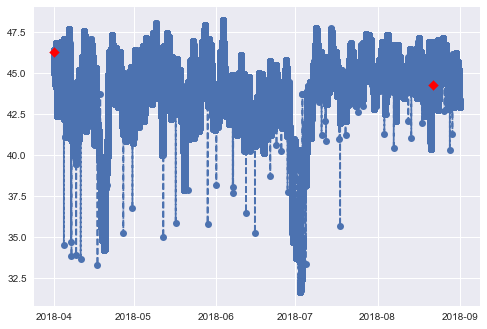

In [256]:
def plot_correct_anomalies():
    anomaly_array = get_anomaly_array_from_anomaly_index_list(df4, anomaly_index_list)
    plot_data_anomalies(df4, anomaly_array)

plot_correct_anomalies()

<AxesSubplot:title={'center':'Original time series with anomaly'}, xlabel='time'>

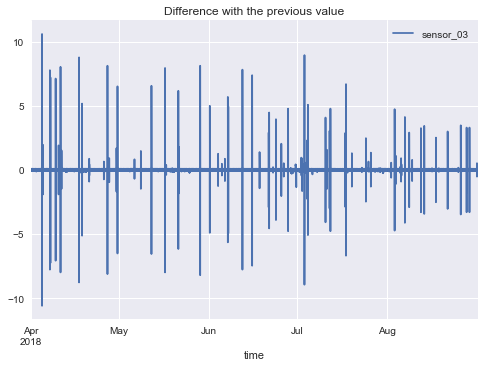

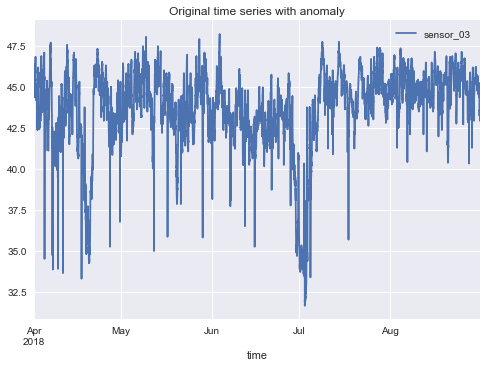

In [257]:
# Computing the difference with the previous value

df_shift = df4 - df4.shift(1)
df_shift.plot(title="Difference with the previous value")
df4.plot(title="Original time series with anomaly")

<AxesSubplot:title={'center':'Absolute value of the differentiated time series'}, xlabel='time'>

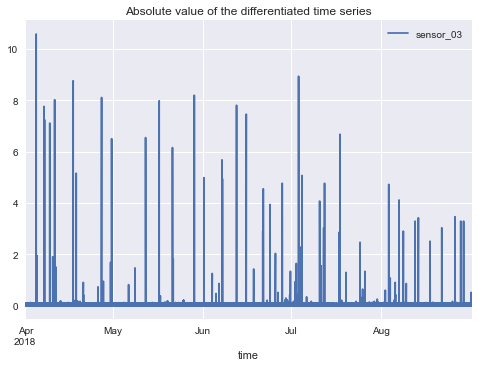

In [258]:
df_shift = np.abs(df_shift)
df_shift.plot(title="Absolute value of the differentiated time series")

In [259]:
# Computing the mean and standard deviation of the data

mean = df_shift[value_col].mean()
std = df_shift[value_col].std()
f"mean = {mean:.2f}, standard deviation = {std:.2f}"

'mean = 0.01, standard deviation = 0.12'

In [260]:
# Computing a cutoff point 

threshold = 3
cutoff = mean + threshold * std
f"Cutoff value = {cutoff:.2f}"

'Cutoff value = 0.37'

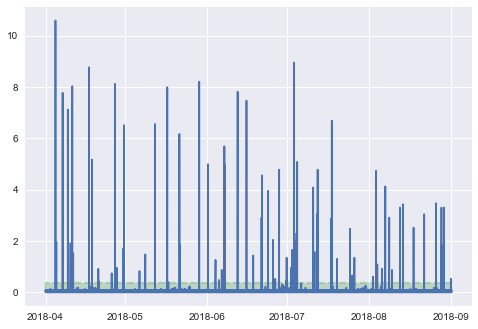

In [261]:
plt.plot(df_shift)
plt.fill_between(df_shift.index, y1=0, y2=cutoff,
                 alpha=0.2, color='green', linestyle='--', linewidth=2)

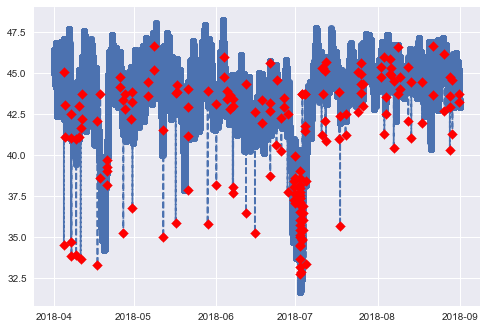

In [262]:
anomaly_array = get_anomaly_array_using_cutoff_point(df_shift, cutoff)
plot_data_anomalies(df4, anomaly_array)

Mean value = 0.01, Standard deviation value = 0.12, Cutoff value = 0.37


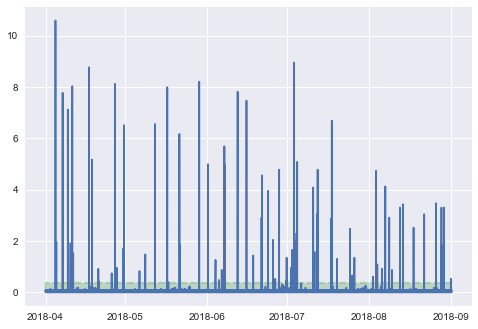

In [263]:
anomaly_array = detect_anomalies_using_mean_std_method(df_shift, plot_cutoff=True)

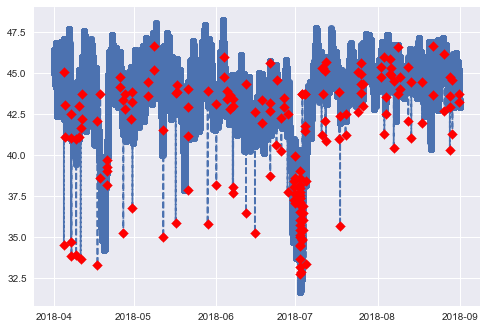

In [264]:
plot_data_anomalies(df4, anomaly_array)

In [265]:
df_shift['is_anomaly'] = ~(df_shift["sensor_03"] > cutoff)

df_shift['is_anomaly'].replace({True : 1, False: 0}, inplace=True)

In [266]:
df4 = data2[['sensor_03', 'machine_status']]

In [267]:
y_true = df4['machine_status'].values
y_pred = df_shift['is_anomaly'].values

In [268]:
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 0.067


In [269]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_true, y_pred))
print ('F1 score:', f1_score(y_true, y_pred, average='weighted'))


Accuracy: 0.9336601307189543
F1 score: 0.9023063060525176


In [270]:
from sklearn.metrics import plot_confusion_matrix


In [271]:
cm=confusion_matrix(y_true, y_pred)

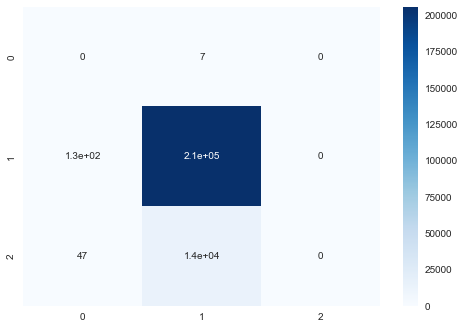

In [272]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')